In [ ]:
import pandas as pd
import numpy as np

In [28]:
# Read the training data
train_df = pd.read_csv('train.csv')

# Separate the data into training (with scores) and prediction (without scores)
train = train_df[train_df['Score'].notna()].copy()
test = train_df[train_df['Score'].isna()].copy()

In [29]:
# Basic info about our split
print("\nTraining Data Shape (with scores):", train.shape)
print("Prediction Data Shape (without scores):", test.shape)

# Display first rows of the files
print("\nFirst Row of Training Data (with scores):")
print(train.head(1))

print("\nFirst Row of Prediction Data (without scores):")
print(test.head(1))


Training Data Shape (with scores): (1485341, 9)
Prediction Data Shape (without scores): (212192, 9)

First Row of Training Data (with scores):
       Id   ProductId         UserId  HelpfulnessNumerator  \
0  914403  B0009W5KHM  AV6QDP8Q0ONK4                     2   

   HelpfulnessDenominator        Time        Summary  \
0                       2  1341014400  GOOD FUN FILM   

                                                Text  Score  
0  While most straight to DVD films are not worth...    5.0  

First Row of Prediction Data (without scores):
              Id   ProductId          UserId  HelpfulnessNumerator  \
1485341  1323432  B0034G4P30  A120UTHQDQIJGH                     0   

         HelpfulnessDenominator        Time            Summary  \
1485341                       0  1391040000  Okay for a rental   

                                                      Text  Score  
1485341  This movie was just alright for me. I think pe...    NaN  


## Distribution of Reviews

<ipython-input-30-96e464ef5ac9>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


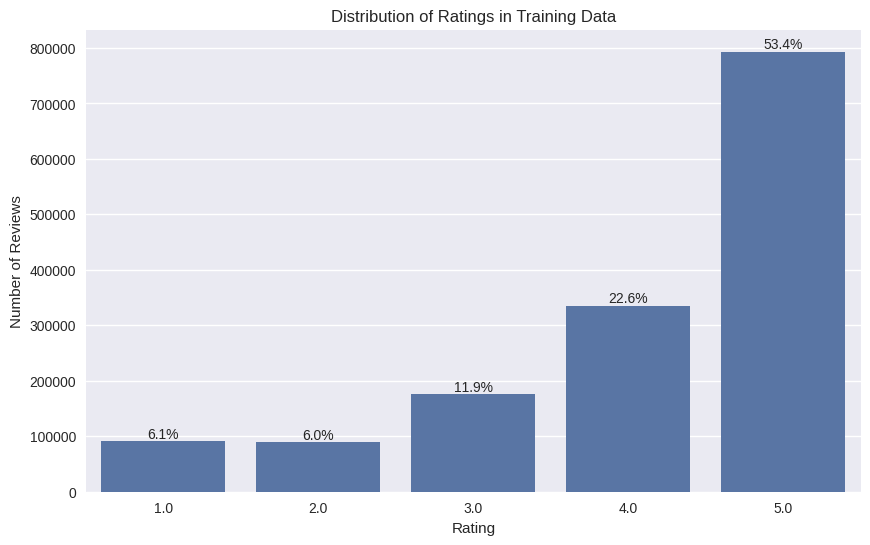


Detailed Rating Distribution:

Count of ratings:
Score
1.0     91190
2.0     89678
3.0    176082
4.0    335228
5.0    793163
Name: count, dtype: int64

Percentage of ratings:
Score
1.0     6.14
2.0     6.04
3.0    11.85
4.0    22.57
5.0    53.40
Name: count, dtype: float64

Rating Statistics:
Mean Rating: 4.11
Median Rating: 5.0
Standard Deviation: 1.20


In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for better visualizations
plt.style.use('seaborn')
plt.figure(figsize=(10, 6))

# Create bar plot for rating distribution
sns.countplot(data=train, x='Score')
plt.title('Distribution of Ratings in Training Data')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')

# Add percentage labels on top of each bar
total = len(train)
for p in plt.gca().patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    plt.annotate(percentage,
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center',
                va='bottom')

plt.show()

# Print detailed statistics
rating_stats = train['Score'].value_counts().sort_index()
rating_percentages = (rating_stats / total * 100).round(2)

print("\nDetailed Rating Distribution:")
print("\nCount of ratings:")
print(rating_stats)
print("\nPercentage of ratings:")
print(rating_percentages)

# Calculate basic statistics
print("\nRating Statistics:")
print(f"Mean Rating: {train['Score'].mean():.2f}")
print(f"Median Rating: {train['Score'].median()}")
print(f"Standard Deviation: {train['Score'].std():.2f}")

## Average Movie Raitings

Total number of reviews: 1485341
Number of unique movies: 50052

Reviews per movie statistics:
count    50052.000000
mean        29.675957
std         64.368997
min          1.000000
25%          6.000000
50%         11.000000
75%         25.000000
max       1945.000000
Name: count, dtype: float64


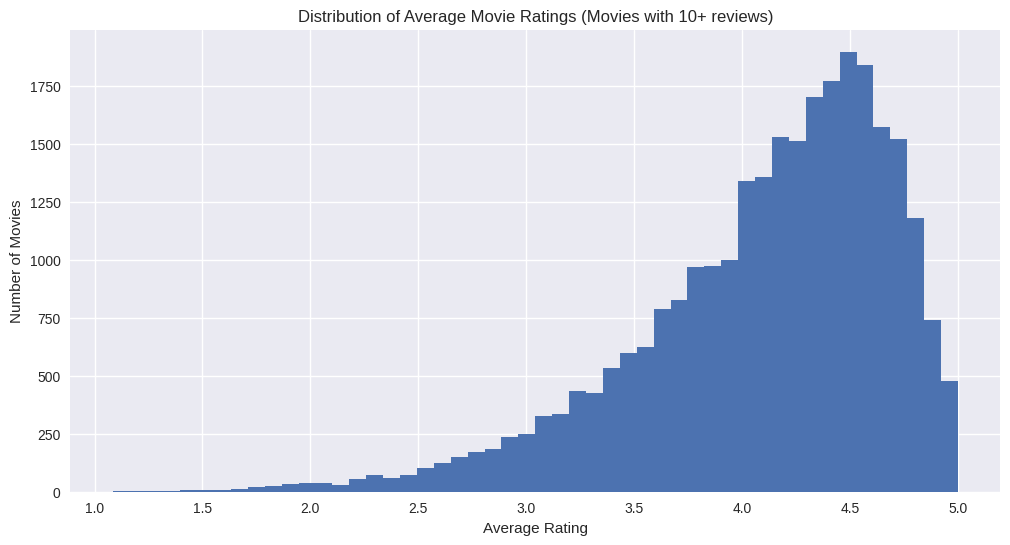


Top 10 Highest Rated Movies (with 10+ reviews):
       ProductId  review_count  avg_rating  rating_std
83    0767016351            11         5.0         0.0
1933  0800104803            14         5.0         0.0
2083  0985265108            26         5.0         0.0
2272  156501345X            14         5.0         0.0
2724  1897020759            14         5.0         0.0
3086  6300213323            10         5.0         0.0
3707  6301115538            31         5.0         0.0
4330  6301802837            10         5.0         0.0
4357  6301827724            10         5.0         0.0
4420  6301928245            17         5.0         0.0

Top 10 Lowest Rated Movies (with 10+ reviews):
        ProductId  review_count  avg_rating  rating_std
31066  B000RGX0E0            12    1.083333    0.288675
20094  B0001ME5DU            10    1.100000    0.316228
44356  B005P7XE24            13    1.153846    0.375534
46558  B008POPRS8            31    1.161290    0.582911
43216  B00519BP1I 

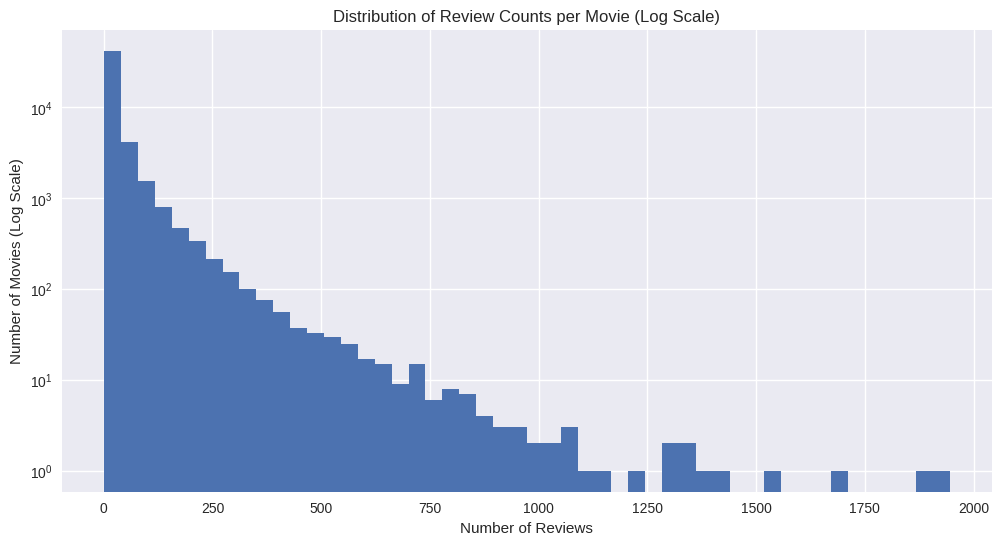


Movies with only one review: 4 (0.01%)

Rating consistency analysis (for movies with 10+ reviews):

Movies with most consistent ratings (lowest std dev):
       ProductId  review_count  avg_rating  rating_std
83    0767016351            11         5.0         0.0
1933  0800104803            14         5.0         0.0
2083  0985265108            26         5.0         0.0
2272  156501345X            14         5.0         0.0
2724  1897020759            14         5.0         0.0
3086  6300213323            10         5.0         0.0
3707  6301115538            31         5.0         0.0
4330  6301802837            10         5.0         0.0
4357  6301827724            10         5.0         0.0
4420  6301928245            17         5.0         0.0

Movies with most controversial ratings (highest std dev):
        ProductId  review_count  avg_rating  rating_std
11041  B00000JPHM            10    3.000000    2.108185
10323  6306004068            12    3.000000    2.088932
35511  B001GM

In [31]:
# Get basic movie statistics
total_reviews = len(train)
unique_movies = train['ProductId'].nunique()
reviews_per_movie = train['ProductId'].value_counts()

# Basic statistics
print(f"Total number of reviews: {total_reviews}")
print(f"Number of unique movies: {unique_movies}")
print(f"\nReviews per movie statistics:")
print(reviews_per_movie.describe())

# Calculate average rating per movie
movie_stats = train.groupby('ProductId').agg({
    'Score': ['count', 'mean', 'std']
}).reset_index()
movie_stats.columns = ['ProductId', 'review_count', 'avg_rating', 'rating_std']

# Filter movies with minimum number of reviews for more reliable statistics
min_reviews = 10  # we can adjust this threshold
popular_movies = movie_stats[movie_stats['review_count'] >= min_reviews]

# Plot distribution of average ratings for movies
plt.figure(figsize=(12, 6))
plt.hist(popular_movies['avg_rating'], bins=50)
plt.title(f'Distribution of Average Movie Ratings (Movies with {min_reviews}+ reviews)')
plt.xlabel('Average Rating')
plt.ylabel('Number of Movies')
plt.show()

# Look at movies with extreme ratings
print("\nTop 10 Highest Rated Movies (with 10+ reviews):")
print(popular_movies.nlargest(10, 'avg_rating')[['ProductId', 'review_count', 'avg_rating', 'rating_std']])

print("\nTop 10 Lowest Rated Movies (with 10+ reviews):")
print(popular_movies.nsmallest(10, 'avg_rating')[['ProductId', 'review_count', 'avg_rating', 'rating_std']])

# Distribution of review counts
plt.figure(figsize=(12, 6))
plt.hist(movie_stats['review_count'], bins=50)
plt.yscale('log')
plt.title('Distribution of Review Counts per Movie (Log Scale)')
plt.xlabel('Number of Reviews')
plt.ylabel('Number of Movies (Log Scale)')
plt.show()

# Calculate percentages of movies by review count
single_review_movies = (reviews_per_movie == 1).sum()
print(f"\nMovies with only one review: {single_review_movies} ({(single_review_movies/unique_movies)*100:.2f}%)")

# Let's look at rating consistency
print("\nRating consistency analysis (for movies with 10+ reviews):")
print("\nMovies with most consistent ratings (lowest std dev):")
print(popular_movies.nsmallest(10, 'rating_std')[['ProductId', 'review_count', 'avg_rating', 'rating_std']])

print("\nMovies with most controversial ratings (highest std dev):")
print(popular_movies.nlargest(10, 'rating_std')[['ProductId', 'review_count', 'avg_rating', 'rating_std']])

# Calculate correlation between number of reviews and average rating
correlation = popular_movies['review_count'].corr(popular_movies['avg_rating'])
print(f"\nCorrelation between number of reviews and average rating: {correlation:.3f}")

## Movie Raitings

I feel like simpler average would do a better job

Working with a sample of 1000000 reviews
Original dataset size: 1485341 reviews
Sample percentage: 67.3%

Movie Categories Summary:
Minimum reviews threshold: 4

Category Distribution:
Consistently Good: 7840 movies (15.69%)
Good but Mixed: 5752 movies (11.51%)
Mixed Reviews: 23490 movies (47.02%)
Poor but Controversial: 4560 movies (9.13%)
Consistently Poor: 126 movies (0.25%)
Insufficient Reviews: 8187 movies (16.39%)


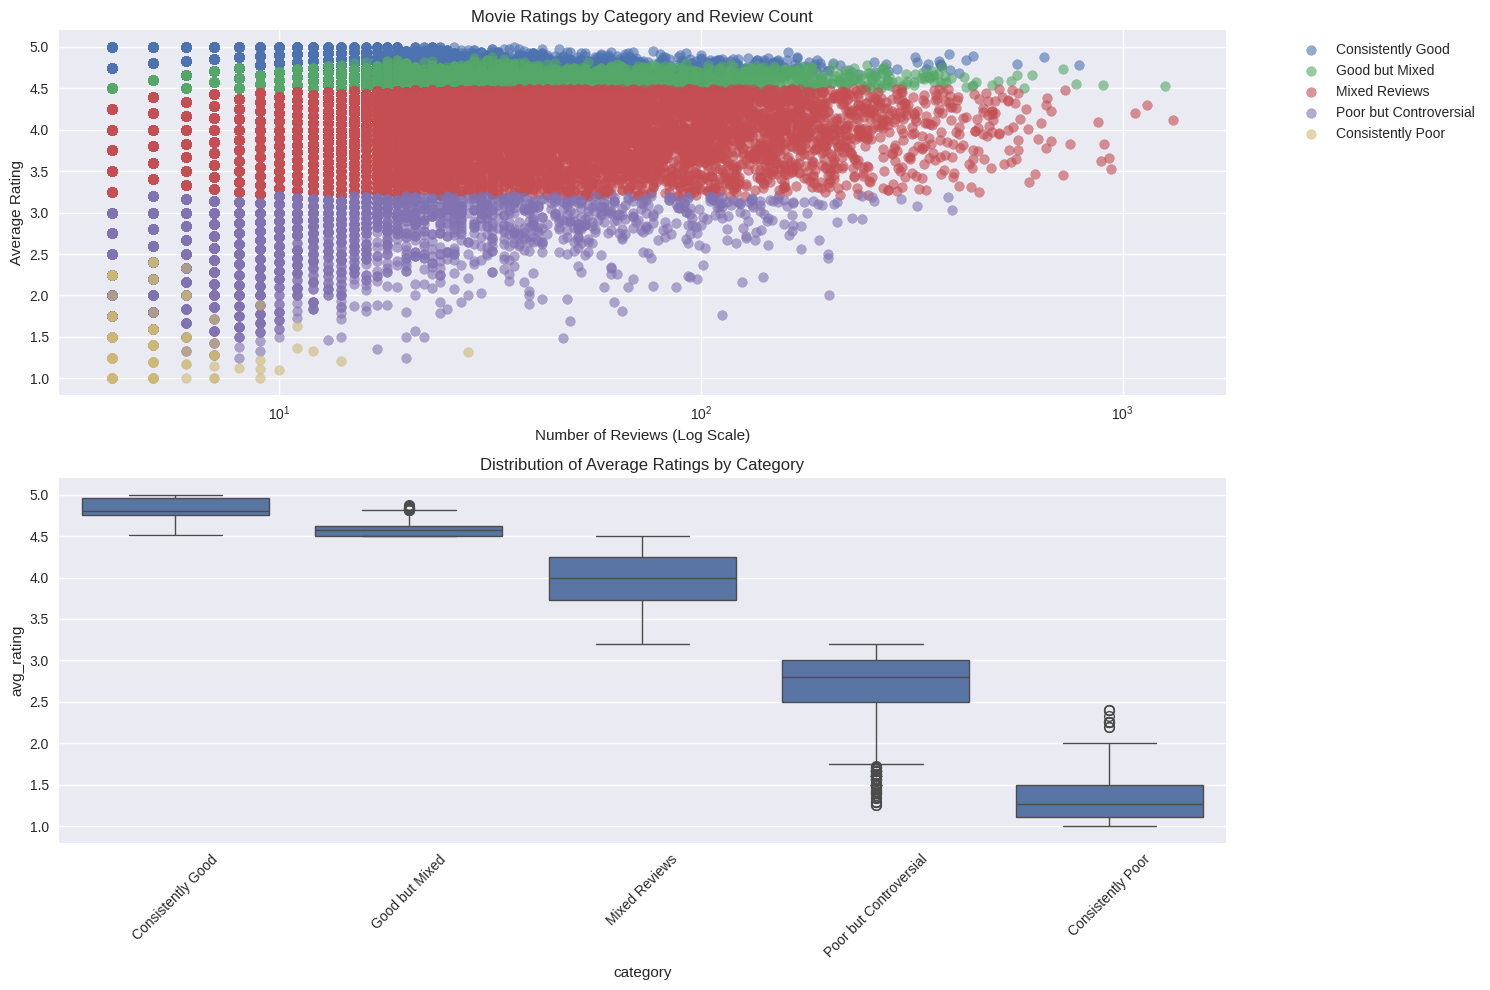


Example movies from each category:

Top 3 most reviewed Consistently Good movies:
        ProductId  review_count  avg_rating  rating_std  percent_5  percent_1
2684   1608838137           789       4.779       0.619      0.854      0.005
42481  B004NSUXHU           651       4.879       0.418      0.908      0.000
1563   0792833171           560       4.791       0.664      0.871      0.018

Top 3 most reviewed Good but Mixed movies:
        ProductId  review_count  avg_rating  rating_std  percent_5  percent_1
35863  B001KVZ6HK          1260       4.522       0.888      0.702      0.021
49341  B00FZM8Z7I           900       4.544       0.931      0.748      0.024
39656  B0038M2APA           775       4.547       0.826      0.694      0.017

Top 3 most reviewed Mixed Reviews movies:
        ProductId  review_count  avg_rating  rating_std  percent_5  percent_1
40019  B003EYVXV4          1316       4.112       1.122      0.495      0.045
46820  B009934S5M          1139       4.298       

In [ ]:
# Basic parameters
SAMPLE_SIZE = 1000000
MIN_REVIEWS = 4

# Fixed rating boundaries instead of percentiles
RATING_HIGH_THRESHOLD = 4.5  # Above this is considered high rating
RATING_LOW_THRESHOLD = 3.2   # Below this is considered low rating

# Other thresholds
VERY_POSITIVE_THRESHOLD = 0.6    # Percentage of 5-star ratings needed
VERY_NEGATIVE_THRESHOLD = 0.5    # Percentage of 1-2 star ratings needed
CONSISTENCY_THRESHOLD = 0.25      # Median standard deviation threshold

# Updated category order with combined middle category
CATEGORY_ORDER = [
    'Consistently Good',
    'Good but Mixed',
    'Mixed Reviews',             # Now includes both average and mixed
    'Poor but Controversial',
    'Consistently Poor',
    'Insufficient Reviews'
]

def calculate_movie_stats(df):
    # Basic statistics
    stats = df.groupby('ProductId').agg({
        'Score': ['count', 'mean', 'std']
    }).reset_index()
    stats.columns = ['ProductId', 'review_count', 'avg_rating', 'rating_std']

    # Calculate rating distributions using cross tabulation
    rating_counts = pd.crosstab(df['ProductId'], df['Score'])
    rating_counts.columns = [f'count_{i}' for i in range(1, 6)]
    rating_counts = rating_counts.reset_index()

    # Merge basic stats with rating counts
    movie_stats = pd.merge(stats, rating_counts, on='ProductId', how='left')
    movie_stats = movie_stats.fillna(0)  # Fill any missing counts with 0

    # Calculate total reviews for each movie
    movie_stats['total'] = movie_stats[[f'count_{i}' for i in range(1, 6)]].sum(axis=1)

    # Calculate percentages
    for i in range(1, 6):
        movie_stats[f'percent_{i}'] = movie_stats[f'count_{i}'] / movie_stats['total']

    return movie_stats

def categorize_movies(movie_stats):
    # Start with reliable movies only for calculating thresholds
    reliable_movies = movie_stats[movie_stats['review_count'] >= MIN_REVIEWS].copy()

    # Calculate consistency threshold
    std_threshold = reliable_movies['rating_std'].quantile(CONSISTENCY_THRESHOLD)

    # Initialize category as 'Insufficient Reviews'
    movie_stats['category'] = 'Insufficient Reviews'

    def assign_category(row):
        if row['review_count'] < MIN_REVIEWS:
            return 'Insufficient Reviews'

        is_consistent = row['rating_std'] <= std_threshold
        high_rating = row['avg_rating'] >= RATING_HIGH_THRESHOLD
        low_rating = row['avg_rating'] <= RATING_LOW_THRESHOLD
        very_positive = row['percent_5'] > VERY_POSITIVE_THRESHOLD
        very_negative = (row['percent_1'] + row['percent_2']) > VERY_NEGATIVE_THRESHOLD

        if high_rating:
            return 'Consistently Good' if is_consistent and very_positive else 'Good but Mixed'
        elif low_rating:
            return 'Consistently Poor' if is_consistent and very_negative else 'Poor but Controversial'
        else:
            return 'Mixed Reviews'  # All middle ratings now go here

    # Apply categorization to movies with sufficient reviews
    mask = movie_stats['review_count'] >= MIN_REVIEWS
    movie_stats.loc[mask, 'category'] = movie_stats[mask].apply(assign_category, axis=1)

    return movie_stats

def analyze_and_visualize():
    """
    Complete analysis function that performs all steps and creates visualizations
    """
    # Print sample size info
    print(f"Working with a sample of {SAMPLE_SIZE} reviews")
    print(f"Original dataset size: {len(train)} reviews")
    print(f"Sample percentage: {(SAMPLE_SIZE/len(train))*100:.1f}%")

    # Take a random sample
    train_sample = train.sample(n=SAMPLE_SIZE, random_state=42)

    # Calculate statistics and categorize movies
    movie_stats = calculate_movie_stats(train_sample)
    categorized_movies = categorize_movies(movie_stats)

    # Create a categorical type with our custom order
    cat_type = pd.CategoricalDtype(categories=CATEGORY_ORDER, ordered=True)
    categorized_movies['category'] = categorized_movies['category'].astype(cat_type)

    # Print summary
    print("\nMovie Categories Summary:")
    print(f"Minimum reviews threshold: {MIN_REVIEWS}")
    print("\nCategory Distribution:")
    category_dist = categorized_movies['category'].value_counts()
    # Sort by our predefined order
    for category in CATEGORY_ORDER:
        if category in category_dist:
            count = category_dist[category]
            percentage = (count/len(categorized_movies))*100
            print(f"{category}: {count} movies ({percentage:.2f}%)")

    # Create visualizations
    plt.figure(figsize=(15, 10))

    # Scatter plot
    plt.subplot(2, 1, 1)
    for category in CATEGORY_ORDER:
        if category != 'Insufficient Reviews':
            mask = categorized_movies['category'] == category
            data = categorized_movies[mask]
            plt.scatter(data['review_count'], data['avg_rating'],
                       alpha=0.6, label=category)
    plt.xscale('log')
    plt.xlabel('Number of Reviews (Log Scale)')
    plt.ylabel('Average Rating')
    plt.title('Movie Ratings by Category and Review Count')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

    # Box plot
    plt.subplot(2, 1, 2)
    box_data = categorized_movies[categorized_movies['category'] != 'Insufficient Reviews']
    sns.boxplot(data=box_data, x='category', y='avg_rating', order=CATEGORY_ORDER[:-1])  # Exclude Insufficient Reviews
    plt.xticks(rotation=45)
    plt.title('Distribution of Average Ratings by Category')
    plt.tight_layout()
    plt.show()

    # Print examples
    print("\nExample movies from each category:")
    for category in CATEGORY_ORDER:
        if category != 'Insufficient Reviews':
            print(f"\nTop 3 most reviewed {category} movies:")
            cat_data = categorized_movies[categorized_movies['category'] == category]
            examples = cat_data.nlargest(3, 'review_count')
            print(examples[['ProductId', 'review_count', 'avg_rating', 'rating_std', 'percent_5', 'percent_1']].round(3))

    return categorized_movies

# Run the analysis
categorized_movies = analyze_and_visualize()

### Quick Check, how many reveiw each user give

# Analyze User



## User Credibility Analyzer

Calculates user credibility scores based on helpfulness ratio (70%) and review volume (30%).



In [ ]:
# ACTUAL CODE

In [40]:
def calculate_user_credibility(df):
    """
    Calculates user credibility scores based on helpfulness ratio (70%) and review volume (30%).
    """
    # Aggregate by user
    user_stats = df.groupby('UserId').agg({
        'HelpfulnessNumerator': 'sum',
        'HelpfulnessDenominator': 'sum',
        'Score': 'count'
    }).reset_index()

    # Rename columns
    user_stats.columns = ['UserId', 'TotalHelpfulVotes', 'TotalPossibleHelpfulVotes', 'NumberOfReviews']

    # Calculate helpfulness ratio
    user_stats['HelpfulnessRatio'] = np.where(
        user_stats['TotalPossibleHelpfulVotes'] > 0,
        user_stats['TotalHelpfulVotes'] / user_stats['TotalPossibleHelpfulVotes'],
        0
    )

    # Calculate components
    helpfulness_component = 0.7 * user_stats['HelpfulnessRatio']

    # Log transform review count to handle outliers
    log_reviews = np.log1p(user_stats['NumberOfReviews'])
    volume_component = 0.3 * (log_reviews / log_reviews.max())

    # Calculate final score
    user_stats['CredibilityScore'] = helpfulness_component + volume_component

    # Normalize to 0-100 scale
    user_stats['CredibilityScore'] = 100 * (
        (user_stats['CredibilityScore'] - user_stats['CredibilityScore'].min()) /
        (user_stats['CredibilityScore'].max() - user_stats['CredibilityScore'].min())
    )

    return user_stats

# Load and process data
df = pd.read_csv('train.csv')
user_stats = calculate_user_credibility(df)

Printing function fo analyzer above

Overall Credibility Statistics:
count    123960.000000
mean         48.858170
std          23.486587
min           0.000000
25%          32.883921
50%          50.380983
75%          67.475124
max         100.000000
Name: CredibilityScore, dtype: float64


Top 10 Most Credible Users:
                UserId  CredibilityScore  HelpfulnessRatio  NumberOfReviews  TotalHelpfulVotes
14952   A1GGOC9PVDXW7Z        100.000000          0.935185              940               8484
39753   A27H9DOUGY9FOS         99.067950          0.918748             1012              24164
101644   ABH4G7TVI6G2T         98.998515          0.926503              867               9631
23492   A1POFVVXUZR3IQ         98.396251          0.927663              737               5399
115523   AQP1VPK16SVWM         98.245803          0.909816              978              21549
54367   A2NJO6YE954DBH         98.090770          0.875619             1735              30243
119573   AV6QDP8Q0ONK4         97.460726          

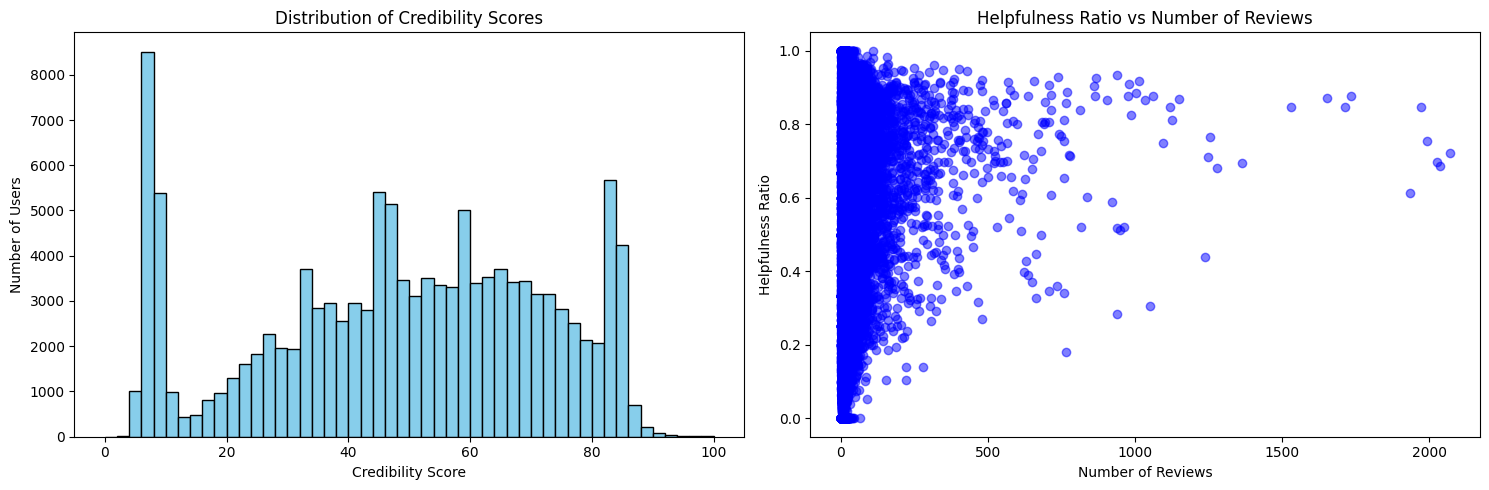

In [ ]:
import matplotlib.pyplot as plt

# Print overall statistics
print("Overall Credibility Statistics:")
print(user_stats['CredibilityScore'].describe())
print("\n")

# Display top 10 users
print("Top 10 Most Credible Users:")
top_users = user_stats.nlargest(10, 'CredibilityScore')
print(top_users[['UserId', 'CredibilityScore', 'HelpfulnessRatio',
                 'NumberOfReviews', 'TotalHelpfulVotes']].to_string())

# Create visualizations
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Credibility Score Distribution
ax1.hist(user_stats['CredibilityScore'], bins=50, color='skyblue', edgecolor='black')
ax1.set_title('Distribution of Credibility Scores')
ax1.set_xlabel('Credibility Score')
ax1.set_ylabel('Number of Users')

# Helpfulness Ratio vs Number of Reviews
ax2.scatter(user_stats['NumberOfReviews'],
           user_stats['HelpfulnessRatio'],
           alpha=0.5,
           color='blue')
ax2.set_title('Helpfulness Ratio vs Number of Reviews')
ax2.set_xlabel('Number of Reviews')
ax2.set_ylabel('Helpfulness Ratio')

plt.tight_layout()
plt.show()

# Function to check specific users
def check_user(user_id):
    if user_id in user_stats['UserId'].values:
        user = user_stats[user_stats['UserId'] == user_id].iloc[0]
        print(f"\nUser: {user_id}")
        print(f"Credibility Score: {user['CredibilityScore']:.2f}")
        print(f"Helpfulness Ratio: {user['HelpfulnessRatio']:.3f}")
        print(f"Number of Reviews: {user['NumberOfReviews']}")
        print(f"Total Helpful Votes: {user['TotalHelpfulVotes']}")
        print(f"Total Possible Votes: {user['TotalPossibleHelpfulVotes']}")
    else:
        print(f"User {user_id} not found")

# To check a specific user, uncomment and replace USER_ID:
# check_user('USER_ID')

## User Bias Analysis

Does the user give below or above average score for a moive and by how much



In [38]:
import pandas as pd
import numpy as np

def calculate_user_bias(df):
    """
    Calculate user rating bias by comparing each user's ratings to the global movie averages.

    Parameters:
    df (pandas.DataFrame): DataFrame containing at minimum these columns:
        - UserId: identifier for the user
        - ProductId: identifier for the movie
        - Score: rating given by the user

    Returns:
    pandas.DataFrame: DataFrame containing user biases
    dict: Dictionary mapping user IDs to their bias values
    float: Global average rating
    """
    # Calculate global average rating
    global_average = df['Score'].mean()

    # Calculate average rating for each movie
    movie_averages = df.groupby('ProductId')['Score'].mean()

    # Create a DataFrame with user ratings and corresponding movie averages
    comparison_df = df.join(
        movie_averages.rename('movie_average'),
        on='ProductId'
    )

    # Calculate bias for each rating (difference from movie average)
    comparison_df['rating_bias'] = comparison_df['Score'] - comparison_df['movie_average']

    # Calculate average bias for each user
    user_biases = comparison_df.groupby('UserId').agg({
        'Score': ['count', 'mean'],
        'rating_bias': ['mean', 'std']
    }).round(3)

    # Flatten column names
    user_biases.columns = ['rating_count', 'avg_rating', 'avg_bias', 'bias_std']

    # Create a dictionary for easy lookup
    bias_dict = user_biases['avg_bias'].to_dict()

    # Add some useful statistics
    user_biases['bias_percentile'] = user_biases['avg_bias'].rank(pct=True).round(3)
    user_biases['is_harsh_critic'] = user_biases['avg_bias'] < -0.5
    user_biases['is_generous_critic'] = user_biases['avg_bias'] > 0.5

    return user_biases, bias_dict, global_average

In [ ]:
import pandas as pd
import numpy as np
from typing import Dict, Tuple
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_user_biases(user_biases_df: pd.DataFrame,
                       bias_dict: Dict,
                       global_avg: float,
                       user_id: str = None,
                       n_examples: int = 5) -> None:
    """
    Print detailed analysis of user rating biases and patterns.

    Parameters:
    user_biases_df: DataFrame containing user bias statistics
    bias_dict: Dictionary mapping user IDs to their biases
    global_avg: Global average rating
    user_id: Optional specific user ID to analyze
    n_examples: Number of examples to show in each category
    """
    print("=== GLOBAL STATISTICS ===")
    print(f"Global average rating: {global_avg:.2f}")
    print(f"Total number of users: {len(user_biases_df)}")

    print("\n=== BIAS DISTRIBUTION ===")
    bias_stats = user_biases_df['avg_bias'].describe()
    print(f"Mean bias: {bias_stats['mean']:.3f}")
    print(f"Std deviation: {bias_stats['std']:.3f}")
    print(f"Min bias: {bias_stats['min']:.3f}")
    print(f"Max bias: {bias_stats['max']:.3f}")

    print("\n=== RATING BEHAVIOR CATEGORIES ===")
    harsh_critics = user_biases_df[user_biases_df['is_harsh_critic']]
    generous_critics = user_biases_df[user_biases_df['is_generous_critic']]
    neutral_critics = user_biases_df[
        ~user_biases_df['is_harsh_critic'] &
        ~user_biases_df['is_generous_critic']
    ]

    print(f"Harsh critics (bias < -0.5): {len(harsh_critics)} users ({len(harsh_critics)/len(user_biases_df)*100:.1f}%)")
    print(f"Generous critics (bias > 0.5): {len(generous_critics)} users ({len(generous_critics)/len(user_biases_df)*100:.1f}%)")
    print(f"Neutral critics: {len(neutral_critics)} users ({len(neutral_critics)/len(user_biases_df)*100:.1f}%)")

    print("\n=== MOST GENEROUS CRITICS ===")
    print(user_biases_df.nlargest(n_examples, 'avg_bias')[
        ['rating_count', 'avg_rating', 'avg_bias', 'bias_std']
    ])

    print("\n=== HARSHEST CRITICS ===")
    print(user_biases_df.nsmallest(n_examples, 'avg_bias')[
        ['rating_count', 'avg_rating', 'avg_bias', 'bias_std']
    ])

    print("\n=== MOST ACTIVE REVIEWERS ===")
    print(user_biases_df.nlargest(n_examples, 'rating_count')[
        ['rating_count', 'avg_rating', 'avg_bias', 'bias_std']
    ])

    print("\n=== MOST CONSISTENT REVIEWERS ===")
    # Filter for users with at least 5 ratings to avoid low-rating outliers
    consistent = user_biases_df[user_biases_df['rating_count'] >= 5]
    print(consistent.nsmallest(n_examples, 'bias_std')[
        ['rating_count', 'avg_rating', 'avg_bias', 'bias_std']
    ])

    print("\n=== MOST VARIABLE REVIEWERS ===")
    print(consistent.nlargest(n_examples, 'bias_std')[
        ['rating_count', 'avg_rating', 'avg_bias', 'bias_std']
    ])

    if user_id is not None and user_id in bias_dict:
        print(f"\n=== SPECIFIC USER ANALYSIS: {user_id} ===")
        user_data = user_biases_df.loc[user_id]
        print(f"Number of ratings: {user_data['rating_count']}")
        print(f"Average rating: {user_data['avg_rating']:.2f}")
        print(f"Average bias: {user_data['avg_bias']:.2f}")
        print(f"Bias standard deviation: {user_data['bias_std']:.2f}")
        print(f"Bias percentile: {user_data['bias_percentile']*100:.1f}%")

        if user_data['is_harsh_critic']:
            print("This user tends to be a harsh critic")
        elif user_data['is_generous_critic']:
            print("This user tends to be a generous critic")
        else:
            print("This user tends to be a neutral critic")

def plot_bias_distribution(user_biases_df: pd.DataFrame) -> None:
    """
    Create visualizations of the bias distribution.
    """
    plt.figure(figsize=(12, 6))

    # Plot 1: Bias Distribution
    plt.subplot(1, 2, 1)
    sns.histplot(data=user_biases_df, x='avg_bias', bins=50)
    plt.title('Distribution of User Biases')
    plt.xlabel('Average Bias')
    plt.ylabel('Count')

    # Plot 2: Bias vs Rating Count
    plt.subplot(1, 2, 2)
    sns.scatterplot(data=user_biases_df, x='avg_bias', y='rating_count', alpha=0.5)
    plt.title('Bias vs Number of Ratings')
    plt.xlabel('Average Bias')
    plt.ylabel('Number of Ratings')

    plt.tight_layout()
    plt.show()

# Example usage function
def run_bias_analysis(train_data_path: str, specific_user_id: str = None) -> Tuple[pd.DataFrame, Dict, float]:
    """
    Run the complete bias analysis pipeline.

    Parameters:
    train_data_path: Path to the training data CSV
    specific_user_id: Optional user ID to analyze in detail

    Returns:
    Tuple containing user_biases_df, bias_dict, and global_average
    """
    # Read the data
    df = pd.read_csv(train_data_path)

    # Calculate biases using the previous function
    user_biases_df, bias_dict, global_avg = calculate_user_bias(df)

    # Run the analysis
    analyze_user_biases(user_biases_df, bias_dict, global_avg, specific_user_id)

    # Create visualizations
    plot_bias_distribution(user_biases_df)

    return user_biases_df, bias_dict, global_avg

=== GLOBAL STATISTICS ===
Global average rating: 4.11
Total number of users: 123960

=== BIAS DISTRIBUTION ===
Mean bias: 0.037
Std deviation: 0.615
Min bias: -3.669
Max bias: 2.800

=== RATING BEHAVIOR CATEGORIES ===
Harsh critics (bias < -0.5): 21225 users (17.1%)
Generous critics (bias > 0.5): 27865 users (22.5%)
Neutral critics: 74870 users (60.4%)

=== MOST GENEROUS CRITICS ===
                rating_count  avg_rating  avg_bias  bias_std
UserId                                                      
A2Z25OMP3HCGGP             2         5.0     2.800     0.283
A1THMZEF7YP3LP             4         5.0     2.591     0.581
A22UHMEDHSNUEJ             1         5.0     2.333       NaN
A130A2HCI4UH9I             5         5.0     2.217     0.450
A379AG19MZTJZP             5         5.0     2.190     0.448

=== HARSHEST CRITICS ===
                rating_count  avg_rating  avg_bias  bias_std
UserId                                                      
A3TSU129QNJZIF             5         1.

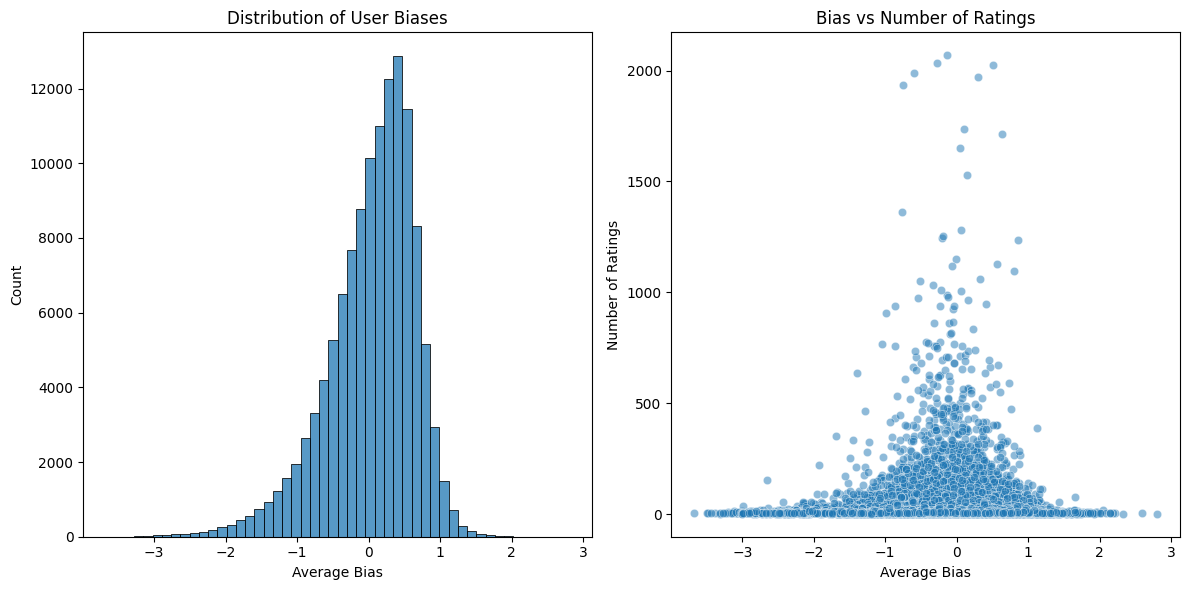

In [ ]:
# Basic usage
df = pd.read_csv('train.csv')
user_biases_df, bias_dict, global_avg = calculate_user_bias(df)
analyze_user_biases(user_biases_df, bias_dict, global_avg)

# To analyze a specific user
analyze_user_biases(user_biases_df, bias_dict, global_avg, user_id="A2SUAM1J3GNN3B")

# Or use the complete pipeline
results = run_bias_analysis('train.csv', specific_user_id="A2SUAM1J3GNN3B")

## Putting together

Putting Data Together seeing if everything works

In [ ]:
# Load your data
df = pd.read_csv('train.csv')

# Calculate user bias
user_biases, bias_dict, global_average = calculate_user_bias(df)

# Calculate user credibility
user_stats = calculate_user_credibility(df)

# Merge user bias and credibility scores
user_features = user_biases.reset_index().merge(
    user_stats[['UserId', 'CredibilityScore']],
    on='UserId',
    how='left'
)

# Merge the features back into the original DataFrame
df_with_features = df.merge(
    user_features[['UserId', 'avg_bias', 'CredibilityScore']],
    on='UserId',
    how='left'
)

print("Done")

In [ ]:
print(df_with_features.head())

# TF-IDF

Convert rewievs into hot words

## combine title and body texts

will make stuff easier

In [ ]:
import pandas as pd

def combine_text_fields(df):
    """Combines Summary and Text fields into a single text column"""
    # Fill NaN values with empty strings
    df['Summary'] = df['Summary'].fillna('')
    df['Text'] = df['Text'].fillna('')

    # Combine fields with a space separator
    df['CombinedText'] = df['Summary'] + ' ' + df['Text']
    return df

# Example usage
train_df = pd.read_csv('train.csv')
train_df_combined = combine_text_fields(train_df)

print(train_df_combined.head())

        Id   ProductId          UserId  HelpfulnessNumerator  \
0   914403  B0009W5KHM   AV6QDP8Q0ONK4                     2   
1   354887  6303079709  A2I8RXJN80A2D2                     0   
2  1407653  B004H0M2XC  A3FHV3RV8Z12E6                     0   
3  1377458  B003ZJ9536  A12VLTA3ZHVPUY                     1   
4   475323  630574453X  A13NM1PES9OXVN                     2   

   HelpfulnessDenominator        Time  \
0                       2  1341014400   
1                       0  1168819200   
2                       0  1386201600   
3                       1  1348704000   
4                       3   970012800   

                                         Summary  \
0                                  GOOD FUN FILM   
1                                   Movie Review   
2             When is it a good time to Consent?   
3                                          TRUTH   
4  Intelligent and bittersweet -- stays with you   

                                                Text  S

## Check Vocab Stats

Total vocabulary size from 10.0% sample: 55123


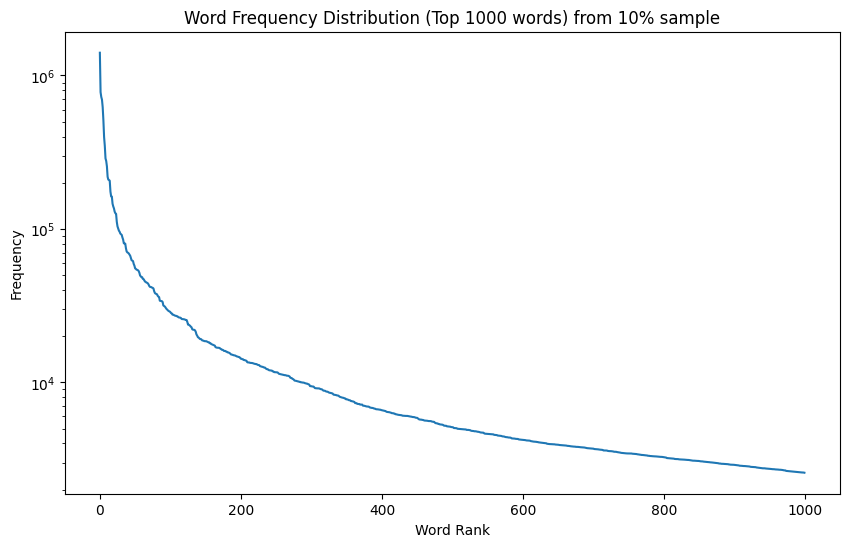

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Take a random 10% sample (around 170k reviews)
sample_size = 0.1
train_sample = train_df_combined.sample(frac=sample_size, random_state=42)

# Check vocab size on sample
temp_vectorizer = TfidfVectorizer(
    max_features=None,
    min_df=5,
    max_df=0.95,
    strip_accents='unicode',
    lowercase=True,
    stop_words='english'
)

temp_vectorizer.fit(train_sample['CombinedText'])
total_vocab_size = len(temp_vectorizer.vocabulary_)
print(f"Total vocabulary size from {sample_size*100}% sample: {total_vocab_size}")

from collections import Counter
import matplotlib.pyplot as plt

# We already have the sample and vocab size, so let's continue from there
word_freq = Counter()
for text in train_sample['CombinedText']:
    words = str(text).split()  # Added str() to handle any non-string values
    word_freq.update(words)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(sorted(word_freq.values(), reverse=True)[:1000])
plt.title(f'Word Frequency Distribution (Top 1000 words) from 10% sample')
plt.xlabel('Word Rank')
plt.ylabel('Frequency')
plt.yscale('log')
plt.show()


In [ ]:
from scipy.sparse import csr_matrix
import numpy as np

# Create TF-IDF with 7500 features
tfidf = TfidfVectorizer(
    max_features=7500,
    min_df=5,
    max_df=0.95,
    strip_accents='unicode',
    lowercase=True,
    stop_words='english'
)

# Transform the data
tfidf_features = tfidf.fit_transform(train_df_combined['CombinedText'])

# Calculate size in memory
size_sparse = tfidf_features.data.nbytes + tfidf_features.indptr.nbytes + tfidf_features.indices.nbytes
size_gb_sparse = size_sparse / (1024**3)

print(f"TF-IDF matrix shape: {tfidf_features.shape}")
print(f"Memory usage (sparse matrix): {size_gb_sparse:.2f} GB")

# If we were to convert to dense (don't actually do this!)
size_dense = (tfidf_features.shape[0] * tfidf_features.shape[1] * 8) / (1024**3)  # 8 bytes per float64
print(f"Memory usage if dense: {size_dense:.2f} GB")

TF-IDF matrix shape: (1697533, 7500)
Memory usage (sparse matrix): 1.03 GB
Memory usage if dense: 94.86 GB


In [ ]:
# Let's look at a few examples of how reviews are converted
def show_top_tfidf_terms(doc_idx, top_n=10):
   print("Original Text:")
   print(train_df_combined['CombinedText'].iloc[doc_idx][:200], "...\n")  # First 200 chars

   # Get feature names
   feature_names = tfidf.get_feature_names_out()

   # Get TF-IDF scores for this document
   scores = tfidf_features[doc_idx]

   # Get indices of non-zero scores and their values
   non_zero = scores.nonzero()[1]
   scores_array = scores.toarray()[0]

   # Sort by score
   sorted_idx = non_zero[np.argsort(scores_array[non_zero])[::-1]]

   print("Top terms by TF-IDF score:")
   for idx in sorted_idx[:top_n]:
       print(f"{feature_names[idx]}: {scores_array[idx]:.4f}")
   print("\n" + "="*50 + "\n")

# Show first 3 documents
for i in [0, 1, 2]:
   print(f"Review #{i+1}")
   show_top_tfidf_terms(i)

Review #1
Original Text:
GOOD FUN FILM While most straight to DVD films are not worth watching, this one is the exception.Kim Basinger plays a "Pink Lady" (Mary Kay) cosmetic sales lady who had met Elvis as a child. During he ...

Top terms by TF-IDF score:
elvis: 0.6054
lady: 0.1795
thank: 0.1765
die: 0.1684
kay: 0.1342
denise: 0.1327
ham: 0.1297
richards: 0.1290
sales: 0.1210
weakest: 0.1191


Review #2
Original Text:
Movie Review I have wanted this one for sometime, also.  I enjoy William Powell, and also Irene Dunne. ...

Top terms by TF-IDF score:
irene: 0.5585
powell: 0.5263
william: 0.3819
wanted: 0.3095
review: 0.2997
enjoy: 0.2550
movie: 0.1209


Review #3
Original Text:
When is it a good time to Consent? Actually this was a pretty darn good indie film; It appears well planned out, dialog was really meaningful. The acting was acceptable and at times so entertaining I  ...

Top terms by TF-IDF score:
indie: 0.2219
times: 0.2204
meaningful: 0.2181
darn: 0.2158
acceptable: 0.2155

The model did identify the keywords but I fell like elvis is not a best way to predict the review. I want the model to somehow weigh adjactives a bit more because there is about none after this analysis i dont think increasing max features will help. adjactives might appear but deifnetely not on the top.

In [32]:
import pandas as pd
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from scipy.sparse import csr_matrix

class AdjectiveWeightedVectorizer(BaseEstimator, TransformerMixin):
    def __init__(self, max_features=7500, min_df=5, max_df=0.95, adjective_boost=2.0):
        """
        Custom vectorizer that gives higher weights to adjectives.

        Parameters:
        - max_features: Maximum number of features to keep
        - min_df: Minimum document frequency
        - max_df: Maximum document frequency
        - adjective_boost: Multiplier for adjective weights
        """
        self.max_features = max_features
        self.min_df = min_df
        self.max_df = max_df
        self.adjective_boost = adjective_boost
        self.vectorizer = TfidfVectorizer(
            max_features=max_features,
            min_df=min_df,
            max_df=max_df,
            strip_accents='unicode',
            lowercase=True,
            stop_words='english'
        )
        # Download required NLTK data
        try:
            nltk.data.find('tokenizers/punkt')
            nltk.data.find('taggers/averaged_perceptron_tagger')
        except LookupError:
            nltk.download('punkt')
            nltk.download('averaged_perceptron_tagger')

    def get_pos_tags(self, text):
        """Get POS tags for each word in the text"""
        tokens = word_tokenize(str(text))
        return pos_tag(tokens)

    def is_adjective(self, pos_tag):
        """Check if the POS tag corresponds to an adjective"""
        return pos_tag.startswith('JJ')

    def fit(self, X, y=None):
        """Fit the vectorizer and store adjective information"""
        # First, fit the regular TF-IDF vectorizer
        self.vectorizer.fit(X)

        # Get the vocabulary and create a mapping of words to their POS tags
        self.vocab_pos_tags = {}
        for text in X:
            pos_tagged = self.get_pos_tags(text)
            for word, tag in pos_tagged:
                word = word.lower()  # Convert to lowercase to match vectorizer
                if word in self.vectorizer.vocabulary_:
                    self.vocab_pos_tags[word] = tag

        return self

    def transform(self, X):
        """Transform the text data with boosted weights for adjectives"""
        # Get the regular TF-IDF matrix
        tfidf_matrix = self.vectorizer.transform(X)

        # Create an adjustment matrix for adjective boosting
        feature_names = self.vectorizer.get_feature_names_out()
        adj_multipliers = np.ones(len(feature_names))

        # Apply adjective boost
        for idx, word in enumerate(feature_names):
            if word in self.vocab_pos_tags and self.is_adjective(self.vocab_pos_tags[word]):
                adj_multipliers[idx] = self.adjective_boost

        # Multiply the TF-IDF matrix by the adjective multipliers
        adjusted_matrix = tfidf_matrix.multiply(csr_matrix(adj_multipliers))

        return adjusted_matrix

    def get_feature_names_out(self):
        """Get feature names from the vectorizer"""
        return self.vectorizer.get_feature_names_out()

    def show_top_terms(self, doc_idx, X, top_n=10):
        """Show top terms for a document with their weights and POS tags"""
        # Transform the single document
        feature_matrix = self.transform([X[doc_idx]])
        feature_names = self.get_feature_names_out()

        # Get non-zero elements and their indices
        non_zero = feature_matrix.nonzero()[1]
        scores = feature_matrix.data

        # Sort by score
        sorted_idx = np.argsort(scores)[::-1]

        print("Original Text:")
        print(X[doc_idx][:200], "...\n")
        print("Top terms by Adjective-Weighted TF-IDF score:")
        for idx in sorted_idx[:top_n]:
            word = feature_names[non_zero[idx]]
            score = scores[idx]
            pos = self.vocab_pos_tags.get(word, 'Unknown')
            is_adj = self.is_adjective(pos)
            print(f"{word} ({pos}): {score:.4f} {'*' if is_adj else ''}")

# Example usage function
def process_reviews_with_adjective_weights(train_df, sample_size=0.1, adjective_boost=2.0):
    """
    Process reviews using the adjective-weighted vectorizer

    Parameters:
    - train_df: DataFrame containing the reviews
    - sample_size: Fraction of data to sample
    - adjective_boost: Weight multiplier for adjectives
    """
    # Combine text fields
    train_df['CombinedText'] = train_df['Summary'].fillna('') + ' ' + train_df['Text'].fillna('')

    # Take a sample
    train_sample = train_df.sample(frac=sample_size, random_state=42)

    # Create and fit the vectorizer
    vectorizer = AdjectiveWeightedVectorizer(adjective_boost=adjective_boost)
    vectorizer.fit(train_sample['CombinedText'])

    # Show examples
    print("Showing example reviews with adjective-weighted terms:\n")
    for i in range(3):
        print(f"Review #{i+1}")
        vectorizer.show_top_terms(i, train_sample['CombinedText'])
        print("\n" + "="*50 + "\n")

    return vectorizer

In [33]:
def print_review_analysis(text, regular_tfidf, adj_tfidf):
    """
    Simple function to print and compare top words from both methods
    """
    print("\nOriginal Review:")
    print(text[:200], "...\n")

    print("Regular Top 5 Words:")
    # Get regular TF-IDF scores
    reg_scores = regular_tfidf.transform([text])
    reg_words = regular_tfidf.get_feature_names_out()
    reg_weights = reg_scores.toarray()[0]
    top_reg_idx = reg_weights.argsort()[-5:][::-1]
    for idx in top_reg_idx:
        if reg_weights[idx] > 0:
            print(f"- {reg_words[idx]}: {reg_weights[idx]:.3f}")

    print("\nAdjective-Weighted Top 5 Words:")
    # Get adjective-weighted scores
    adj_scores = adj_tfidf.transform([text])
    adj_words = adj_tfidf.get_feature_names_out()
    adj_weights = adj_scores.toarray()[0]
    top_adj_idx = adj_weights.argsort()[-5:][::-1]
    for idx in top_adj_idx:
        if adj_weights[idx] > 0:
            word = adj_words[idx]
            pos_tag = adj_tfidf.vocab_pos_tags.get(word, 'Unknown')
            is_adj = adj_tfidf.is_adjective(pos_tag)
            print(f"- {word}: {adj_weights[idx]:.3f} {'(adj)' if is_adj else ''}")

# Example usage:
def show_examples(train_df, n_samples=3):
    """
    Show examples for a few reviews
    """
    # Prepare text data
    train_df['CombinedText'] = train_df['Summary'].fillna('') + ' ' + train_df['Text'].fillna('')

    # Create both vectorizers
    regular_tfidf = TfidfVectorizer(max_features=7500, min_df=5, max_df=0.95)
    adj_tfidf = AdjectiveWeightedVectorizer(adjective_boost=2.0)

    # Fit both vectorizers on all data
    regular_tfidf.fit(train_df['CombinedText'])
    adj_tfidf.fit(train_df['CombinedText'])

    # Show examples
    sample_reviews = train_df.sample(n=n_samples, random_state=42)
    for _, row in sample_reviews.iterrows():
        print("\n" + "="*60)
        print_review_analysis(row['CombinedText'], regular_tfidf, adj_tfidf)

# Load your data
train_df = pd.read_csv('train.csv')

# Show examples
show_examples(train_df, n_samples=3)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


KeyboardInterrupt: 

In [ ]:
import pandas as pd
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

def is_adjective(tag):
    """Only pure adjectives - JJ (basic), JJR (comparative), JJS (superlative)"""
    return tag in {'JJ', 'JJR', 'JJS'}
def analyze_reviews(csv_path, num_reviews=5, sample_size=1000):
    # Load sample
    df = pd.read_csv(csv_path, nrows=sample_size)
    df['text'] = df['Summary'].fillna('') + ' ' + df['Text'].fillna('')

    # Regular TF-IDF
    tfidf = TfidfVectorizer(max_features=1000, stop_words='english')
    tfidf_matrix = tfidf.fit_transform(df['text'])
    vocab = tfidf.get_feature_names_out()

    # Analyze multiple reviews
    for idx in range(min(num_reviews, len(df))):
        print(f"\n{'='*80}")
        print(f"REVIEW #{idx + 1} - RATING: {df['Score'].iloc[idx]} / 5")
        print(f"{'='*80}")

        review = df['text'].iloc[idx]
        print(f"\nReview text (truncated):")
        print(review[:], "...\n")

        # Get POS tags
        tokens = nltk.word_tokenize(review)
        pos_tags = dict(nltk.pos_tag(tokens))

        # Get scores
        scores = tfidf_matrix[idx].toarray()[0]
        adj_scores = np.copy(scores)

        # Boost adjectives
        for i, word in enumerate(vocab):
            if word in pos_tags and pos_tags[word].startswith('JJ'):
                adj_scores[i] *= 2.0

        # Print regular top 10
        print("Regular Top 10 Words:")
        top_idx = np.argsort(scores)[-10:][::-1]
        for i in top_idx:
            if scores[i] > 0:
                word = vocab[i]
                tag = pos_tags.get(word, '')
                print(f"- {word} ({tag}): {scores[i]:.3f}")

        print("\nAdjective-Weighted Top 10 Words:")
        top_idx = np.argsort(adj_scores)[-10:][::-1]
        for i in top_idx:
            if adj_scores[i] > 0:
                word = vocab[i]
                tag = pos_tags.get(word, '')
                is_adj = tag.startswith('JJ')
                print(f"- {word} ({tag}): {adj_scores[i]:.3f} {'(adj)' if is_adj else ''}")

# Run analysis
analyze_reviews('train.csv', num_reviews=5)



REVIEW #1 - RATING: 5.0 / 5

Review text (truncated):
GOOD FUN FILM While most straight to DVD films are not worth watching, this one is the exception.Kim Basinger plays a "Pink Lady" (Mary Kay) cosmetic sales lady who had met Elvis as a child. During her recent travels Elvis impersonators around her die from freak accidents. She falls in love with John Corbett (love at first sight) who she believes is also an Elvis impersonator because he carries around an Elvis suit which belongs to his soon to be ex-wife Denise Richards. The acting is pure ham, such as in Mars Attacks. The accents are overly done. The FBI agents hunting the pair are comical. The concept is original. The cast is full of stars (Tom Hanks, Sean Astin, Angie Dickinson, Billy Ray Cyrus, Pat Morita). The dialogue is so-so, perhaps the weakest aspect of the movie. The Elvis impersonators were so bad, you wanted them to die.Thank you. Thank you very much. ...

Regular Top 10 Words:
- elvis (): 0.759
- die (NN): 0.239
- tha

Not a bad progress now we have adjectives in a first place BUT I think its a problem that adjectives are not classified in a context for cases like Not Bad and Not Great and similars.

## Building seniment dictionary

In [35]:
import pandas as pd
import nltk
from collections import Counter

def extract_adjectives(csv_path, sample_size=10000):
    """Extract all adjectives and their frequencies from reviews"""

    print("Loading data...")
    df = pd.read_csv(csv_path, nrows=sample_size)
    df['text'] = df['Summary'].fillna('') + ' ' + df['Text'].fillna('')

    # Initialize counter
    adjective_counts = Counter()

    print("Processing reviews...")
    for text in df['text']:
        try:
            # Tokenize and get POS tags
            tokens = nltk.word_tokenize(text.lower())
            pos_tags = nltk.pos_tag(tokens)

            # Extract adjectives
            adjectives = [word for word, tag in pos_tags if tag.startswith('JJ') and len(word) > 1]
            adjective_counts.update(adjectives)

        except Exception as e:
            continue

    # Sort by frequency
    sorted_adjectives = sorted(adjective_counts.items(), key=lambda x: x[1], reverse=True)

    print(f"\nTotal unique adjectives found: {len(sorted_adjectives)}")
    print("\nTop 50 most common adjectives and their counts:")
    print("-" * 40)
    print(f"{'Adjective':20} | {'Count'}")
    print("-" * 40)
    for adj, count in sorted_adjectives[:50]:
        print(f"{adj:20} | {count}")

    return sorted_adjectives

# Run it
adjective_list = extract_adjectives('train.csv', sample_size=10000)

Loading data...
Processing reviews...

Total unique adjectives found: 20069

Top 50 most common adjectives and their counts:
----------------------------------------
Adjective            | Count
----------------------------------------
good                 | 5158
great                | 5024
other                | 2461
best                 | 2431
first                | 2326
more                 | 2152
many                 | 2006
much                 | 1690
little               | 1627
new                  | 1543
bad                  | 1456
original             | 1267
old                  | 1215
real                 | 1195
most                 | 1137
better               | 1135
same                 | 1112
few                  | 1061
big                  | 1032
own                  | 1006
such                 | 1002
excellent            | 980
funny                | 959
young                | 945
special              | 939
classic              | 935
last                 | 852
true          

# Actual Model


## Data Split

Splitting data into train and test proportionaly

Loading data...

Initial rating distribution:
Score
1.0    0.06204
2.0    0.05790
3.0    0.11725
4.0    0.22586
5.0    0.53695
Name: proportion, dtype: float64

Training set distribution:
Score
1.0    0.062038
2.0    0.057900
3.0    0.117250
4.0    0.225862
5.0    0.536950
Name: proportion, dtype: float64

Test set distribution:
Score
1.0    0.06205
2.0    0.05790
3.0    0.11725
4.0    0.22585
5.0    0.53695
Name: proportion, dtype: float64


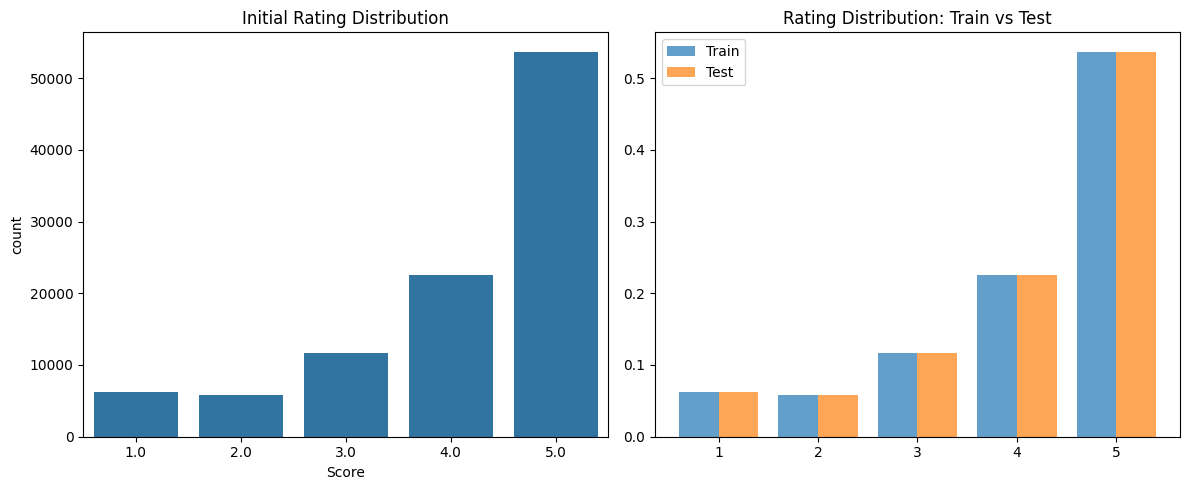


Training set size: 80000
Test set size: 20000

KL divergence between train and test distributions: 0.000000


In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
print("Loading data...")
df = pd.read_csv('train.csv')

# Filter out rows without scores
df = df[df['Score'].notna()].copy()

# Take a sample for development (comment out for full dataset)
sample_size = 100000  # Adjust as needed
df = df.sample(n=sample_size, random_state=42)

# Check initial distribution
print("\nInitial rating distribution:")
initial_dist = df['Score'].value_counts(normalize=True).sort_index()
print(initial_dist)

# Create plot for initial distribution
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='Score')
plt.title('Initial Rating Distribution')

# Split into train and test sets with stratification
train_df, test_df = train_test_split(
    df,
    test_size=0.2,
    random_state=42,
    stratify=df['Score']  # Stratify based on ratings
)

# Check distributions after split
print("\nTraining set distribution:")
train_dist = train_df['Score'].value_counts(normalize=True).sort_index()
print(train_dist)

print("\nTest set distribution:")
test_dist = test_df['Score'].value_counts(normalize=True).sort_index()
print(test_dist)

# Plot distribution after split
plt.subplot(1, 2, 2)
plt.hist([train_df['Score'], test_df['Score']],
         label=['Train', 'Test'],
         bins=np.arange(1, 7) - 0.5,
         density=True,
         alpha=0.7)
plt.title('Rating Distribution: Train vs Test')
plt.legend()
plt.tight_layout()
plt.show()

# Print sizes
print(f"\nTraining set size: {len(train_df)}")
print(f"Test set size: {len(test_df)}")

# Calculate and print KL divergence to measure distribution similarity
from scipy.stats import entropy
train_dist_array = train_dist.values
test_dist_array = test_dist.values
kl_div = entropy(train_dist_array, test_dist_array)
print(f"\nKL divergence between train and test distributions: {kl_div:.6f}")
# A KL divergence close to 0 indicates very similar distributions

## Making a User Bias Features

In [12]:
import pandas as pd
import numpy as np

# First, let's ensure we're using the same train/test split from step 1
df = pd.read_csv('train.csv')
df = df[df['Score'].notna()].copy()
df_sample = df.sample(n=10000, random_state=42)
train_df, test_df = train_test_split(df_sample, test_size=0.2, random_state=42, stratify=df_sample['Score'])

# Calculate user features using ONLY training data to avoid leakage
print("Calculating user features from training data...")

def calculate_user_features(train_data, test_data):
    """Calculate user bias and credibility scores using only training data"""

    # Calculate user bias from training data
    train_user_biases, train_bias_dict, global_avg = calculate_user_bias(train_data)

    # Calculate user credibility from training data
    train_user_stats = calculate_user_credibility(train_data)

    # Merge bias and credibility scores
    user_features = train_user_biases.reset_index().merge(
        train_user_stats[['UserId', 'CredibilityScore']],
        on='UserId',
        how='left'
    )

    # Create dictionaries for easy mapping
    bias_dict = user_features.set_index('UserId')['avg_bias'].to_dict()
    credibility_dict = user_features.set_index('UserId')['CredibilityScore'].to_dict()

    # Function to apply features to a dataframe
    def apply_user_features(df):
        df = df.copy()

        # Apply user bias (use 0 for unknown users)
        df['user_bias'] = df['UserId'].map(bias_dict).fillna(0)

        # Apply credibility score (use median for unknown users)
        median_credibility = user_features['CredibilityScore'].median()
        df['user_credibility'] = df['UserId'].map(credibility_dict).fillna(median_credibility)

        return df

    # Apply features to both train and test sets
    train_with_features = apply_user_features(train_data)
    test_with_features = apply_user_features(test_data)

    return train_with_features, test_with_features, global_avg

# Apply the features
train_with_features, test_with_features, global_avg = calculate_user_features(train_df, test_df)

# Print some statistics about the features
print("\nTraining set feature statistics:")
print("\nUser Bias statistics:")
print(train_with_features['user_bias'].describe())
print("\nUser Credibility statistics:")
print(train_with_features['user_credibility'].describe())

# Check coverage
print("\nFeature coverage in training set:")
print(f"Users with bias score: {(train_with_features['user_bias'] != 0).mean():.2%}")
print(f"Users with credibility score: {(train_with_features['user_credibility'].notna()).mean():.2%}")

print("\nFeature coverage in test set:")
print(f"Users with bias score: {(test_with_features['user_bias'] != 0).mean():.2%}")
print(f"Users with credibility score: {(test_with_features['user_credibility'].notna()).mean():.2%}")

# Visualize the distributions
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(data=train_with_features, x='user_bias', bins=50)
plt.title('Distribution of User Bias Scores')
plt.xlabel('Bias Score')

plt.subplot(1, 2, 2)
sns.histplot(data=train_with_features, x='user_credibility', bins=50)
plt.title('Distribution of User Credibility Scores')
plt.xlabel('Credibility Score')

plt.tight_layout()
plt.show()

# Check correlation with target
print("\nCorrelation with target (Score):")
print("User Bias:", train_with_features['user_bias'].corr(train_with_features['Score']))
print("User Credibility:", train_with_features['user_credibility'].corr(train_with_features['Score']))

Calculating user features from training data...


NameError: name 'calculate_user_bias' is not defined

checking user reviews and how they were classified

In [ ]:
# Calculate average rating for each movie from the full training set
movie_avg_ratings = train_with_features.groupby('ProductId')['Score'].agg(['mean', 'count']).round(2)
movie_avg_ratings.columns = ['movie_avg_rating', 'review_count']

# Get a few users with multiple reviews
user_review_counts = train_with_features['UserId'].value_counts()
users_with_multiple = user_review_counts[user_review_counts >= 3].index[:5]

print("Analysis of Users with Multiple Reviews:")
print("=" * 100)

for user_id in users_with_multiple:
    # Get user's reviews
    user_reviews = train_with_features[train_with_features['UserId'] == user_id]

    # Get user stats
    bias = user_reviews['user_bias'].iloc[0]
    credibility = user_reviews['user_credibility'].iloc[0]

    print(f"\nUser ID: {user_id}")
    print(f"Number of reviews: {len(user_reviews)}")
    print(f"Bias score: {bias:.3f}")
    print(f"Credibility score: {credibility:.3f}")
    print(f"Average rating given: {user_reviews['Score'].mean():.2f}")
    print("\nReviews:")
    print("-" * 100)

    for _, review in user_reviews.iterrows():
        # Get movie stats
        movie_stats = movie_avg_ratings.loc[review['ProductId']]
        movie_avg = movie_stats['movie_avg_rating']
        movie_count = movie_stats['review_count']

        # Calculate deviation from movie average
        deviation = review['Score'] - movie_avg

        print(f"Rating given: {review['Score']}/5 (Movie avg: {movie_avg:.2f} from {movie_count} reviews, Deviation: {deviation:+.2f})")
        print(f"Summary: {review['Summary']}")
        print(f"Helpful votes: {review['HelpfulnessNumerator']}/{review['HelpfulnessDenominator']}")
        print("-" * 100)

    print("=" * 100)

# Look at extreme cases with movie context
def analyze_extreme_users(df, column, n=5, ascending=False):
    extreme_users = df.nlargest(n, column) if not ascending else df.nsmallest(n, column)

    result = []
    for _, row in extreme_users.iterrows():
        user_reviews = df[df['UserId'] == row['UserId']]
        avg_deviation = 0
        reviewed_movies = []

        for _, review in user_reviews.iterrows():
            movie_avg = movie_avg_ratings.loc[review['ProductId'], 'movie_avg_rating']
            deviation = review['Score'] - movie_avg
            avg_deviation += deviation
            reviewed_movies.append({
                'movie_id': review['ProductId'],
                'user_rating': review['Score'],
                'movie_avg': movie_avg,
                'deviation': deviation
            })

        avg_deviation /= len(user_reviews)
        result.append({
            'UserId': row['UserId'],
            'bias_score': row['user_bias'],
            'credibility_score': row['user_credibility'],
            'num_reviews': len(user_reviews),
            'avg_deviation': avg_deviation,
            'reviewed_movies': reviewed_movies
        })
    return result

print("\nTop 5 Users with Highest Bias (Very Generous):")
high_bias_users = analyze_extreme_users(train_with_features, 'user_bias')
for user in high_bias_users:
    print(f"\nUser: {user['UserId']}")
    print(f"Bias score: {user['bias_score']:.3f}")
    print(f"Credibility score: {user['credibility_score']:.3f}")
    print(f"Number of reviews: {user['num_reviews']}")
    print(f"Average deviation from movie ratings: {user['avg_deviation']:.2f}")
    print("Sample reviews:")
    for movie in user['reviewed_movies'][:3]:  # Show first 3 movies
        print(f"  Movie {movie['movie_id']}: Rated {movie['user_rating']}/5 "
              f"(Movie avg: {movie['movie_avg']:.2f}, Deviation: {movie['deviation']:+.2f})")

print("\nTop 5 Users with Lowest Bias (Very Critical):")
low_bias_users = analyze_extreme_users(train_with_features, 'user_bias', ascending=True)
for user in low_bias_users:
    print(f"\nUser: {user['UserId']}")
    print(f"Bias score: {user['bias_score']:.3f}")
    print(f"Credibility score: {user['credibility_score']:.3f}")
    print(f"Number of reviews: {user['num_reviews']}")
    print(f"Average deviation from movie ratings: {user['avg_deviation']:.2f}")
    print("Sample reviews:")
    for movie in user['reviewed_movies'][:3]:  # Show first 3 movies
        print(f"  Movie {movie['movie_id']}: Rated {movie['user_rating']}/5 "
              f"(Movie avg: {movie['movie_avg']:.2f}, Deviation: {movie['deviation']:+.2f})")

print("\nTop 5 Users with Highest Credibility:")
high_cred_users = analyze_extreme_users(train_with_features, 'user_credibility')
for user in high_cred_users:
    print(f"\nUser: {user['UserId']}")
    print(f"Bias score: {user['bias_score']:.3f}")
    print(f"Credibility score: {user['credibility_score']:.3f}")
    print(f"Number of reviews: {user['num_reviews']}")
    print(f"Average deviation from movie ratings: {user['avg_deviation']:.2f}")
    print("Sample reviews:")
    for movie in user['reviewed_movies'][:3]:  # Show first 3 movies
        print(f"  Movie {movie['movie_id']}: Rated {movie['user_rating']}/5 "
              f"(Movie avg: {movie['movie_avg']:.2f}, Deviation: {movie['deviation']:+.2f})")

In [ ]:
# Calculate quartiles for credibility scores to group users
credibility_quartiles = train_with_features['user_credibility'].quantile([0.25, 0.5, 0.75])

# Create user groups based on credibility
train_with_features['credibility_group'] = pd.cut(
    train_with_features['user_credibility'],
    bins=[-float('inf'), credibility_quartiles[0.25], credibility_quartiles[0.75], float('inf')],
    labels=['Low Credibility', 'Medium Credibility', 'High Credibility']
)

# Merge movie average ratings with the main dataframe
analysis_df = train_with_features.merge(
    movie_avg_ratings,
    left_on='ProductId',
    right_index=True,
    how='left'
)

# Create scatter plots
plt.figure(figsize=(15, 5))

# Plot 1: All users
plt.subplot(1, 3, 1)
plt.scatter(analysis_df['movie_avg_rating'],
           analysis_df['Score'],
           alpha=0.1)
plt.plot([1, 5], [1, 5], 'r--')  # Perfect correlation line
plt.xlabel('Movie Average Rating')
plt.ylabel('User Rating')
plt.title('All Users\nRatings vs Movie Average')

# Plot 2: Credibility groups with different colors
plt.subplot(1, 3, 2)
for group in ['Low Credibility', 'Medium Credibility', 'High Credibility']:
    group_data = analysis_df[analysis_df['credibility_group'] == group]
    plt.scatter(group_data['movie_avg_rating'],
               group_data['Score'],
               alpha=0.2,
               label=group)
plt.plot([1, 5], [1, 5], 'r--')  # Perfect correlation line
plt.xlabel('Movie Average Rating')
plt.ylabel('User Rating')
plt.title('Ratings by Credibility Group')
plt.legend()

# Plot 3: Correlation by credibility score
plt.subplot(1, 3, 3)
scatter = plt.scatter(analysis_df['movie_avg_rating'],
                     analysis_df['Score'],
                     c=analysis_df['user_credibility'],
                     alpha=0.2,
                     cmap='viridis')
plt.colorbar(scatter, label='Credibility Score')
plt.plot([1, 5], [1, 5], 'r--')  # Perfect correlation line
plt.xlabel('Movie Average Rating')
plt.ylabel('User Rating')
plt.title('Ratings Colored by\nCredibility Score')

plt.tight_layout()
plt.show()

# Calculate correlations for different credibility groups
print("\nCorrelation between user ratings and movie averages:")
print("Overall correlation:",
      analysis_df['Score'].corr(analysis_df['movie_avg_rating']).round(3))

for group in ['Low Credibility', 'Medium Credibility', 'High Credibility']:
    group_data = analysis_df[analysis_df['credibility_group'] == group]
    correlation = group_data['Score'].corr(group_data['movie_avg_rating']).round(3)
    print(f"{group} correlation:", correlation)

# Calculate average absolute deviation from movie average
analysis_df['rating_deviation'] = abs(analysis_df['Score'] - analysis_df['movie_avg_rating'])

print("\nAverage absolute deviation from movie average:")
print("Overall average deviation:",
      analysis_df['rating_deviation'].mean().round(3))

for group in ['Low Credibility', 'Medium Credibility', 'High Credibility']:
    group_data = analysis_df[analysis_df['credibility_group'] == group]
    avg_deviation = group_data['rating_deviation'].mean().round(3)
    print(f"{group} average deviation:", avg_deviation)

# Additional analysis: Rating distribution by credibility group
plt.figure(figsize=(12, 5))

# Plot 1: Rating distributions
plt.subplot(1, 2, 1)
for group in ['Low Credibility', 'Medium Credibility', 'High Credibility']:
    group_data = analysis_df[analysis_df['credibility_group'] == group]
    sns.kdeplot(data=group_data['Score'], label=group)
plt.xlabel('Rating')
plt.ylabel('Density')
plt.title('Rating Distribution by Credibility Group')
plt.legend()

# Plot 2: Deviation distributions
plt.subplot(1, 2, 2)
for group in ['Low Credibility', 'Medium Credibility', 'High Credibility']:
    group_data = analysis_df[analysis_df['credibility_group'] == group]
    sns.kdeplot(data=group_data['rating_deviation'], label=group)
plt.xlabel('Absolute Deviation from Movie Average')
plt.ylabel('Density')
plt.title('Rating Deviation Distribution by Credibility Group')
plt.legend()

plt.tight_layout()
plt.show()

we can see that there is a some relationship between credibility score and average movie rating. for user to be given a high credibility score a lot of people must mark it as positive. Average movie raitng should coincide what people felt like a movie and thus critics would be rated accordingly.

In [ ]:
# Let's first look at the distribution of bias values
print("User bias statistics:")
print(train_with_features['user_bias'].describe())

# Create bias groups using fixed thresholds instead of quartiles
train_with_features['bias_group'] = pd.cut(
    train_with_features['user_bias'],
    bins=[-float('inf'), -0.5, 0.5, float('inf')],
    labels=['Negative Bias', 'Neutral', 'Positive Bias']
)

# Print group sizes
print("\nBias group sizes:")
print(train_with_features['bias_group'].value_counts())

# Merge with movie averages
analysis_df = train_with_features.merge(
    movie_avg_ratings,
    left_on='ProductId',
    right_index=True,
    how='left'
)

# Create visualization
plt.figure(figsize=(15, 5))

# Plot 1: All users with bias color gradient
plt.subplot(1, 3, 1)
scatter = plt.scatter(analysis_df['movie_avg_rating'],
                     analysis_df['Score'],
                     c=analysis_df['user_bias'],
                     alpha=0.2,
                     cmap='RdYlBu')
plt.colorbar(scatter, label='User Bias')
plt.plot([1, 5], [1, 5], 'k--', alpha=0.5)
plt.xlabel('Movie Average Rating')
plt.ylabel('User Rating')
plt.title('Ratings Colored by User Bias')

# Plot 2: Bias groups
plt.subplot(1, 3, 2)
for group in ['Negative Bias', 'Neutral', 'Positive Bias']:
    group_data = analysis_df[analysis_df['bias_group'] == group]
    plt.scatter(group_data['movie_avg_rating'],
               group_data['Score'],
               alpha=0.2,
               label=group)
plt.plot([1, 5], [1, 5], 'k--', alpha=0.5)
plt.xlabel('Movie Average Rating')
plt.ylabel('User Rating')
plt.title('Ratings by Bias Group')
plt.legend()

# Plot 3: Average deviation by bias
plt.subplot(1, 3, 3)
analysis_df['rating_deviation'] = analysis_df['Score'] - analysis_df['movie_avg_rating']
plt.scatter(analysis_df['user_bias'],
           analysis_df['rating_deviation'],
           alpha=0.2)
plt.axhline(y=0, color='k', linestyle='--', alpha=0.5)
plt.xlabel('User Bias')
plt.ylabel('Deviation from Movie Average')
plt.title('User Bias vs Rating Deviation')

plt.tight_layout()
plt.show()

# Calculate statistics
print("\nCorrelation Statistics:")
print("Correlation between user bias and movie average ratings:",
      analysis_df['user_bias'].corr(analysis_df['movie_avg_rating']).round(3))
print("Correlation between user bias and rating deviation:",
      analysis_df['user_bias'].corr(analysis_df['rating_deviation']).round(3))

# Analysis by bias group
print("\nAnalysis by Bias Group:")
for group in ['Negative Bias', 'Neutral', 'Positive Bias']:
    group_data = analysis_df[analysis_df['bias_group'] == group]
    avg_deviation = group_data['rating_deviation'].mean()
    std_deviation = group_data['rating_deviation'].std()
    print(f"\n{group}:")
    print(f"Average deviation from movie rating: {avg_deviation:.3f}")
    print(f"Standard deviation: {std_deviation:.3f}")
    print(f"Number of reviews: {len(group_data)}")

# Distribution plots
plt.figure(figsize=(12, 5))

# Plot 1: Rating distributions by bias group
plt.subplot(1, 2, 1)
for group in ['Negative Bias', 'Neutral', 'Positive Bias']:
    group_data = analysis_df[analysis_df['bias_group'] == group]
    sns.kdeplot(data=group_data['Score'], label=group)
plt.xlabel('Rating')
plt.ylabel('Density')
plt.title('Rating Distribution by Bias Group')
plt.legend()

# Plot 2: Deviation distribution by bias group
plt.subplot(1, 2, 2)
for group in ['Negative Bias', 'Neutral', 'Positive Bias']:
    group_data = analysis_df[analysis_df['bias_group'] == group]
    sns.kdeplot(data=group_data['rating_deviation'], label=group)
plt.xlabel('Deviation from Movie Average')
plt.ylabel('Density')
plt.title('Rating Deviation Distribution by Bias Group')
plt.legend()

plt.tight_layout()
plt.show()

also was interesting to see how each group of reviewers compared on average mvie raitng . I think this corroleation is stronger. so features fingers crossed should help our model.

## Review Text Analysis

In [71]:
# Prepare text data
train_with_features['CombinedText'] = train_with_features['Summary'].fillna('') + ' ' + train_with_features['Text'].fillna('')
test_with_features['CombinedText'] = test_with_features['Summary'].fillna('') + ' ' + test_with_features['Text'].fillna('')

# Create vectorizers
print("Creating vectorizers...")
regular_tfidf = TfidfVectorizer(
    max_features=7500,
    min_df=5,
    max_df=0.95,
    strip_accents='unicode',
    lowercase=True,
    stop_words='english'
)

adjective_vectorizer = AdjectiveWeightedVectorizer(adjective_boost=2.0)

# Fit and transform
print("Fitting vectorizers...")
regular_features = regular_tfidf.fit_transform(train_with_features['CombinedText'])
adjective_features = adjective_vectorizer.fit_transform(train_with_features['CombinedText'])

# Compare a few example documents
def show_document_features(doc_idx, top_n=10):
    print(f"\nDocument {doc_idx}:")
    print("Original text:")
    print(train_with_features['CombinedText'].iloc[doc_idx][:200], "...\n")

    # Get scores from both vectorizers
    reg_scores = regular_features[doc_idx].toarray()[0]
    adj_scores = adjective_features[doc_idx].toarray()[0]

    # Get feature names
    reg_words = regular_tfidf.get_feature_names_out()
    adj_words = adjective_vectorizer.get_feature_names_out()

    # Get top terms for regular TF-IDF
    reg_top = sorted(zip(reg_words, reg_scores), key=lambda x: x[1], reverse=True)[:top_n]

    # Get top terms for adjective-weighted TF-IDF
    adj_top = sorted(zip(adj_words, adj_scores), key=lambda x: x[1], reverse=True)[:top_n]

    print(f"{'Regular TF-IDF':30} | {'Adjective-Weighted TF-IDF'}")
    print("-" * 60)
    for (reg_word, reg_score), (adj_word, adj_score) in zip(reg_top, adj_top):
        pos_tag = adjective_vectorizer.vocab_pos_tags.get(adj_word, 'Unknown')
        is_adj = adjective_vectorizer.is_adjective(pos_tag)
        print(f"{reg_word:20} {reg_score:.4f} | {adj_word:20} {adj_score:.4f} {'(ADJ)' if is_adj else ''}")

# Show examples
print("\nComparing regular vs adjective-weighted TF-IDF for 3 documents:")
for i in range(3):
    show_document_features(i)

# Show overall adjective statistics
adj_words = adjective_vectorizer.get_feature_names_out()
adj_count = sum(1 for word in adj_words
               if word in adjective_vectorizer.vocab_pos_tags
               and adjective_vectorizer.is_adjective(adjective_vectorizer.vocab_pos_tags[word]))

print(f"\nTotal features: {len(adj_words)}")
print(f"Adjective features: {adj_count}")
print(f"Percentage adjectives: {(adj_count/len(adj_words))*100:.2f}%")

# Show top adjectives
print("\nTop 20 adjectives by total importance across documents:")
feature_sums = adjective_features.sum(axis=0).A1
adj_scores = [(word, score) for word, score in zip(adj_words, feature_sums)
              if word in adjective_vectorizer.vocab_pos_tags
              and adjective_vectorizer.is_adjective(adjective_vectorizer.vocab_pos_tags[word])]

for word, score in sorted(adj_scores, key=lambda x: x[1], reverse=True)[:20]:
    print(f"{word:20} {score:.4f}")

Creating vectorizers...
Fitting vectorizers...

Comparing regular vs adjective-weighted TF-IDF for 3 documents:

Document 0:
Original text:
I love the Twlight Series! This is one of my favorite of the series! I have the whole set!I highly recommend this Part-2 DVD if you enjoy the TwilightSagas.Series. AAAA+++++++++ ...

Regular TF-IDF                 | Adjective-Weighted TF-IDF
------------------------------------------------------------
series               0.7175 | series               0.7175 
highly               0.3066 | favorite             0.5730 (ADJ)
favorite             0.2865 | highly               0.3066 
recommend            0.2828 | recommend            0.2828 
enjoy                0.2763 | enjoy                0.2763 
set                  0.2664 | set                  0.2664 
dvd                  0.2063 | dvd                  0.2063 
love                 0.1983 | love                 0.1983 
00                   0.0000 | 00                   0.0000 
000                  

## Putting Data Together

created a feature and target matrix

Creating feature matrix...

1. Creating text features...
Text features shape: (8000, 7500)

2. Creating numerical features...

3. Combining features...

Final feature matrix shapes:
X_train: (8000, 7507)
X_test: (2000, 7507)
y_train: (8000,)
y_test: (2000,)

Feature groups:
Text features: 7500
Numerical features: 7

Numerical features list:
- helpfulness_numerator
- helpfulness_denominator
- helpfulness_ratio
- review_length
- summary_length
- user_bias
- user_credibility

Numerical features statistics (before scaling):
       helpfulness_numerator  helpfulness_denominator  helpfulness_ratio  \
count            8000.000000              8000.000000        8000.000000   
mean                3.346875                 5.122125           0.396898   
std                12.113614                14.678629           0.420699   
min                 0.000000                 0.000000           0.000000   
25%                 0.000000                 0.000000           0.000000   
50%               

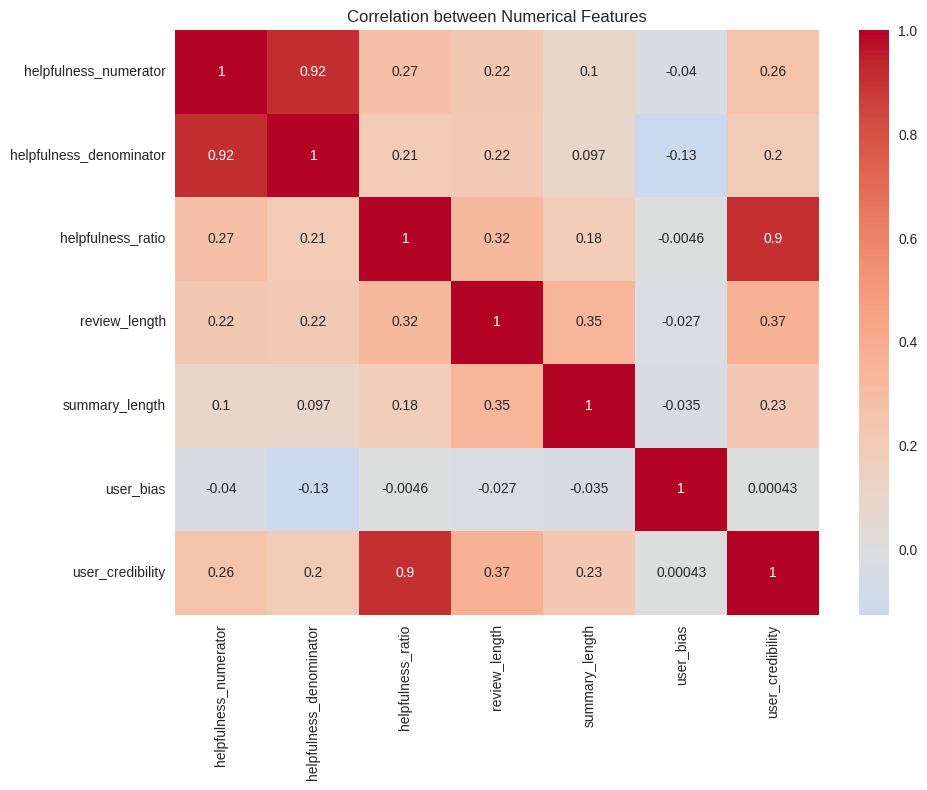

In [72]:
from sklearn.preprocessing import StandardScaler
from scipy.sparse import csr_matrix, hstack

# Let's create features step by step
print("Creating feature matrix...")

# 1. Text Features - using our adjective weighted vectorizer
print("\n1. Creating text features...")
train_with_features['CombinedText'] = train_with_features['Summary'].fillna('') + ' ' + train_with_features['Text'].fillna('')
test_with_features['CombinedText'] = test_with_features['Summary'].fillna('') + ' ' + test_with_features['Text'].fillna('')

adjective_vectorizer = AdjectiveWeightedVectorizer(adjective_boost=2.0)
train_text_features = adjective_vectorizer.fit_transform(train_with_features['CombinedText'])
test_text_features = adjective_vectorizer.transform(test_with_features['CombinedText'])

print(f"Text features shape: {train_text_features.shape}")

# 2. Create other numerical features
print("\n2. Creating numerical features...")

def create_numerical_features(df):
    features = pd.DataFrame()

    # Helpfulness features
    features['helpfulness_numerator'] = df['HelpfulnessNumerator'].fillna(0)
    features['helpfulness_denominator'] = df['HelpfulnessDenominator'].fillna(0)
    features['helpfulness_ratio'] = features['helpfulness_numerator'] / \
                                   features['helpfulness_denominator'].replace(0, 1)

    # Text length features
    features['review_length'] = df['Text'].fillna('').str.len()
    features['summary_length'] = df['Summary'].fillna('').str.len()

    # User features
    features['user_bias'] = df['user_bias']
    features['user_credibility'] = df['user_credibility']

    return features

# Create features for both train and test
train_numerical = create_numerical_features(train_with_features)
test_numerical = create_numerical_features(test_with_features)

# Scale numerical features
scaler = StandardScaler()
train_numerical_scaled = scaler.fit_transform(train_numerical)
test_numerical_scaled = scaler.transform(test_numerical)

# 3. Combine all features
print("\n3. Combining features...")
train_numerical_sparse = csr_matrix(train_numerical_scaled)
test_numerical_sparse = csr_matrix(test_numerical_scaled)

X_train = hstack([train_text_features, train_numerical_sparse])
X_test = hstack([test_text_features, test_numerical_sparse])

# Get target variable
y_train = train_with_features['Score']
y_test = test_with_features['Score']

# Print information about the final matrices
print("\nFinal feature matrix shapes:")
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

# Create feature names for later use
text_feature_names = adjective_vectorizer.get_feature_names_out()
numerical_feature_names = train_numerical.columns.tolist()
all_feature_names = list(text_feature_names) + numerical_feature_names

print("\nFeature groups:")
print(f"Text features: {len(text_feature_names)}")
print(f"Numerical features: {len(numerical_feature_names)}")
print("\nNumerical features list:")
for feature in numerical_feature_names:
    print(f"- {feature}")

# Print basic statistics of numerical features
print("\nNumerical features statistics (before scaling):")
print(train_numerical.describe())

# Visualize correlations between numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(train_numerical.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation between Numerical Features')
plt.tight_layout()
plt.show()

In [76]:

def print_matrix_overview(X_train, X_test, y_train, y_test, adjective_vectorizer, n_examples=5):
    """
    Prints a comprehensive overview of feature matrices and target variables
    """
    # Get feature names
    text_features = adjective_vectorizer.get_feature_names_out()
    numerical_features = ['helpfulness_numerator', 'helpfulness_denominator',
                         'helpfulness_ratio', 'review_length', 'summary_length',
                         'user_bias', 'user_credibility']
    all_features = list(text_features) + numerical_features

    print("=" * 80)
    print("FEATURE MATRIX OVERVIEW")
    print("=" * 80)

    # Matrix shapes
    print("\nMatrix Shapes:")
    print(f"X_train: {X_train.shape} ({type(X_train)})")
    print(f"X_test: {X_test.shape}")
    print(f"y_train: {y_train.shape}")
    print(f"y_test: {y_test.shape}")

    # Feature breakdown
    print(f"\nTotal features: {len(all_features)}")
    print(f"Text features: {len(text_features)}")
    print(f"Numerical features: {len(numerical_features)}")

    # Show example rows
    print("\nExample rows from feature matrix:")
    print("-" * 80)

    # Convert first n_examples to dense for display
    X_sample = X_train[:n_examples].toarray()

    # Print header
    print(f"{'Index':6} | {'Text Features':40} | {'Numerical Features':30} | {'Rating'}")
    print("-" * 80)

    for idx in range(n_examples):
        # Get non-zero text features
        text_indices = X_train[idx, :len(text_features)].nonzero()[1]
        top_text_features = sorted(
            [(text_features[i], X_train[idx, i]) for i in text_indices],
            key=lambda x: x[1],
            reverse=True
        )[:3]  # Show top 3 text features

        text_str = ", ".join([f"{word}({score:.2f})"
                             for word, score in top_text_features])

        # Get numerical features
        numerical_values = X_sample[idx, -len(numerical_features):]
        numerical_str = ", ".join([f"{name}({val:.2f})"
                                 for name, val in zip(numerical_features, numerical_values)])

        print(f"{idx:6} | {text_str:40} | {numerical_str:30} | {y_train.iloc[idx]}")

    # Show target distribution
    print("\nTarget (y) Distribution:")
    y_dist = pd.DataFrame({
        'Count': y_train.value_counts().sort_index(),
        'Percentage': (y_train.value_counts().sort_index() / len(y_train) * 100)
    })
    print(y_dist)

    # Matrix sparsity
    sparsity = 100.0 * X_train.nnz / (X_train.shape[0] * X_train.shape[1])
    print(f"\nMatrix sparsity: {sparsity:.2f}% non-zero elements")

    # Memory usage
    def get_size_mb(X):
        if isinstance(X, csr_matrix):
            return (X.data.nbytes + X.indptr.nbytes + X.indices.nbytes) / (1024 * 1024)
        elif isinstance(X, pd.Series):
            return X.memory_usage(deep=True) / (1024 * 1024)
        else:
            return 0  # Default case

    print(f"\nMemory usage:")
    print(f"X_train: {get_size_mb(X_train):.2f} MB")
    print(f"y_train: {get_size_mb(y_train):.2f} MB")


print_matrix_overview(X_train, X_test, y_train, y_test, adjective_vectorizer)


FEATURE MATRIX OVERVIEW

Matrix Shapes:
X_train: (8000, 7507) (<class 'scipy.sparse._csr.csr_matrix'>)
X_test: (2000, 7507)
y_train: (8000,)
y_test: (2000,)

Total features: 7507
Text features: 7500
Numerical features: 7

Example rows from feature matrix:
--------------------------------------------------------------------------------
Index  | Text Features                            | Numerical Features             | Rating
--------------------------------------------------------------------------------
     0 | series(0.72), favorite(0.57), highly(0.31) | helpfulness_numerator(-0.19), helpfulness_denominator(-0.21), helpfulness_ratio(0.25), review_length(-0.66), summary_length(-0.09), user_bias(0.39), user_credibility(0.13) | 5.0
     1 | original(0.79), sweet(0.38), better(0.32) | helpfulness_numerator(-0.19), helpfulness_denominator(-0.14), helpfulness_ratio(-0.15), review_length(0.29), summary_length(-0.20), user_bias(0.00), user_credibility(-0.26) | 4.0
     2 | earlier(0.62), ho

## making a model


Training GradientBoosting...

Results for GradientBoosting:
Train RMSE: 0.6604
Test RMSE: 0.9280
Train MAE: 0.5191
Test MAE: 0.7112
5-fold CV RMSE: 0.8393 (+/- 0.0183)


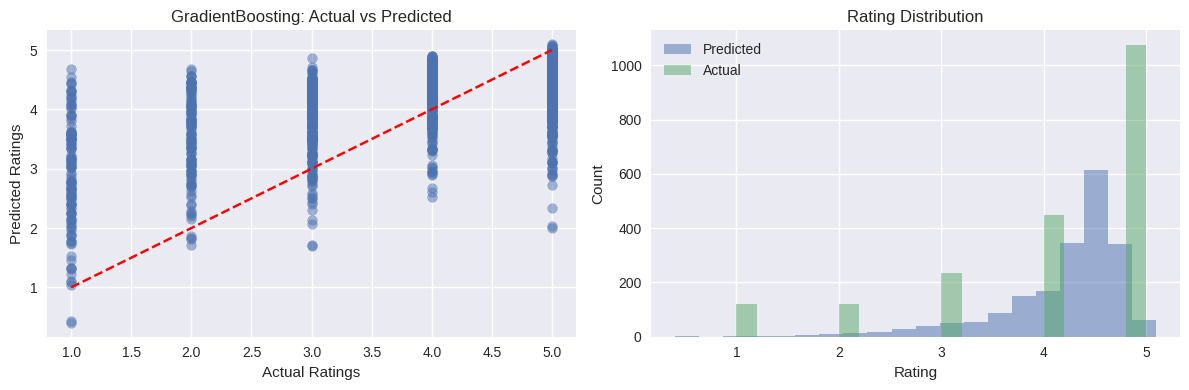


Top 20 most important text features:
  feature  importance
    waste    0.037598
    great    0.028593
      bad    0.027198
   boring    0.025867
    worst    0.021005
 terrible    0.016543
     poor    0.012243
  minutes    0.007556
excellent    0.007460
       ok    0.007364
     love    0.006489
     mess    0.006180
 horrible    0.006121
   stupid    0.005016
     best    0.004631
    awful    0.004424
     dumb    0.004395
     plot    0.004387
wonderful    0.003603
     didn    0.003414

Numerical feature importance:
                feature  importance
              user_bias    0.313917
helpfulness_denominator    0.094759
      helpfulness_ratio    0.088684
          review_length    0.006859
         summary_length    0.003040
       user_credibility    0.001236
  helpfulness_numerator    0.000595


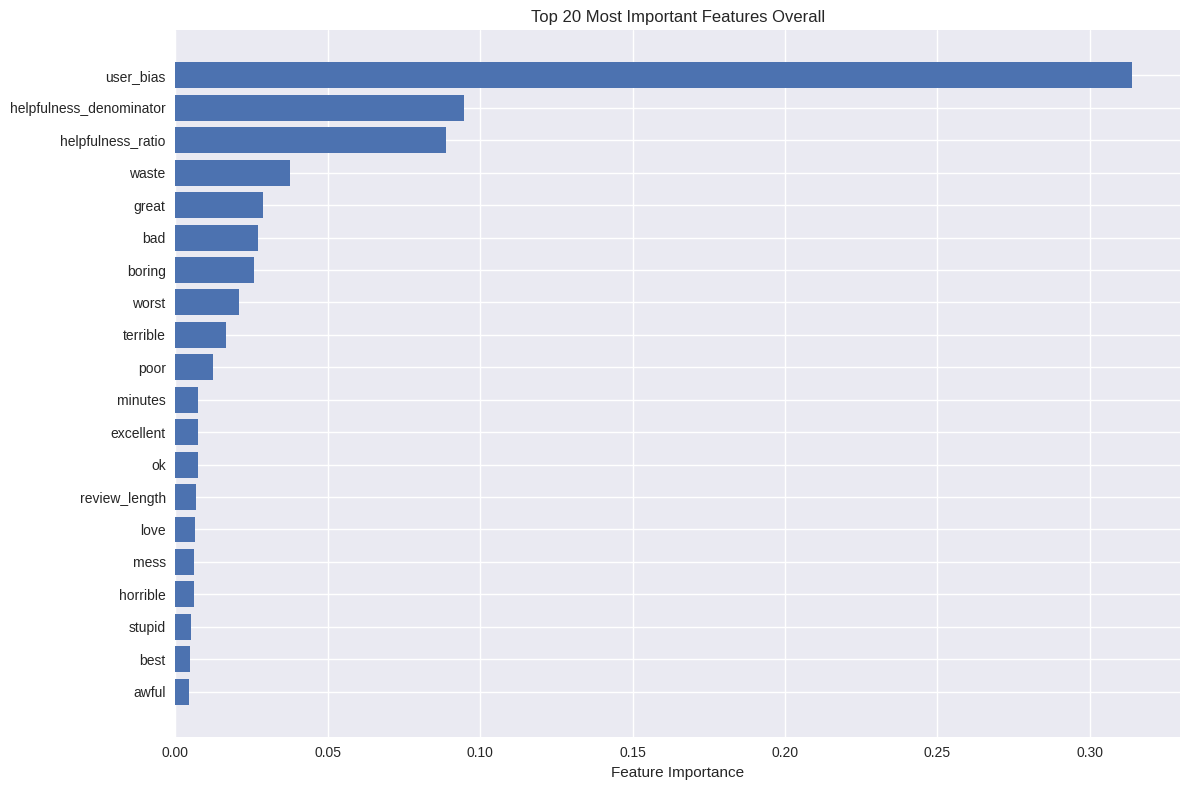


Training RandomForest...

Results for RandomForest:
Train RMSE: 0.6601
Test RMSE: 0.9878
Train MAE: 0.5214
Test MAE: 0.7497
5-fold CV RMSE: 0.8712 (+/- 0.0147)


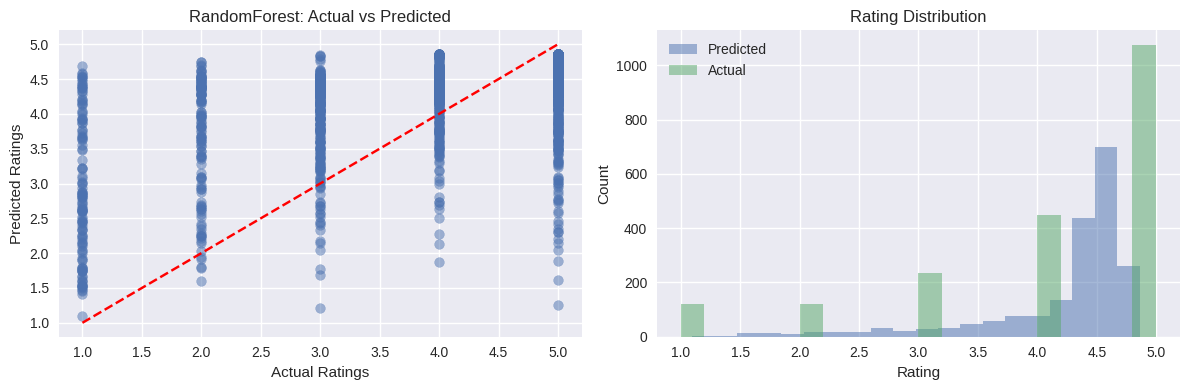


Top 20 most important text features:
 feature  importance
   waste    0.039228
     bad    0.024725
   great    0.022977
   worst    0.013953
  boring    0.013885
    poor    0.009586
      ok    0.008503
terrible    0.007693
 minutes    0.005297
    good    0.004753
    just    0.004574
    love    0.004250
horrible    0.004197
    didn    0.004180
   movie    0.003941
  stupid    0.003826
     dvd    0.003771
annoying    0.003497
  acting    0.003248
    film    0.003146

Numerical feature importance:
                feature  importance
              user_bias    0.314940
helpfulness_denominator    0.107413
      helpfulness_ratio    0.094746
          review_length    0.007804
         summary_length    0.007083
       user_credibility    0.005109
  helpfulness_numerator    0.001768


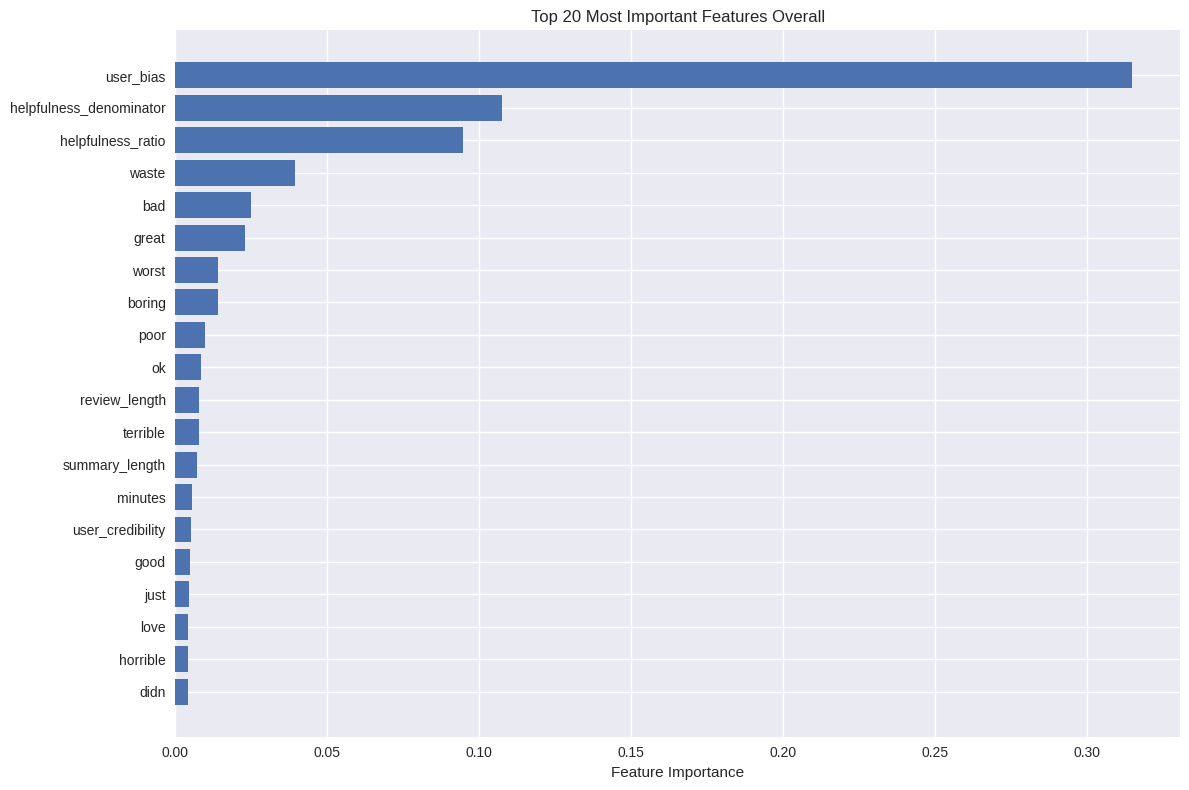


Training Ridge...

Results for Ridge:
Train RMSE: 0.5582
Test RMSE: 1.0047
Train MAE: 0.4280
Test MAE: 0.6914
5-fold CV RMSE: 0.8427 (+/- 0.0188)


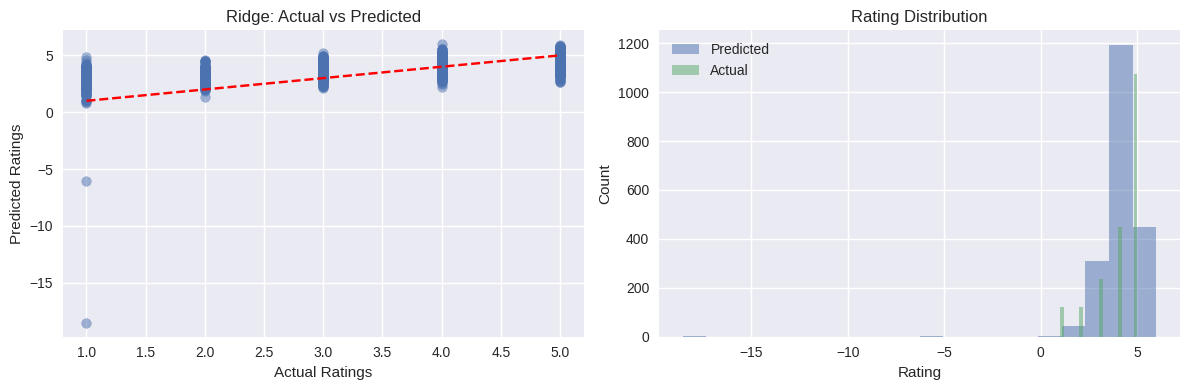

This model doesn't support feature importance analysis

Model Performance Comparison:
           Model  Train RMSE  Test RMSE  CV RMSE
GradientBoosting    0.660446   0.927998 0.839295
    RandomForest    0.660125   0.987771 0.871157
           Ridge    0.558201   1.004736 0.842739


In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error

def plot_feature_importance(importances, feature_names, title, top_n=20):
    """
    Create a horizontal bar plot of feature importances
    """
    plt.figure(figsize=(12, 8))
    top_indices = np.argsort(importances)[-top_n:]
    top_importances = importances[top_indices]
    top_features = feature_names[top_indices]

    plt.barh(range(len(top_importances)), top_importances)
    plt.yticks(range(len(top_importances)), top_features)
    plt.xlabel('Feature Importance')
    plt.title(title)
    plt.tight_layout()
    plt.show()

def analyze_feature_importance(model, feature_names, top_n=20):
    """
    Analyze and visualize feature importance
    """
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        feature_importance_df = pd.DataFrame({
            'feature': feature_names,
            'importance': importances
        }).sort_values('importance', ascending=False)

        # Separate numerical and text features
        numerical_features = ['helpfulness_numerator', 'helpfulness_denominator',
                            'helpfulness_ratio', 'review_length', 'summary_length',
                            'user_bias', 'user_credibility']

        text_features = feature_importance_df[~feature_importance_df['feature'].isin(numerical_features)]
        num_features = feature_importance_df[feature_importance_df['feature'].isin(numerical_features)]

        print("\nTop {} most important text features:".format(min(top_n, len(text_features))))
        print(text_features.head(top_n).to_string(index=False))

        print("\nNumerical feature importance:")
        print(num_features.to_string(index=False))

        # Plot overall feature importance
        plot_feature_importance(importances, feature_names,
                              f'Top {top_n} Most Important Features Overall')

        return feature_importance_df
    else:
        print("This model doesn't support feature importance analysis")
        return None

def evaluate_model(model, X_train, X_test, y_train, y_test, feature_names, model_name):
    """
    Train and evaluate a model with detailed analysis
    """
    # Fit the model
    print(f"\nTraining {model_name}...")
    model.fit(X_train, y_train)

    # Make predictions
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    # Calculate metrics
    train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))
    train_mae = mean_absolute_error(y_train, train_pred)
    test_mae = mean_absolute_error(y_test, test_pred)

    # Cross-validation
    cv_scores = cross_val_score(model, X_train, y_train,
                              cv=5, scoring='neg_root_mean_squared_error')
    cv_rmse = -cv_scores.mean()
    cv_std = cv_scores.std()

    print(f"\nResults for {model_name}:")
    print(f"Train RMSE: {train_rmse:.4f}")
    print(f"Test RMSE: {test_rmse:.4f}")
    print(f"Train MAE: {train_mae:.4f}")
    print(f"Test MAE: {test_mae:.4f}")
    print(f"5-fold CV RMSE: {cv_rmse:.4f} (+/- {cv_std:.4f})")

    # Analyze prediction distribution
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.scatter(y_test, test_pred, alpha=0.5)
    plt.plot([1, 5], [1, 5], 'r--')
    plt.xlabel('Actual Ratings')
    plt.ylabel('Predicted Ratings')
    plt.title(f'{model_name}: Actual vs Predicted')

    plt.subplot(1, 2, 2)
    plt.hist(test_pred, bins=20, alpha=0.5, label='Predicted')
    plt.hist(y_test, bins=20, alpha=0.5, label='Actual')
    plt.xlabel('Rating')
    plt.ylabel('Count')
    plt.title('Rating Distribution')
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Feature importance analysis
    importance_df = analyze_feature_importance(model, feature_names)

    return {
        'model': model,
        'train_rmse': train_rmse,
        'test_rmse': test_rmse,
        'cv_rmse': cv_rmse,
        'importance_df': importance_df
    }

def train_and_evaluate_models(X_train, X_test, y_train, y_test, feature_names):
    """
    Train and evaluate multiple models
    """
    models = {
        'GradientBoosting': GradientBoostingRegressor(
            n_estimators=100,
            max_depth=5,
            learning_rate=0.1,
            min_samples_split=5,
            min_samples_leaf=2,
            random_state=42
        ),
        'RandomForest': RandomForestRegressor(
            n_estimators=100,
            max_depth=15,
            min_samples_split=5,
            min_samples_leaf=2,
            n_jobs=-1,
            random_state=42
        ),
        'Ridge': Ridge(alpha=1.0)
    }

    results = {}
    for name, model in models.items():
        results[name] = evaluate_model(model, X_train, X_test, y_train, y_test,
                                     feature_names, name)

    # Compare model performances
    performance_comparison = pd.DataFrame({
        'Model': list(results.keys()),
        'Train RMSE': [res['train_rmse'] for res in results.values()],
        'Test RMSE': [res['test_rmse'] for res in results.values()],
        'CV RMSE': [res['cv_rmse'] for res in results.values()]
    })

    print("\nModel Performance Comparison:")
    print(performance_comparison.to_string(index=False))

    return results

# Run the analysis
results = train_and_evaluate_models(X_train, X_test, y_train, y_test, feature_names)


Analysis for GradientBoosting:

Prediction Distribution:
Rating  Predicted Count  Actual Count  Difference
--------------------------------------------------
  1           10            120         -110   
  2           48            122         -74    
  3          190            235         -45    
  4          1030           448         582    
  5          722            1075        -353   

Error Analysis:
Rating  Correct  Incorrect  Accuracy  Most Common Error
-----------------------------------------------------------------
  1       10       110       8.33   % 3 (38.3%)
  2       11       111       9.02   % 4 (50.8%)
  3       54       181       22.98  % 4 (68.5%)
  4      295       153       65.85  % 5 (29.5%)
  5      570       505       53.02  % 4 (44.4%)


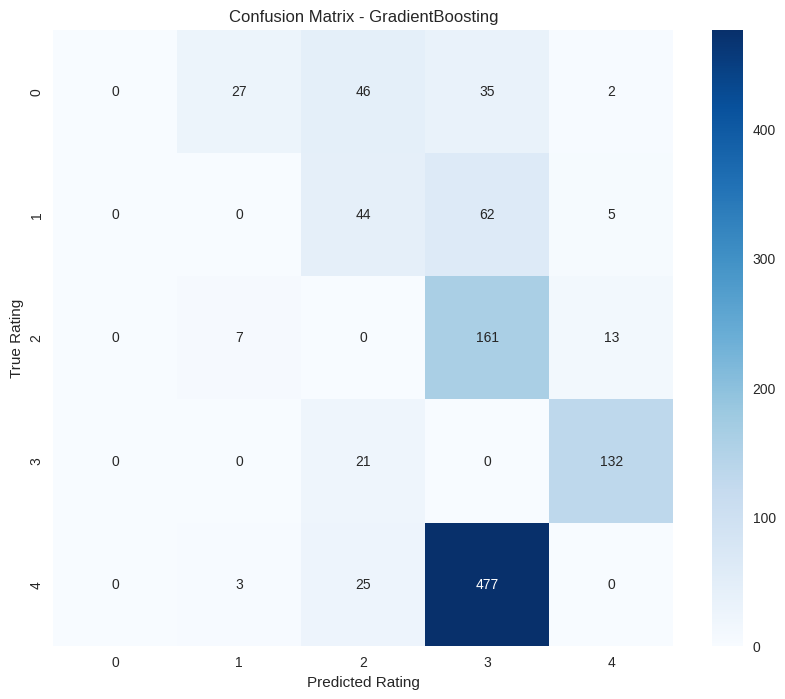


Error Magnitude Distribution:
Off by 0 stars: 47.00%
Off by 1 star:  43.45%
Off by 2 stars: 7.30%
Off by 3 stars: 2.15%
Off by 4 stars: 0.10%

Analysis for RandomForest:

Prediction Distribution:
Rating  Predicted Count  Actual Count  Difference
--------------------------------------------------
  1           6             120         -114   
  2           80            122         -42    
  3          156            235         -79    
  4          921            448         473    
  5          837            1075        -238   

Error Analysis:
Rating  Correct  Incorrect  Accuracy  Most Common Error
-----------------------------------------------------------------
  1       4        116       3.33   % 2 (35.0%)
  2       16       106       13.11  % 4 (50.8%)
  3       43       192       18.30  % 4 (62.6%)
  4      264       184       58.93  % 5 (35.7%)
  5      618       457       57.49  % 4 (38.5%)


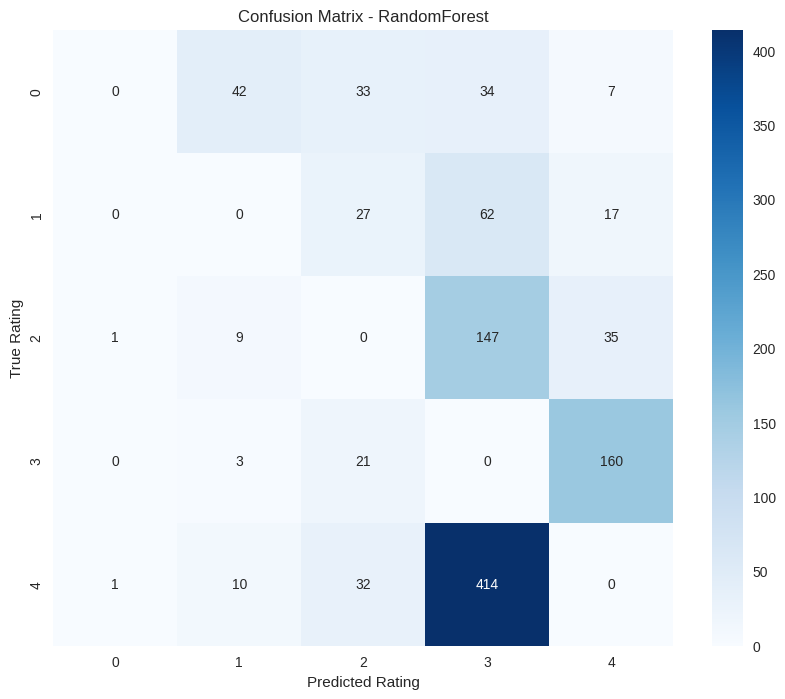


Error Magnitude Distribution:
Off by 0 stars: 47.25%
Off by 1 star:  41.00%
Off by 2 stars: 8.30%
Off by 3 stars: 3.05%
Off by 4 stars: 0.40%

Analysis for Ridge:

Prediction Distribution:
Rating  Predicted Count  Actual Count  Difference
--------------------------------------------------
  1           10            120         -110   
  2           62            122         -60    
  3          273            235          38    
  4          931            448         483    
  5          724            1075        -351   

Error Analysis:
Rating  Correct  Incorrect  Accuracy  Most Common Error
-----------------------------------------------------------------
  1       9        111       7.50   % 3 (34.2%)
  2       22       100       18.03  % 3 (51.6%)
  3       96       139       40.85  % 4 (49.8%)
  4      269       179       60.04  % 5 (29.2%)
  5      572       503       53.21  % 4 (44.3%)


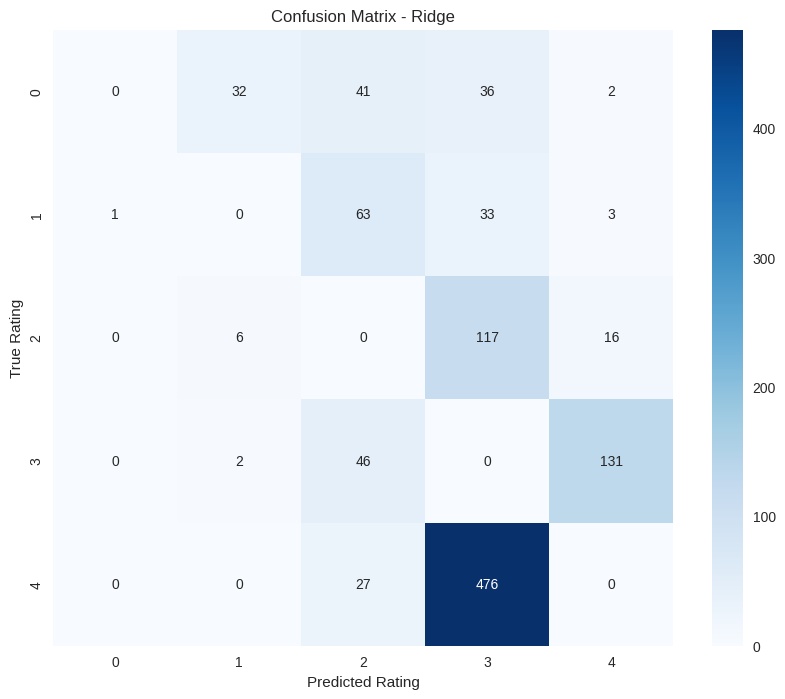


Error Magnitude Distribution:
Off by 0 stars: 48.40%
Off by 1 star:  43.60%
Off by 2 stars: 5.95%
Off by 3 stars: 1.95%
Off by 4 stars: 0.10%


In [82]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def analyze_predictions(y_true, y_pred, model_name):
    """
    Analyze predictions including distribution and errors
    """
    # Round predictions to nearest rating
    y_pred_rounded = np.round(y_pred)
    # Clip predictions to be between 1 and 5
    y_pred_rounded = np.clip(y_pred_rounded, 1, 5)

    # Calculate distribution of predictions
    pred_dist = pd.Series(y_pred_rounded).value_counts().sort_index()
    true_dist = pd.Series(y_true).value_counts().sort_index()

    print(f"\nAnalysis for {model_name}:")
    print("\nPrediction Distribution:")
    print("Rating  Predicted Count  Actual Count  Difference")
    print("-" * 50)
    for rating in range(1, 6):
        pred_count = pred_dist.get(rating, 0)
        true_count = true_dist.get(rating, 0)
        diff = pred_count - true_count
        print(f"{rating:^6d} {pred_count:^16d} {true_count:^12d} {diff:^10d}")

    # Create confusion matrix
    conf_matrix = confusion_matrix(y_true, y_pred_rounded)

    # Calculate error rates
    print("\nError Analysis:")
    print("Rating  Correct  Incorrect  Accuracy  Most Common Error")
    print("-" * 65)
    for i in range(5):
        true_rating = i + 1
        correct = conf_matrix[i, i]
        total = np.sum(conf_matrix[i, :])
        if total > 0:
            accuracy = correct / total * 100
            errors = conf_matrix[i, :]
            errors[i] = 0  # Exclude correct predictions
            if np.sum(errors) > 0:
                most_common_error = np.argmax(errors) + 1
                error_count = np.max(errors)
                error_rate = error_count / total * 100
            else:
                most_common_error = "-"
                error_rate = 0
        else:
            accuracy = 0
            most_common_error = "-"
            error_rate = 0

        print(f"{true_rating:^6d} {correct:^8d} {total-correct:^10d} {accuracy:^9.2f}% {most_common_error} ({error_rate:.1f}%)")

    # Plot confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted Rating')
    plt.ylabel('True Rating')
    plt.show()

    # Calculate degree of errors
    errors = np.abs(y_true - y_pred_rounded)
    print("\nError Magnitude Distribution:")
    print(f"Off by 0 stars: {np.mean(errors == 0)*100:.2f}%")
    print(f"Off by 1 star:  {np.mean(errors == 1)*100:.2f}%")
    print(f"Off by 2 stars: {np.mean(errors == 2)*100:.2f}%")
    print(f"Off by 3 stars: {np.mean(errors == 3)*100:.2f}%")
    print(f"Off by 4 stars: {np.mean(errors == 4)*100:.2f}%")

    return {
        'confusion_matrix': conf_matrix,
        'error_distribution': errors
    }

# Analyze each model
models = {
    'GradientBoosting': results['GradientBoosting']['model'],
    'RandomForest': results['RandomForest']['model'],
    'Ridge': results['Ridge']['model']
}

for name, model in models.items():
    # Get predictions
    y_pred = model.predict(X_test)
    analysis = analyze_predictions(y_test, y_pred, name)

## Running diff params to see if it would make a difference


Running model 1/32 with parameters:
C=0.01, penalty='l1', class_weight=None, tol=0.0001


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.5415


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


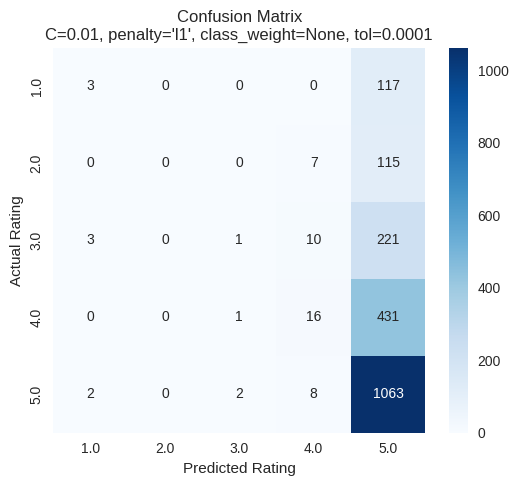


Running model 2/32 with parameters:
C=0.01, penalty='l1', class_weight=None, tol=0.001


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.5410


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


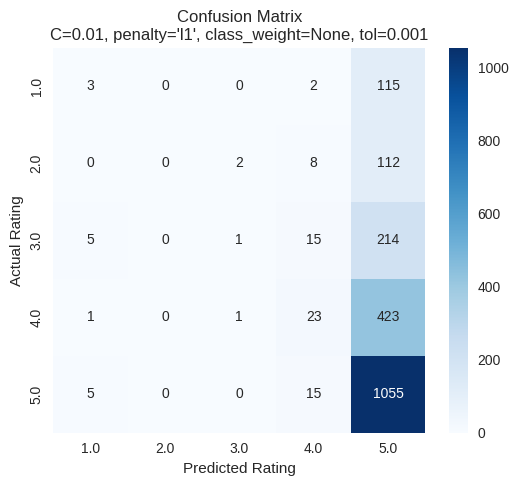


Running model 3/32 with parameters:
C=0.01, penalty='l1', class_weight=balanced, tol=0.0001


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.4640


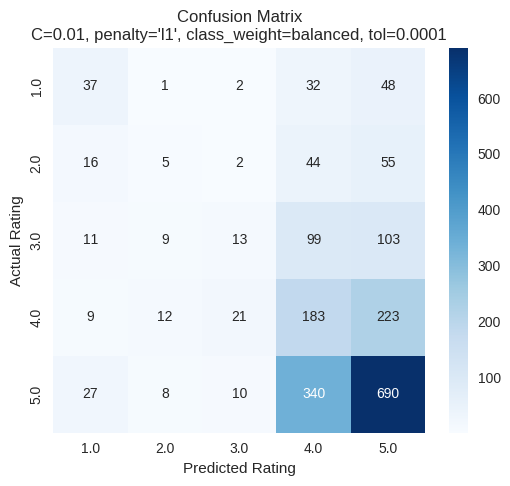


Running model 4/32 with parameters:
C=0.01, penalty='l1', class_weight=balanced, tol=0.001


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.4530


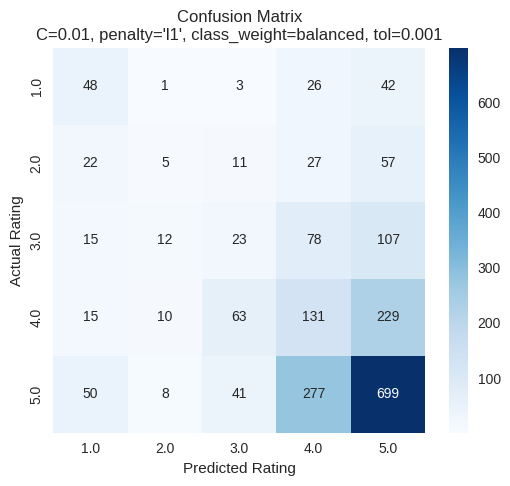


Running model 5/32 with parameters:
C=0.01, penalty='l2', class_weight=None, tol=0.0001


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.5415


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


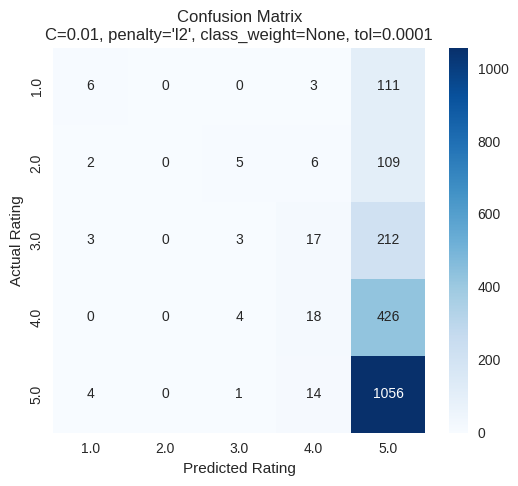


Running model 6/32 with parameters:
C=0.01, penalty='l2', class_weight=None, tol=0.001


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.5445


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


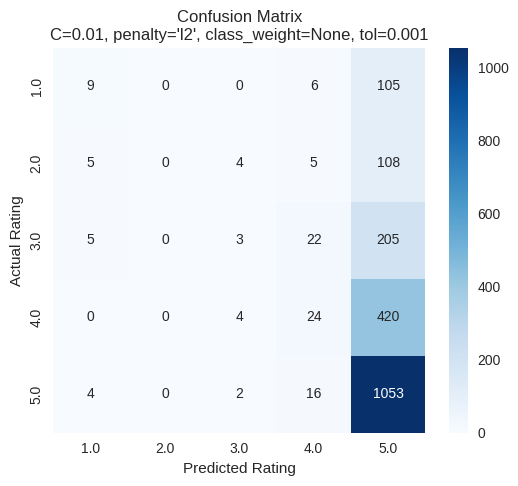


Running model 7/32 with parameters:
C=0.01, penalty='l2', class_weight=balanced, tol=0.0001


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.5140


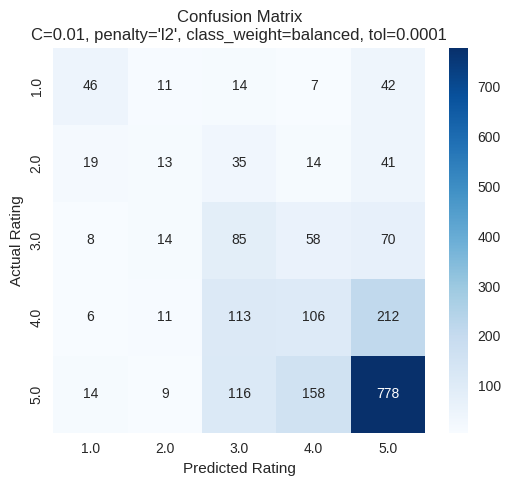


Running model 8/32 with parameters:
C=0.01, penalty='l2', class_weight=balanced, tol=0.001


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.5045


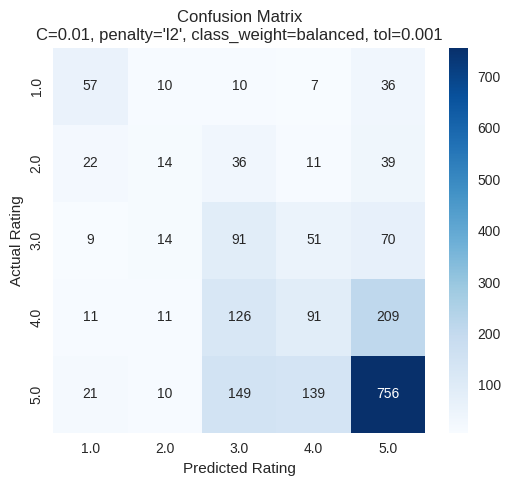


Running model 9/32 with parameters:
C=0.1, penalty='l1', class_weight=None, tol=0.0001


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to co

Accuracy: 0.5580


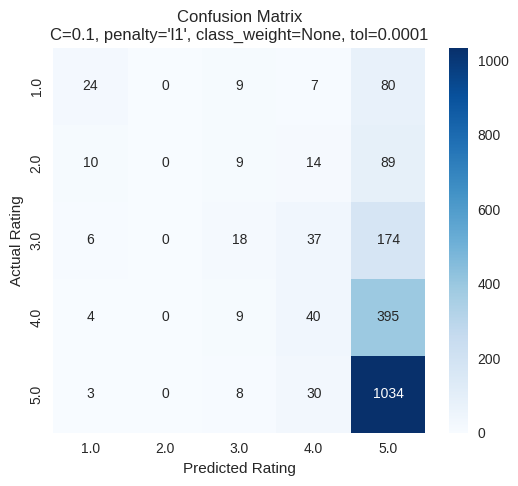


Running model 10/32 with parameters:
C=0.1, penalty='l1', class_weight=None, tol=0.001


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.5590


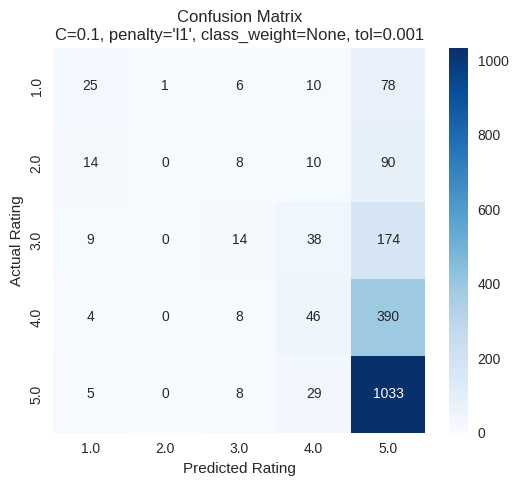


Running model 11/32 with parameters:
C=0.1, penalty='l1', class_weight=balanced, tol=0.0001


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy: 0.5255


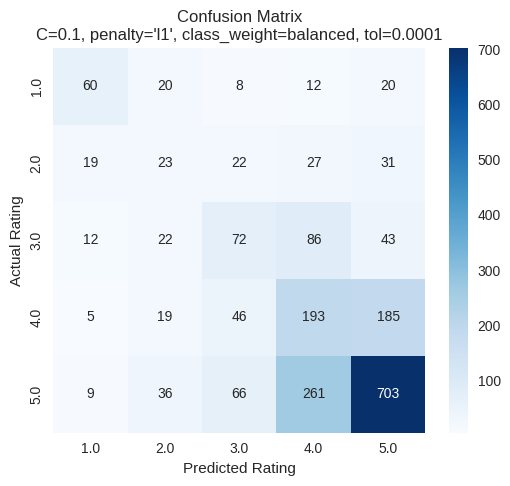


Running model 12/32 with parameters:
C=0.1, penalty='l1', class_weight=balanced, tol=0.001


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.5345


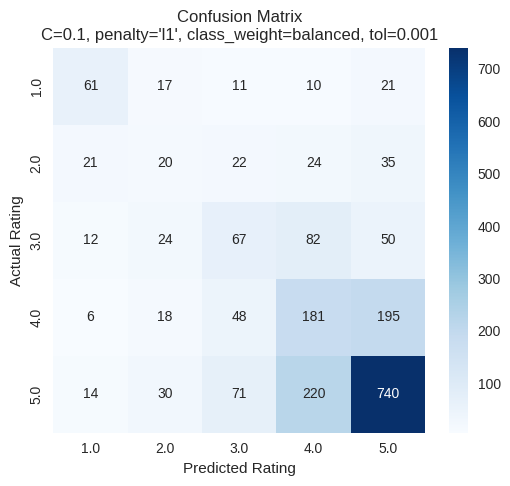


Running model 13/32 with parameters:
C=0.1, penalty='l2', class_weight=None, tol=0.0001


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy: 0.5720


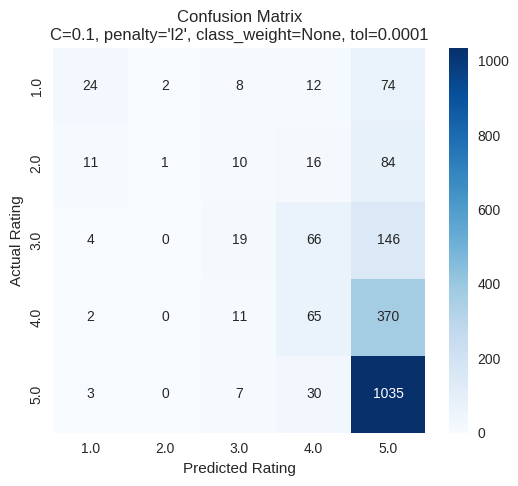


Running model 14/32 with parameters:
C=0.1, penalty='l2', class_weight=None, tol=0.001


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.5740


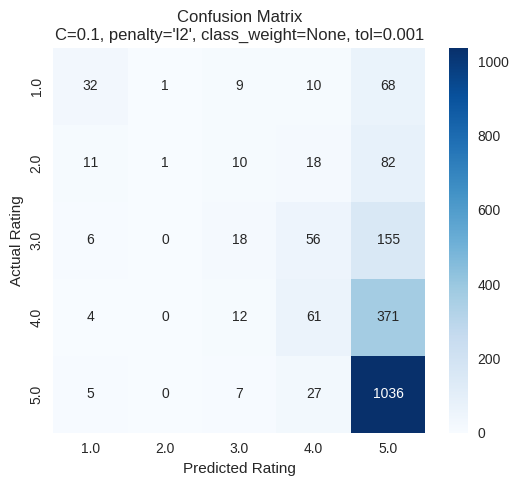


Running model 15/32 with parameters:
C=0.1, penalty='l2', class_weight=balanced, tol=0.0001


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.5735


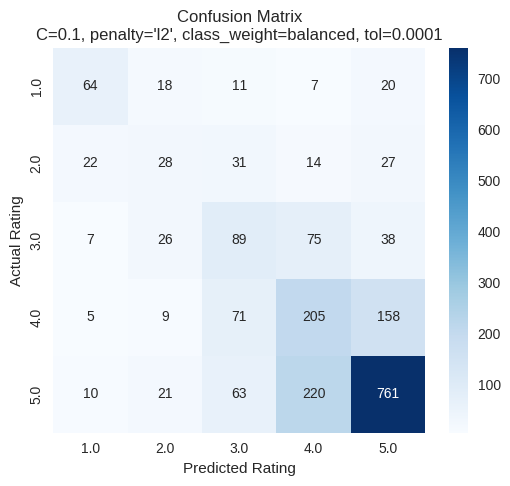


Running model 16/32 with parameters:
C=0.1, penalty='l2', class_weight=balanced, tol=0.001


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.5660


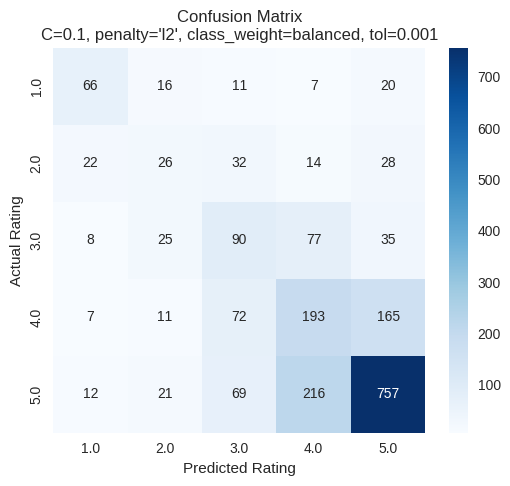


Running model 17/32 with parameters:
C=1, penalty='l1', class_weight=None, tol=0.0001


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy: 0.6050


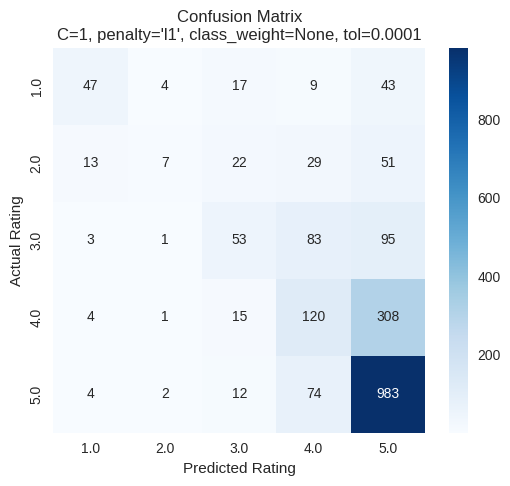


Running model 18/32 with parameters:
C=1, penalty='l1', class_weight=None, tol=0.001


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.5865


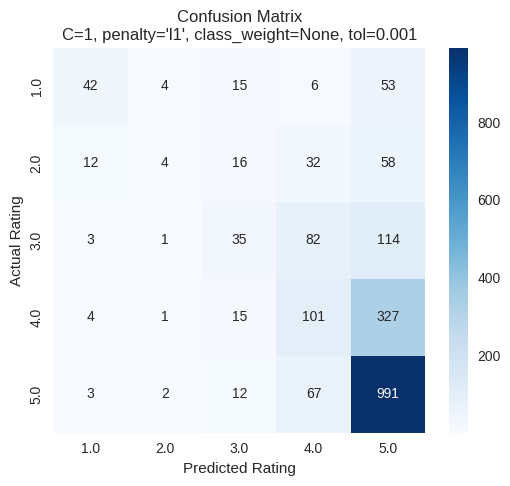


Running model 19/32 with parameters:
C=1, penalty='l1', class_weight=balanced, tol=0.0001


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy: 0.5785


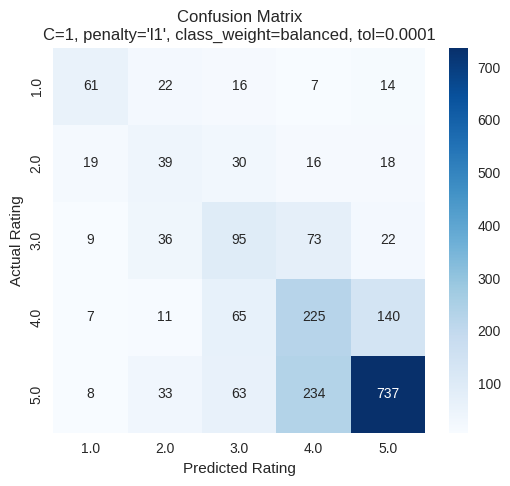


Running model 20/32 with parameters:
C=1, penalty='l1', class_weight=balanced, tol=0.001


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.5740


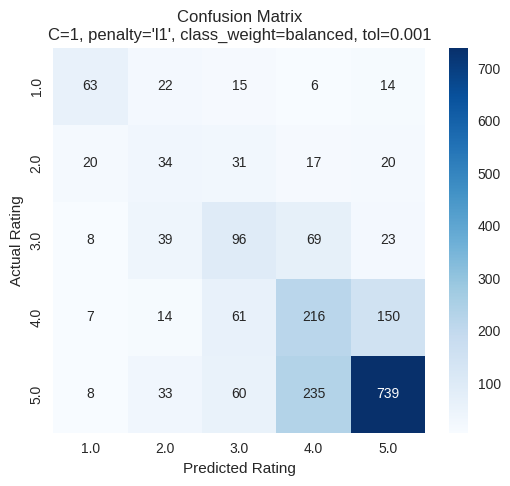


Running model 21/32 with parameters:
C=1, penalty='l2', class_weight=None, tol=0.0001


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy: 0.6135


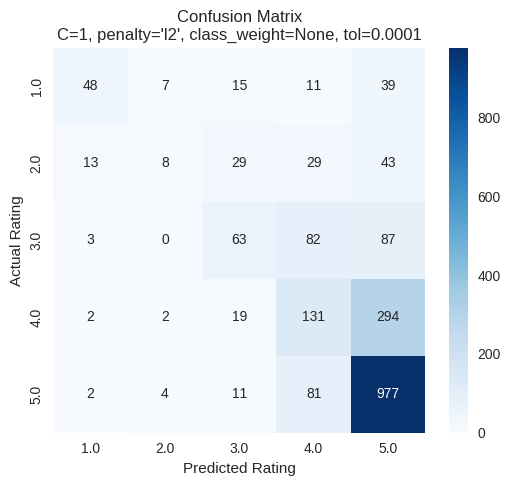


Running model 22/32 with parameters:
C=1, penalty='l2', class_weight=None, tol=0.001


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.5950


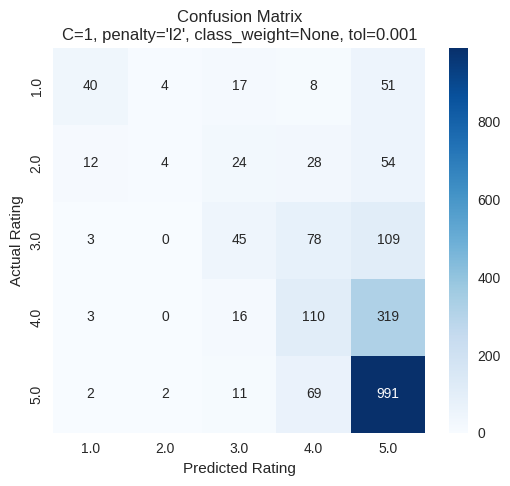


Running model 23/32 with parameters:
C=1, penalty='l2', class_weight=balanced, tol=0.0001


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy: 0.5810


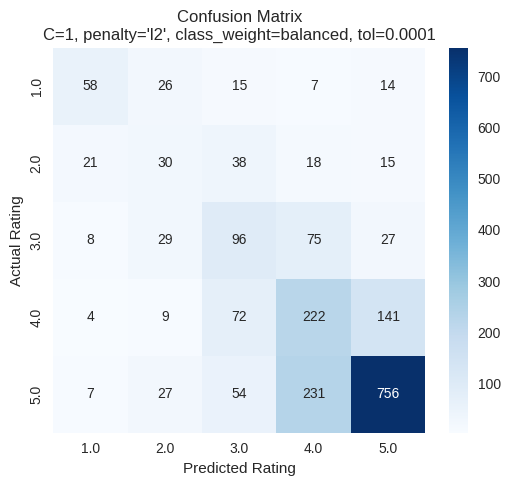


Running model 24/32 with parameters:
C=1, penalty='l2', class_weight=balanced, tol=0.001


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.5725


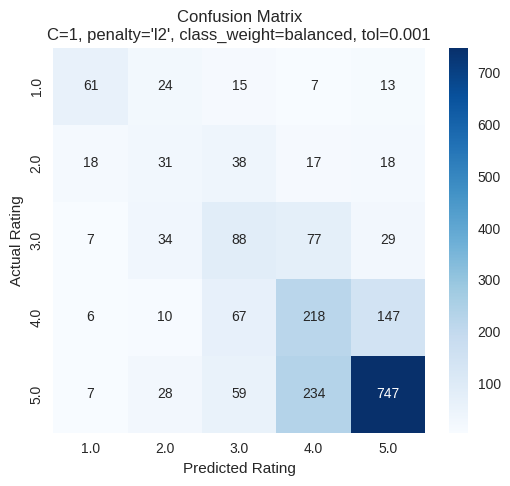


Running model 25/32 with parameters:
C=10, penalty='l1', class_weight=None, tol=0.0001


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy: 0.6120


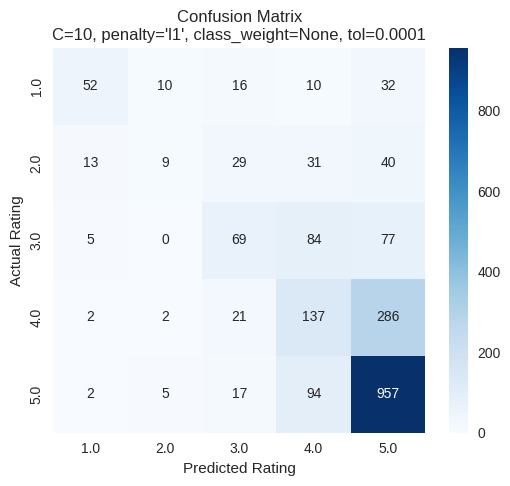


Running model 26/32 with parameters:
C=10, penalty='l1', class_weight=None, tol=0.001


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.6030


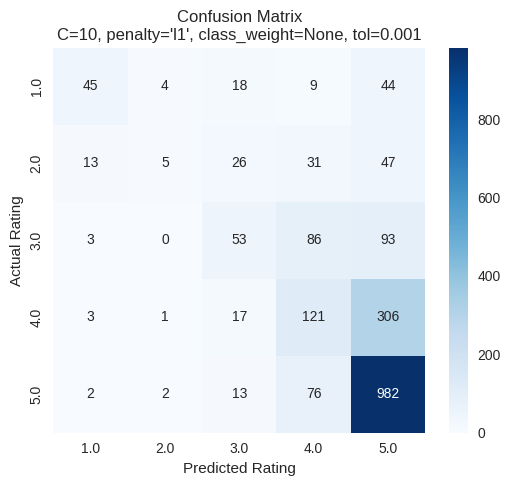


Running model 27/32 with parameters:
C=10, penalty='l1', class_weight=balanced, tol=0.0001


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


KeyboardInterrupt: 

In [86]:
# Import necessary libraries
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import itertools

# Define the hyperparameters to test
C_values = [0.01, 0.1, 1, 10]
penalties = ['l1', 'l2']
class_weights = [None, 'balanced']
tol_values = [1e-4, 1e-3]

# Since 'saga' solver supports both 'l1' and 'l2' penalties and works with sparse data
solver = 'saga'

# Prepare combinations of hyperparameters
param_combinations = list(itertools.product(C_values, penalties, class_weights, tol_values))

# Initialize a list to store results
results = []

# Loop over each combination of hyperparameters
for idx, (C, penalty, class_weight, tol) in enumerate(param_combinations):
    print(f"\nRunning model {idx+1}/{len(param_combinations)} with parameters:")
    print(f"C={C}, penalty='{penalty}', class_weight={class_weight}, tol={tol}")

    # Instantiate the logistic regression model with current hyperparameters
    logreg = LogisticRegression(
        multi_class='multinomial',
        solver=solver,
        C=C,
        penalty=penalty,
        class_weight=class_weight,
        tol=tol,
        max_iter=1000,
        random_state=42,
        n_jobs=-1
    )

    # Train the model
    logreg.fit(X_train, y_train)

    # Predict on the test set
    y_pred = logreg.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")

    # Generate classification report
    report = classification_report(y_test, y_pred, output_dict=True)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels=logreg.classes_)

    # Store the results
    results.append({
        'params': {
            'C': C,
            'penalty': penalty,
            'class_weight': class_weight,
            'tol': tol
        },
        'model': logreg,
        'accuracy': accuracy,
        'report': report,
        'confusion_matrix': cm
    })

    # Plot the confusion matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(
        cm,
        annot=True,
        fmt='d',
        cmap='Blues',
        xticklabels=logreg.classes_,
        yticklabels=logreg.classes_
    )
    plt.xlabel('Predicted Rating')
    plt.ylabel('Actual Rating')
    plt.title(f"Confusion Matrix\nC={C}, penalty='{penalty}', class_weight={class_weight}, tol={tol}")
    plt.show()

I think the parameters are not a cause because they all more or less lead the same result. I adjusting sampling.

## Using equal samples

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from scipy.sparse import csr_matrix, hstack

class MovieRatingPreprocessor:
    def __init__(self, sample_size=None, test_size=0.2, random_state=42):
        """
        Initialize the preprocessor with sampling and split parameters.

        Parameters:
        - sample_size: If provided, number of reviews to sample per rating category
        - test_size: Proportion of data to use for testing
        - random_state: Random seed for reproducibility
        """
        self.sample_size = sample_size
        self.test_size = test_size
        self.random_state = random_state
        self.scaler = StandardScaler()
        self.vectorizer = TfidfVectorizer(
            max_features=7500,
            min_df=5,
            max_df=0.95,
            strip_accents='unicode',
            lowercase=True,
            stop_words='english'
        )

    def balanced_sample(self, df):
        """Create a balanced sample across rating categories"""
        sampled_dfs = []

        for rating in range(1, 6):
            rating_df = df[df['Score'] == rating]
            if self.sample_size:
                # If sample_size is specified, take that many reviews per rating
                # or all reviews if there are fewer than sample_size
                n_samples = min(self.sample_size, len(rating_df))
                rating_sample = rating_df.sample(n=n_samples, random_state=self.random_state)
            else:
                # If no sample_size specified, keep all reviews
                rating_sample = rating_df
            sampled_dfs.append(rating_sample)

        return pd.concat(sampled_dfs, ignore_index=True)

    def calculate_user_features(self, train_data, test_data):
        """Calculate user bias and credibility scores"""
        # Calculate global average
        global_avg = train_data['Score'].mean()

        # Calculate movie averages from training data
        movie_avgs = train_data.groupby('ProductId')['Score'].mean()

        # Calculate user bias
        train_bias_df = train_data.merge(
            movie_avgs.rename('movie_avg'),
            on='ProductId',
            how='left'
        )
        train_bias_df['rating_bias'] = train_bias_df['Score'] - train_bias_df['movie_avg']
        user_bias = train_bias_df.groupby('UserId')['rating_bias'].mean()

        # Calculate user credibility
        user_stats = train_data.groupby('UserId').agg({
            'HelpfulnessNumerator': 'sum',
            'HelpfulnessDenominator': 'sum',
            'Score': 'count'
        })

        user_stats['helpfulness_ratio'] = np.where(
            user_stats['HelpfulnessDenominator'] > 0,
            user_stats['HelpfulnessNumerator'] / user_stats['HelpfulnessDenominator'],
            0
        )

        # Normalize review count using log transform
        user_stats['log_reviews'] = np.log1p(user_stats['Score'])
        user_stats['credibility_score'] = (
            0.7 * user_stats['helpfulness_ratio'] +
            0.3 * (user_stats['log_reviews'] / user_stats['log_reviews'].max())
        )

        # Create dictionaries for mapping
        bias_dict = user_bias.to_dict()
        credibility_dict = user_stats['credibility_score'].to_dict()

        # Apply to both train and test
        for df in [train_data, test_data]:
            df['user_bias'] = df['UserId'].map(bias_dict).fillna(0)
            df['user_credibility'] = df['UserId'].map(credibility_dict).fillna(
                user_stats['credibility_score'].median()
            )

        return train_data, test_data

    def create_features(self, df):
        """Create numerical features"""
        features = pd.DataFrame()

        # Helpfulness features
        features['helpfulness_numerator'] = df['HelpfulnessNumerator'].fillna(0)
        features['helpfulness_denominator'] = df['HelpfulnessDenominator'].fillna(0)
        features['helpfulness_ratio'] = features['helpfulness_numerator'] / \
                                      features['helpfulness_denominator'].replace(0, 1)

        # Text length features
        features['review_length'] = df['Text'].fillna('').str.len()
        features['summary_length'] = df['Summary'].fillna('').str.len()

        # User features
        features['user_bias'] = df['user_bias']
        features['user_credibility'] = df['user_credibility']

        return features

    def fit_transform(self, df):
        """Process the full dataset and return train/test splits"""
        # Create balanced sample
        balanced_df = self.balanced_sample(df)

        # Split into train and test
        train_df, test_df = train_test_split(
            balanced_df,
            test_size=self.test_size,
            random_state=self.random_state,
            stratify=balanced_df['Score']
        )

        # Calculate user features
        train_df, test_df = self.calculate_user_features(train_df, test_df)

        # Create text features
        train_df['CombinedText'] = train_df['Summary'].fillna('') + ' ' + train_df['Text'].fillna('')
        test_df['CombinedText'] = test_df['Summary'].fillna('') + ' ' + test_df['Text'].fillna('')

        train_text = self.vectorizer.fit_transform(train_df['CombinedText'])
        test_text = self.vectorizer.transform(test_df['CombinedText'])

        # Create and scale numerical features
        train_numerical = self.create_features(train_df)
        test_numerical = self.create_features(test_df)

        train_numerical_scaled = self.scaler.fit_transform(train_numerical)
        test_numerical_scaled = self.scaler.transform(test_numerical)

        # Combine features
        train_numerical_sparse = csr_matrix(train_numerical_scaled)
        test_numerical_sparse = csr_matrix(test_numerical_scaled)

        X_train = hstack([train_text, train_numerical_sparse])
        X_test = hstack([test_text, test_numerical_sparse])

        y_train = train_df['Score']
        y_test = test_df['Score']

        return X_train, X_test, y_train, y_test

    def get_feature_names(self):
        """Return list of feature names"""
        text_features = self.vectorizer.get_feature_names_out()
        numerical_features = ['helpfulness_numerator', 'helpfulness_denominator',
                            'helpfulness_ratio', 'review_length', 'summary_length',
                            'user_bias', 'user_credibility']
        return list(text_features) + numerical_features

# Initialize the preprocessor with 20,000 samples per rating category
preprocessor = MovieRatingPreprocessor(sample_size=20000)

# Load and process the data
df = pd.read_csv('train.csv')
X_train, X_test, y_train, y_test = preprocessor.fit_transform(df)

# Get feature names for later use
feature_names = preprocessor.get_feature_names()

# Print dataset statistics
print("\nDataset Statistics:")
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")
print("\nRating distribution in training set:")
print(y_train.value_counts(normalize=True).sort_index())
print("\nRating distribution in test set:")
print(y_test.value_counts(normalize=True).sort_index())


Dataset Statistics:
Training set shape: (80000, 7507)
Test set shape: (20000, 7507)

Rating distribution in training set:
Score
1.0    0.2
2.0    0.2
3.0    0.2
4.0    0.2
5.0    0.2
Name: proportion, dtype: float64

Rating distribution in test set:
Score
1.0    0.2
2.0    0.2
3.0    0.2
4.0    0.2
5.0    0.2
Name: proportion, dtype: float64


Loading data...
Creating balanced sample...
Processing training data...
Creating features...
Processing test data...
Creating features...
Vectorizing text...
Scaling numerical features...

Training Random Forest model...
Model training complete!

Making predictions...

Calculating metrics...

Model Performance Metrics:
Training RMSE: 0.4059
Test RMSE: 0.3757
Training MAE: 0.2006
Test MAE: 0.1437
R² Score: 0.9294

Prediction Accuracy:
Exact predictions: 88.60%
Within one star: 98.72%
Within two stars: 99.94%

Generating plots...


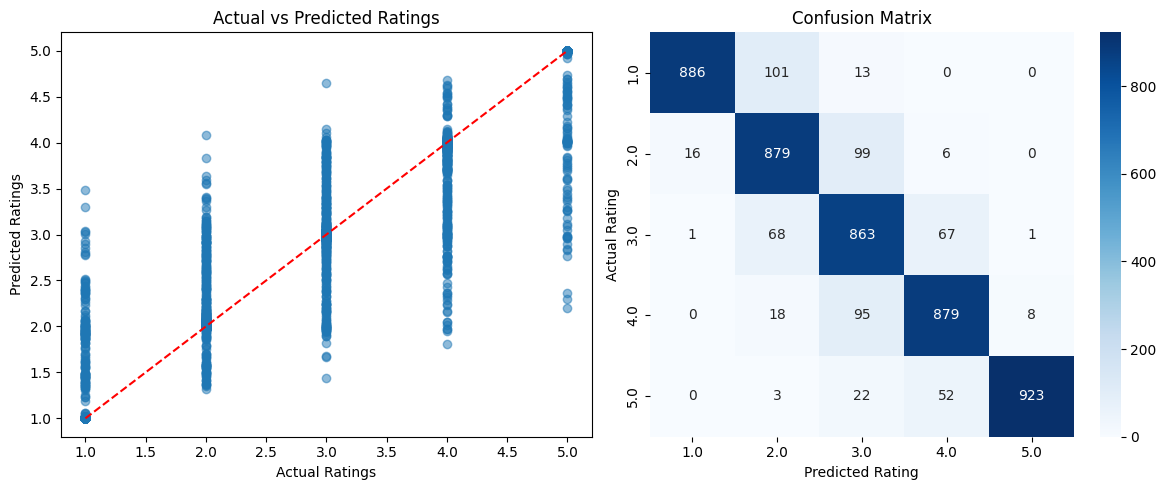


Analysis complete!


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.sparse import csr_matrix, hstack
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

class QuickMoviePreprocessor:
    def __init__(self, sample_size=5000, test_size=0.2, random_state=42):
        self.sample_size = sample_size
        self.test_size = test_size
        self.random_state = random_state
        self.scaler = StandardScaler()
        self.vectorizer = TfidfVectorizer(
            max_features=7500,
            min_df=5,
            max_df=0.95,
            strip_accents='unicode',
            lowercase=True,
            stop_words='english'
        )

    def balanced_sample(self, df):
        """Create a balanced sample across rating categories"""
        print("Creating balanced sample...")
        sampled_dfs = []
        for rating in range(1, 6):
            rating_df = df[df['Score'] == rating]
            n_samples = min(self.sample_size, len(rating_df))
            rating_sample = rating_df.sample(n=n_samples, random_state=self.random_state)
            sampled_dfs.append(rating_sample)
        return pd.concat(sampled_dfs, ignore_index=True)

    def create_features(self, df):
        """Create all features"""
        print("Creating features...")
        # Text features
        df['CombinedText'] = df['Summary'].fillna('') + ' ' + df['Text'].fillna('')

        # User features
        user_avg = df.groupby('UserId')['Score'].agg(['mean', 'count']).reset_index()
        user_avg.columns = ['UserId', 'user_avg_rating', 'user_review_count']
        df = df.merge(user_avg, on='UserId', how='left')

        # Create numerical features DataFrame
        features = pd.DataFrame()
        features['helpfulness_ratio'] = df['HelpfulnessNumerator'] / df['HelpfulnessDenominator'].replace(0, 1)
        features['review_length'] = df['Text'].fillna('').str.len()
        features['summary_length'] = df['Summary'].fillna('').str.len()
        features['user_avg_rating'] = df['user_avg_rating']
        features['user_review_count'] = df['user_review_count']

        return features, df['CombinedText']

    def fit_transform(self, df):
        """Process the full dataset and return train/test splits"""
        # Create balanced sample
        balanced_df = self.balanced_sample(df)

        # Split into train and test
        train_df, test_df = train_test_split(
            balanced_df,
            test_size=self.test_size,
            random_state=self.random_state,
            stratify=balanced_df['Score']
        )

        print("Processing training data...")
        train_numerical, train_text = self.create_features(train_df)
        print("Processing test data...")
        test_numerical, test_text = self.create_features(test_df)

        # Transform text features
        print("Vectorizing text...")
        train_text_features = self.vectorizer.fit_transform(train_text)
        test_text_features = self.vectorizer.transform(test_text)

        # Scale numerical features
        print("Scaling numerical features...")
        train_numerical_scaled = self.scaler.fit_transform(train_numerical)
        test_numerical_scaled = self.scaler.transform(test_numerical)

        # Combine features
        train_numerical_sparse = csr_matrix(train_numerical_scaled)
        test_numerical_sparse = csr_matrix(test_numerical_scaled)

        X_train = hstack([train_text_features, train_numerical_sparse])
        X_test = hstack([test_text_features, test_numerical_sparse])

        y_train = train_df['Score']
        y_test = test_df['Score']

        return X_train, X_test, y_train, y_test

class QuickForestAnalyzer:
    def __init__(self, X_train, X_test, y_train, y_test):
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test
        self.model = None
        self.predictions = None

    def train_and_evaluate(self):
        """Train the model and print metrics"""
        print("\nTraining Random Forest model...")
        self.model = RandomForestRegressor(
            n_estimators=100,
            max_depth=15,
            min_samples_split=5,
            min_samples_leaf=2,
            random_state=42,
            n_jobs=-1
        )

        self.model.fit(self.X_train, self.y_train)
        print("Model training complete!")

        # Generate predictions
        print("\nMaking predictions...")
        self.train_predictions = self.model.predict(self.X_train)
        self.predictions = self.model.predict(self.X_test)

        # Calculate metrics
        print("\nCalculating metrics...")
        train_rmse = np.sqrt(mean_squared_error(self.y_train, self.train_predictions))
        test_rmse = np.sqrt(mean_squared_error(self.y_test, self.predictions))
        train_mae = mean_absolute_error(self.y_train, self.train_predictions)
        test_mae = mean_absolute_error(self.y_test, self.predictions)
        r2 = r2_score(self.y_test, self.predictions)

        # Print metrics
        print("\nModel Performance Metrics:")
        print(f"Training RMSE: {train_rmse:.4f}")
        print(f"Test RMSE: {test_rmse:.4f}")
        print(f"Training MAE: {train_mae:.4f}")
        print(f"Test MAE: {test_mae:.4f}")
        print(f"R² Score: {r2:.4f}")

        # Calculate prediction accuracy
        rounded_preds = np.round(np.clip(self.predictions, 1, 5))
        errors = np.abs(self.y_test - rounded_preds)

        print("\nPrediction Accuracy:")
        print(f"Exact predictions: {(errors == 0).mean()*100:.2f}%")
        print(f"Within one star: {(errors <= 1).mean()*100:.2f}%")
        print(f"Within two stars: {(errors <= 2).mean()*100:.2f}%")

        # Plot predictions vs actual
        print("\nGenerating plots...")
        plt.figure(figsize=(12, 5))

        plt.subplot(1, 2, 1)
        plt.scatter(self.y_test, self.predictions, alpha=0.5)
        plt.plot([1, 5], [1, 5], 'r--')
        plt.xlabel('Actual Ratings')
        plt.ylabel('Predicted Ratings')
        plt.title('Actual vs Predicted Ratings')

        plt.subplot(1, 2, 2)
        confusion = pd.crosstab(self.y_test, rounded_preds)
        sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
        plt.xlabel('Predicted Rating')
        plt.ylabel('Actual Rating')
        plt.title('Confusion Matrix')

        plt.tight_layout()
        plt.show()

        print("\nAnalysis complete!")


# Load data
print("Loading data...")
df = pd.read_csv('train.csv')

# Initialize preprocessor and analyzer
preprocessor = QuickMoviePreprocessor(sample_size=5000)  # 5000 samples per rating
X_train, X_test, y_train, y_test = preprocessor.fit_transform(df)

# Train and evaluate model
analyzer = QuickForestAnalyzer(X_train, X_test, y_train, y_test)
analyzer.train_and_evaluate()

In [57]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from scipy.sparse import csr_matrix, hstack

class MoviePredictor:
    def __init__(self, train_size=25000, random_state=42):
        self.train_size = train_size
        self.random_state = random_state
        self.scaler = StandardScaler()
        self.vectorizer = TfidfVectorizer(
            max_features=7500,
            min_df=5,
            max_df=0.95,
            strip_accents='unicode',
            lowercase=True,
            stop_words='english'
        )
        self.model = RandomForestRegressor(
            n_estimators=100,
            max_depth=15,
            min_samples_split=5,
            min_samples_leaf=2,
            random_state=42,
            n_jobs=-1
        )

    def create_balanced_training_sample(self, df):
        """Create a balanced sample for training"""
        samples_per_rating = self.train_size // 5
        sampled_dfs = []
        for rating in range(1, 6):
            rating_df = df[df['Score'] == rating]
            n_samples = min(samples_per_rating, len(rating_df))
            rating_sample = rating_df.sample(n=n_samples, random_state=self.random_state)
            sampled_dfs.append(rating_sample)
        return pd.concat(sampled_dfs, ignore_index=True)

    def create_features(self, df):
        """Create features for a dataset"""
        # Make a copy to avoid warnings
        df = df.copy()

        # Text features
        df.loc[:, 'Summary'] = df['Summary'].fillna('').astype(str)
        df.loc[:, 'Text'] = df['Text'].fillna('').astype(str)
        df.loc[:, 'CombinedText'] = df['Summary'] + ' ' + df['Text']

        # User features
        user_avg = self.full_train_df.groupby('UserId')['Score'].agg(['mean', 'count']).reset_index()
        user_avg.columns = ['UserId', 'user_avg_rating', 'user_review_count']

        # Handle missing UserId
        df.loc[:, 'UserId'] = df['UserId'].fillna('UNKNOWN')
        df = df.merge(user_avg, on='UserId', how='left')

        # Create numerical features DataFrame
        features = pd.DataFrame()
        denominator = df['HelpfulnessDenominator'].replace(0, 1)
        features['helpfulness_ratio'] = df['HelpfulnessNumerator'] / denominator
        features['review_length'] = df['Text'].str.len()
        features['summary_length'] = df['Summary'].str.len()
        features['user_avg_rating'] = df['user_avg_rating'].fillna(self.full_train_df['Score'].mean())
        features['user_review_count'] = df['user_review_count'].fillna(1)

        # Only print aggregate statistics if the DataFrame has more than 1 row
        if len(df) > 1:
            print("\nFeature statistics (aggregated over all samples):")
            print(features.describe())

        return features, df['CombinedText']

    def train_model(self, train_df):
        """Train the model on balanced data"""
        print("Training model on balanced sample...")
        self.full_train_df = train_df  # Store for user statistics

        # Create balanced training sample
        balanced_df = self.create_balanced_training_sample(train_df)
        print(f"Created balanced sample with {len(balanced_df)} reviews")
        print("Rating distribution in training:")
        print(balanced_df['Score'].value_counts().sort_index())

        # Create features
        train_numerical, train_text = self.create_features(balanced_df)
        print("\nFeatures created:")
        print("Numerical features:", train_numerical.columns.tolist())
        print("Text features will be created using TF-IDF")

        # Transform features
        print("\nTransforming features...")
        train_text_features = self.vectorizer.fit_transform(train_text)
        train_numerical_scaled = self.scaler.fit_transform(train_numerical)
        train_numerical_sparse = csr_matrix(train_numerical_scaled)

        # Combine features
        X_train = hstack([train_text_features, train_numerical_sparse])
        y_train = balanced_df['Score']
        print(f"Final feature matrix shape: {X_train.shape}")

        # Train model
        print("\nFitting Random Forest model...")
        self.model.fit(X_train, y_train)
        print("Model training complete!")

    def process_test_data(self, test_df, train_df):
        """Process test data and generate predictions"""
        from tqdm.notebook import tqdm  # for Jupyter notebook progress bar

        print(f"\nProcessing test data... Total cases: {len(test_df)}")

        # First, get the mapping from Id to actual review in train_df
        test_reviews = []
        missing_ids = []
        all_features = []

        # Create progress bar
        pbar = tqdm(total=len(test_df), desc="Processing reviews")

        for idx, row in test_df.iterrows():
            test_id = row['Id']
            review_data = train_df[train_df['Id'] == test_id]

            if len(review_data) > 0:
                # Create features for this review
                numerical_features, text_features = self.create_features(review_data)

                # Transform features
                text_features_transformed = self.vectorizer.transform(text_features)
                numerical_scaled = self.scaler.transform(numerical_features)
                numerical_sparse = csr_matrix(numerical_scaled)

                # Combine features
                X = hstack([text_features_transformed, numerical_sparse])
                all_features.append(X)
                test_reviews.append(test_id)
            else:
                missing_ids.append(test_id)

            pbar.update(1)  # Update progress bar

        pbar.close()

        if missing_ids:
            print(f"\nWarning: {len(missing_ids):,} test IDs were not found in training data")
            if len(missing_ids) < 5:
                print("Missing IDs:", missing_ids)
            else:
                print("First 5 missing IDs:", missing_ids[:5])

        # Combine all features
        if all_features:
            print("\nGenerating predictions...")
            X_test = hstack(all_features)

            # Generate predictions
            predictions = self.model.predict(X_test)
            predictions = np.clip(predictions, 1, 5)  # Clip to valid range

            # Create a dictionary mapping test IDs to predictions
            prediction_dict = dict(zip(test_reviews, predictions))

            # Fill in predictions for all test cases
            final_predictions = []
            mean_rating = train_df['Score'].mean()

            print("Creating final prediction file...")
            for test_id in test_df['Id']:
                if test_id in prediction_dict:
                    final_predictions.append(prediction_dict[test_id])
                else:
                    final_predictions.append(mean_rating)

            print(f"\nPredictions generated. Summary statistics:")
            print(pd.Series(final_predictions).describe())

            return np.array(final_predictions)
        else:
            print("Error: No features could be created from test data")
            return None

In [59]:
print("Loading data...")
print("Reading train.csv...")
train_df = pd.read_csv('train.csv')
print(f"Loaded {len(train_df)} training reviews")
print("\nReading test.csv...")
test_df = pd.read_csv('test.csv')
print(f"Loaded {len(test_df)} test cases")

print("\nTraining data overview:")
print(train_df.info())
print("\nMissing values in training data:")
print(train_df.isnull().sum())

# Add after loading data
print("\nChecking for data issues...")
print("\nTrain data columns:", train_df.columns.tolist())
print("Test data columns:", test_df.columns.tolist())

print("\nMissing values in test data:")
print(test_df.isnull().sum())

print("\nSample of test data:")
print(test_df.head())

# Verify Id exists in both datasets
print("\nVerifying 'Id' column...")
print("'Id' in test columns:", 'Id' in test_df.columns)
print("'Id' in train columns:", 'Id' in train_df.columns)

if 'Id' not in test_df.columns or 'Id' not in train_df.columns:
    raise ValueError("'Id' column missing from data!")

Loading data...
Reading train.csv...
Loaded 1697533 training reviews

Reading test.csv...
Loaded 212192 test cases

Training data overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1697533 entries, 0 to 1697532
Data columns (total 9 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Id                      int64  
 1   ProductId               object 
 2   UserId                  object 
 3   HelpfulnessNumerator    int64  
 4   HelpfulnessDenominator  int64  
 5   Time                    int64  
 6   Summary                 object 
 7   Text                    object 
 8   Score                   float64
dtypes: float64(1), int64(4), object(4)
memory usage: 116.6+ MB
None

Missing values in training data:
Id                             0
ProductId                      0
UserId                         0
HelpfulnessNumerator           0
HelpfulnessDenominator         0
Time                           0
Summary                       32
Text   

In [60]:
# Initialize predictor
print("Initializing predictor with 25000 training samples...")
predictor = MoviePredictor(train_size=25000)

# Train model
predictor.train_model(train_df)

Initializing predictor with 25000 training samples...
Training model on balanced sample...
Created balanced sample with 25000 reviews
Rating distribution in training:
Score
1.0    5000
2.0    5000
3.0    5000
4.0    5000
5.0    5000
Name: count, dtype: int64

Feature statistics (aggregated over all samples):
       helpfulness_ratio  review_length  summary_length  user_avg_rating  \
count       25000.000000    25000.00000    25000.000000     25000.000000   
mean            0.388863     1005.05356       28.345680         3.774128   
std             0.384249     1220.65005       17.972027         0.720446   
min             0.000000        4.00000        0.000000         1.000000   
25%             0.000000      236.00000       15.000000         3.333333   
50%             0.333333      579.00000       24.000000         3.835605   
75%             0.733333     1307.00000       37.000000         4.283333   
max             1.000000    26760.00000      131.000000         5.000000   

     

In [61]:
# Process test data and get predictions
predictions = predictor.process_test_data(test_df, train_df)

if predictions is not None:
    # Create submission file
    submission_df = pd.DataFrame({
        'Id': test_df['Id'],
        'Score': predictions
    })
    submission_df.to_csv('test_ans.csv', index=False)

    print("\nRating distribution in predictions:")
    print(pd.Series(predictions).round().value_counts().sort_index())

    print("\nSample of first few predictions:")
    print(submission_df.head())

    print(f"\nPredictions saved to test_ans.csv ({len(predictions):,} predictions)")
else:
    print("Failed to generate predictions")


Processing test data... Total cases: 212192


Processing reviews:   0%|          | 0/212192 [00:00<?, ?it/s]

KeyboardInterrupt: 

this takes way too long ill try to see what takes so much time.

In [37]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from scipy.sparse import csr_matrix, hstack
import time
from contextlib import contextmanager
from typing import Dict, Optional
from tqdm import tqdm

class Timer:
    """Utility class to track execution times of different code sections"""

    def __init__(self):
        self.times: Dict[str, list] = {}
        self.current_timer: Optional[str] = None
        self.start_time: Optional[float] = None

    @contextmanager
    def track(self, name: str):
        """Context manager to track execution time of a code block"""
        try:
            self.start_time = time.time()
            self.current_timer = name
            yield
        finally:
            if self.current_timer:
                elapsed = time.time() - self.start_time
                if name not in self.times:
                    self.times[name] = []
                self.times[name].append(elapsed)

    def summary(self):
        """Print summary statistics for all tracked operations"""
        print("\nTiming Summary:")
        print("-" * 60)
        print(f"{'Operation':<30} {'Avg Time (s)':>10} {'Total Time (s)':>15}")
        print("-" * 60)

        total_time = 0
        for name, times in self.times.items():
            avg_time = np.mean(times)
            total = np.sum(times)
            total_time += total
            print(f"{name:<30} {avg_time:>10.3f} {total:>15.3f}")

        print("-" * 60)
        print(f"{'Total Time':<30} {'-':>10} {total_time:>15.3f}")

        print("\nPercentage of Total Time:")
        print("-" * 60)
        for name, times in self.times.items():
            total = np.sum(times)
            percentage = (total / total_time) * 100
            print(f"{name:<30} {percentage:>10.1f}%")

class TimedMoviePredictor:
    def __init__(self, train_size=25000, random_state=42):
        self.timer = Timer()
        self.train_size = train_size
        self.random_state = random_state
        self.scaler = StandardScaler()
        self.vectorizer = TfidfVectorizer(
            max_features=7500,
            min_df=5,
            max_df=0.95,
            strip_accents='unicode',
            lowercase=True,
            stop_words='english'
        )
        self.model = RandomForestRegressor(
            n_estimators=100,
            max_depth=15,
            min_samples_split=5,
            min_samples_leaf=2,
            random_state=42,
            n_jobs=-1
        )
        self.user_stats = None

    def precompute_user_statistics(self, train_df, cache_file='user_stats.pkl'):
        """Precompute user statistics and cache them to a file"""
        import os

        if os.path.exists(cache_file):
            print("Loading pre-computed user statistics...")
            self.user_stats = pd.read_pickle(cache_file)
            print(f"Loaded user statistics for {len(self.user_stats)} users")
        else:
            print("Computing user statistics...")
            start = time.time()

            # Compute user statistics
            self.user_stats = (train_df.groupby('UserId')['Score']
                              .agg(['mean', 'count'])
                              .reset_index()
                              .rename(columns={'mean': 'user_avg_rating',
                                             'count': 'user_review_count'}))

            # Cache the results
            self.user_stats.to_pickle(cache_file)
            print(f"Computed and cached user statistics in {time.time() - start:.2f}s")
            print(f"Statistics computed for {len(self.user_stats)} users")

    def create_balanced_training_sample(self, df):
        """Create a balanced sample for training"""
        with self.timer.track("Creating Balanced Sample"):
            samples_per_rating = self.train_size // 5
            sampled_dfs = []
            for rating in range(1, 6):
                rating_df = df[df['Score'] == rating]
                n_samples = min(samples_per_rating, len(rating_df))
                rating_sample = rating_df.sample(n=n_samples, random_state=self.random_state)
                sampled_dfs.append(rating_sample)
            return pd.concat(sampled_dfs, ignore_index=True)

    def create_features(self, df):
        """Create features using pre-computed statistics"""
        with self.timer.track("Feature Creation"):
            print("\nFeature Creation Breakdown:")

            # Time data copy
            start = time.time()
            df = df.copy()
            print(f"Data copy took: {time.time() - start:.3f}s")

            # Time text preprocessing
            start = time.time()
            df.loc[:, 'Summary'] = df['Summary'].fillna('').astype(str)
            df.loc[:, 'Text'] = df['Text'].fillna('').astype(str)
            df.loc[:, 'CombinedText'] = df['Summary'] + ' ' + df['Text']
            print(f"Text preprocessing took: {time.time() - start:.3f}s")

            # Time user features merging
            start = time.time()
            df.loc[:, 'UserId'] = df['UserId'].fillna('UNKNOWN')
            df = df.merge(self.user_stats, on='UserId', how='left')
            print(f"User features merging took: {time.time() - start:.3f}s")

            # Time numerical features creation
            start = time.time()
            features = pd.DataFrame()
            denominator = df['HelpfulnessDenominator'].replace(0, 1)
            features['helpfulness_ratio'] = df['HelpfulnessNumerator'] / denominator
            print(f"Helpfulness ratio calculation took: {time.time() - start:.3f}s")

            start = time.time()
            features['review_length'] = df['Text'].str.len()
            features['summary_length'] = df['Summary'].str.len()
            print(f"Text length calculations took: {time.time() - start:.3f}s")

            start = time.time()
            features['user_avg_rating'] = df['user_avg_rating'].fillna(self.full_train_df['Score'].mean())
            features['user_review_count'] = df['user_review_count'].fillna(1)
            print(f"User feature filling took: {time.time() - start:.3f}s")

            return features, df['CombinedText']

    def train_model(self, train_df):
        """Train the model on balanced data"""
        with self.timer.track("Total Training"):
            print("Training model on balanced sample...")
            self.full_train_df = train_df  # Store for user statistics

            # Precompute user statistics
            self.precompute_user_statistics(train_df)

            # Create balanced training sample
            balanced_df = self.create_balanced_training_sample(train_df)
            print(f"Created balanced sample with {len(balanced_df)} reviews")

            with self.timer.track("Feature Generation"):
                # Create features
                train_numerical, train_text = self.create_features(balanced_df)
                print("\nFeatures created:")
                print("Numerical features:", train_numerical.columns.tolist())

            with self.timer.track("Feature Transform"):
                # Transform features
                print("\nTransforming features...")
                train_text_features = self.vectorizer.fit_transform(train_text)
                train_numerical_scaled = self.scaler.fit_transform(train_numerical)
                train_numerical_sparse = csr_matrix(train_numerical_scaled)

                # Combine features
                X_train = hstack([train_text_features, train_numerical_sparse])
                y_train = balanced_df['Score']

            with self.timer.track("Model Fitting"):
                # Train model
                print("\nFitting Random Forest model...")
                self.model.fit(X_train, y_train)
                print("Model training complete!")

            self.timer.summary()

    def process_test_data(self, test_df, train_df):
        """Process test data and generate predictions"""
        with self.timer.track("Total Processing"):
            print(f"\nProcessing test data... Total cases: {len(test_df)}")

            test_reviews = []
            missing_ids = []
            predictions_list = []  # Store predictions for each batch

            # Calculate batch size as 0.4% of total
            batch_size = max(1, int(len(test_df) * 0.004))
            num_batches = (len(test_df) + batch_size - 1) // batch_size
            print(f"Processing in batches of {batch_size} reviews")

            # Add detailed timing for first batch
            if True:  # Do detailed timing for first batch
                print("\nDetailed timing for first batch:")
                start_idx = 0
                end_idx = min(batch_size, len(test_df))
                batch_df = test_df.iloc[start_idx:end_idx]

                # Time review lookup
                start = time.time()
                batch_reviews = []
                for _, row in batch_df.iterrows():
                    review_data = train_df[train_df['Id'] == row['Id']]
                    if len(review_data) > 0:
                        batch_reviews.append(review_data)
                        test_reviews.append(row['Id'])
                    else:
                        missing_ids.append(row['Id'])
                print(f"Review lookup took: {time.time() - start:.3f}s")

                if batch_reviews:
                    # Time concatenation
                    start = time.time()
                    batch_data = pd.concat(batch_reviews, ignore_index=True)
                    print(f"Batch concatenation took: {time.time() - start:.3f}s")

                    # Time feature creation
                    start = time.time()
                    numerical_features, text_features = self.create_features(batch_data)
                    print(f"Feature creation took: {time.time() - start:.3f}s")

                    # Time feature transform
                    start = time.time()
                    text_features_transformed = self.vectorizer.transform(text_features)
                    print(f"Text vectorization took: {time.time() - start:.3f}s")

                    start = time.time()
                    numerical_scaled = self.scaler.transform(numerical_features)
                    numerical_sparse = csr_matrix(numerical_scaled)
                    print(f"Numerical scaling took: {time.time() - start:.3f}s")

                    start = time.time()
                    X = hstack([text_features_transformed, numerical_sparse])
                    print(f"Feature stacking took: {time.time() - start:.3f}s")

                    # Generate predictions for this batch
                    batch_predictions = self.model.predict(X)
                    predictions_list.extend(batch_predictions)

            # Process remaining batches with progress bar
            for batch_idx in tqdm(range(1, num_batches), desc="Processing batches"):
                start_idx = batch_idx * batch_size
                end_idx = min((batch_idx + 1) * batch_size, len(test_df))
                batch_df = test_df.iloc[start_idx:end_idx]

                with self.timer.track("Review Lookup"):
                    batch_reviews = []
                    for _, row in batch_df.iterrows():
                        review_data = train_df[train_df['Id'] == row['Id']]
                        if len(review_data) > 0:
                            batch_reviews.append(review_data)
                            test_reviews.append(row['Id'])
                        else:
                            missing_ids.append(row['Id'])

                if batch_reviews:
                    batch_data = pd.concat(batch_reviews, ignore_index=True)
                    numerical_features, text_features = self.create_features(batch_data)
                    text_features_transformed = self.vectorizer.transform(text_features)
                    numerical_scaled = self.scaler.transform(numerical_features)
                    numerical_sparse = csr_matrix(numerical_scaled)
                    X = hstack([text_features_transformed, numerical_sparse])
                    batch_predictions = self.model.predict(X)
                    predictions_list.extend(batch_predictions)

            if missing_ids:
                print(f"\nWarning: {len(missing_ids):,} test IDs not found")

            if predictions_list:
                predictions = np.array(predictions_list)
                predictions = np.clip(predictions, 1, 5)

                with self.timer.track("Results Processing"):
                    prediction_dict = dict(zip(test_reviews, predictions))
                    final_predictions = []
                    mean_rating = train_df['Score'].mean()

                    for test_id in test_df['Id']:
                        if test_id in prediction_dict:
                            final_predictions.append(prediction_dict[test_id])
                        else:
                            final_predictions.append(mean_rating)

                self.timer.summary()
                return np.array(final_predictions)

            return None

In [38]:
# Load data
print("Loading data...")
print("Reading train.csv...")
train_df = pd.read_csv('train.csv')
print(f"Loaded {len(train_df)} training reviews")
print("\nReading test.csv...")
test_df = pd.read_csv('test.csv')
print(f"Loaded {len(test_df)} test cases")

# Initialize predictor
print("Initializing predictor with 25000 training samples...")
predictor = TimedMoviePredictor(train_size=25000)

# Train model (will create or load user statistics)
predictor.train_model(train_df)

Loading data...
Reading train.csv...
Loaded 1697533 training reviews

Reading test.csv...
Loaded 212192 test cases
Initializing predictor with 25000 training samples...
Training model on balanced sample...
Computing user statistics...
Computed and cached user statistics in 0.88s
Statistics computed for 123960 users
Created balanced sample with 25000 reviews

Feature Creation Breakdown:
Data copy took: 0.037s
Text preprocessing took: 0.083s
User features merging took: 0.157s
Helpfulness ratio calculation took: 0.004s
Text length calculations took: 0.052s
User feature filling took: 0.011s

Features created:
Numerical features: ['helpfulness_ratio', 'review_length', 'summary_length', 'user_avg_rating', 'user_review_count']

Transforming features...

Fitting Random Forest model...
Model training complete!

Timing Summary:
------------------------------------------------------------
Operation                      Avg Time (s)  Total Time (s)
-------------------------------------------------

In [39]:
# Process test data and get predictions
predictions = predictor.process_test_data(test_df, train_df)

if predictions is not None:
    # Create submission file
    submission_df = pd.DataFrame({
        'Id': test_df['Id'],
        'Score': predictions
    })
    submission_df.to_csv('test_ans.csv', index=False)

    print("\nRating distribution in predictions:")
    print(pd.Series(predictions).round().value_counts().sort_index())

    print("\nSample of first few predictions:")
    print(submission_df.head())

    print(f"\nPredictions saved to test_ans.csv ({len(predictions):,} predictions)")
else:
    print("Failed to generate predictions")


Processing test data... Total cases: 212192
Processing in batches of 848 reviews

Detailed timing for first batch:
Review lookup took: 2.629s
Batch concatenation took: 0.290s

Feature Creation Breakdown:
Data copy took: 0.003s
Text preprocessing took: 0.004s
User features merging took: 0.058s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.003s
User feature filling took: 0.011s
Feature creation took: 0.083s
Text vectorization took: 0.110s
Numerical scaling took: 0.003s
Feature stacking took: 0.001s


Processing batches:   0%|          | 0/250 [00:00<?, ?it/s]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.003s
User features merging took: 0.052s
Helpfulness ratio calculation took: 0.002s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:   0%|          | 1/250 [00:02<11:49,  2.85s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.004s
User features merging took: 0.056s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:   1%|          | 2/250 [00:05<11:45,  2.84s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.004s
User features merging took: 0.057s
Helpfulness ratio calculation took: 0.002s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:   1%|          | 3/250 [00:08<12:19,  2.99s/it]


Feature Creation Breakdown:
Data copy took: 0.003s
Text preprocessing took: 0.004s
User features merging took: 0.060s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:   2%|▏         | 4/250 [00:11<12:21,  3.02s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.004s
User features merging took: 0.059s
Helpfulness ratio calculation took: 0.002s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:   2%|▏         | 5/250 [00:15<12:43,  3.12s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.004s
User features merging took: 0.055s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.003s
User feature filling took: 0.010s


Processing batches:   2%|▏         | 6/250 [00:18<12:49,  3.15s/it]


Feature Creation Breakdown:
Data copy took: 0.003s
Text preprocessing took: 0.003s
User features merging took: 0.057s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:   3%|▎         | 7/250 [00:21<12:26,  3.07s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.003s
User features merging took: 0.055s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:   3%|▎         | 8/250 [00:24<11:56,  2.96s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.003s
User features merging took: 0.053s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:   4%|▎         | 9/250 [00:27<11:56,  2.97s/it]


Feature Creation Breakdown:
Data copy took: 0.003s
Text preprocessing took: 0.004s
User features merging took: 0.057s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.003s
User feature filling took: 0.010s


Processing batches:   4%|▍         | 10/250 [00:30<12:05,  3.02s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.003s
User features merging took: 0.054s
Helpfulness ratio calculation took: 0.002s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:   4%|▍         | 11/250 [00:33<12:21,  3.10s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.004s
User features merging took: 0.058s
Helpfulness ratio calculation took: 0.002s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:   5%|▍         | 12/250 [00:36<12:35,  3.17s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.003s
User features merging took: 0.063s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:   5%|▌         | 13/250 [00:39<12:25,  3.14s/it]


Feature Creation Breakdown:
Data copy took: 0.003s
Text preprocessing took: 0.004s
User features merging took: 0.057s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.003s
User feature filling took: 0.010s


Processing batches:   6%|▌         | 14/250 [00:43<12:21,  3.14s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.004s
User features merging took: 0.058s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.003s
User feature filling took: 0.010s


Processing batches:   6%|▌         | 15/250 [00:45<11:58,  3.06s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.004s
User features merging took: 0.054s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.002s
User feature filling took: 0.011s


Processing batches:   6%|▋         | 16/250 [00:49<12:00,  3.08s/it]


Feature Creation Breakdown:
Data copy took: 0.003s
Text preprocessing took: 0.004s
User features merging took: 0.057s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.002s
User feature filling took: 0.012s


Processing batches:   7%|▋         | 17/250 [00:52<12:03,  3.11s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.004s
User features merging took: 0.054s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:   7%|▋         | 18/250 [00:55<12:08,  3.14s/it]


Feature Creation Breakdown:
Data copy took: 0.004s
Text preprocessing took: 0.004s
User features merging took: 0.069s
Helpfulness ratio calculation took: 0.005s
Text length calculations took: 0.003s
User feature filling took: 0.011s


Processing batches:   8%|▊         | 19/250 [00:59<12:44,  3.31s/it]


Feature Creation Breakdown:
Data copy took: 0.003s
Text preprocessing took: 0.004s
User features merging took: 0.060s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:   8%|▊         | 20/250 [01:02<12:58,  3.38s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.003s
User features merging took: 0.055s
Helpfulness ratio calculation took: 0.002s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:   8%|▊         | 21/250 [01:05<12:24,  3.25s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.004s
User features merging took: 0.054s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.003s
User feature filling took: 0.011s


Processing batches:   9%|▉         | 22/250 [01:08<11:54,  3.13s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.003s
User features merging took: 0.054s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:   9%|▉         | 23/250 [01:11<11:39,  3.08s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.003s
User features merging took: 0.057s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.003s
User feature filling took: 0.010s


Processing batches:  10%|▉         | 24/250 [01:14<11:39,  3.09s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.003s
User features merging took: 0.056s
Helpfulness ratio calculation took: 0.002s
Text length calculations took: 0.003s
User feature filling took: 0.010s


Processing batches:  10%|█         | 25/250 [01:17<11:45,  3.14s/it]


Feature Creation Breakdown:
Data copy took: 0.001s
Text preprocessing took: 0.003s
User features merging took: 0.057s
Helpfulness ratio calculation took: 0.002s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  10%|█         | 26/250 [01:20<11:45,  3.15s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.004s
User features merging took: 0.058s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  11%|█         | 27/250 [01:23<11:33,  3.11s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.004s
User features merging took: 0.054s
Helpfulness ratio calculation took: 0.002s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  11%|█         | 28/250 [01:27<11:25,  3.09s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.003s
User features merging took: 0.057s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  12%|█▏        | 29/250 [01:30<11:16,  3.06s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.004s
User features merging took: 0.053s
Helpfulness ratio calculation took: 0.002s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  12%|█▏        | 30/250 [01:33<11:20,  3.09s/it]


Feature Creation Breakdown:
Data copy took: 0.004s
Text preprocessing took: 0.004s
User features merging took: 0.057s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.002s
User feature filling took: 0.011s


Processing batches:  12%|█▏        | 31/250 [01:36<11:11,  3.06s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.004s
User features merging took: 0.057s
Helpfulness ratio calculation took: 0.002s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  13%|█▎        | 32/250 [01:39<11:18,  3.11s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.004s
User features merging took: 0.061s
Helpfulness ratio calculation took: 0.002s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  13%|█▎        | 33/250 [01:42<11:15,  3.11s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.004s
User features merging took: 0.061s
Helpfulness ratio calculation took: 0.002s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  14%|█▎        | 34/250 [01:45<11:29,  3.19s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.004s
User features merging took: 0.055s
Helpfulness ratio calculation took: 0.002s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  14%|█▍        | 35/250 [01:49<11:27,  3.20s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.003s
User features merging took: 0.058s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  14%|█▍        | 36/250 [01:52<11:07,  3.12s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.003s
User features merging took: 0.058s
Helpfulness ratio calculation took: 0.002s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  15%|█▍        | 37/250 [01:55<10:57,  3.09s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.004s
User features merging took: 0.062s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.003s
User feature filling took: 0.011s


Processing batches:  15%|█▌        | 38/250 [01:58<11:00,  3.11s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.005s
User features merging took: 0.063s
Helpfulness ratio calculation took: 0.002s
Text length calculations took: 0.002s
User feature filling took: 0.011s


Processing batches:  16%|█▌        | 39/250 [02:01<11:20,  3.23s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.004s
User features merging took: 0.052s
Helpfulness ratio calculation took: 0.002s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  16%|█▌        | 40/250 [02:04<11:07,  3.18s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.003s
User features merging took: 0.057s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.003s
User feature filling took: 0.010s


Processing batches:  16%|█▋        | 41/250 [02:07<11:05,  3.19s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.004s
User features merging took: 0.052s
Helpfulness ratio calculation took: 0.002s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  17%|█▋        | 42/250 [02:11<10:53,  3.14s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.004s
User features merging took: 0.058s
Helpfulness ratio calculation took: 0.002s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  17%|█▋        | 43/250 [02:13<10:38,  3.08s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.005s
User features merging took: 0.059s
Helpfulness ratio calculation took: 0.002s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  18%|█▊        | 44/250 [02:17<10:38,  3.10s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.004s
User features merging took: 0.056s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  18%|█▊        | 45/250 [02:20<10:31,  3.08s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.004s
User features merging took: 0.059s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  18%|█▊        | 46/250 [02:23<10:36,  3.12s/it]


Feature Creation Breakdown:
Data copy took: 0.003s
Text preprocessing took: 0.005s
User features merging took: 0.054s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  19%|█▉        | 47/250 [02:26<10:33,  3.12s/it]


Feature Creation Breakdown:
Data copy took: 0.003s
Text preprocessing took: 0.006s
User features merging took: 0.056s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  19%|█▉        | 48/250 [02:29<10:46,  3.20s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.004s
User features merging took: 0.053s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  20%|█▉        | 49/250 [02:33<10:47,  3.22s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.004s
User features merging took: 0.054s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.003s
User feature filling took: 0.010s


Processing batches:  20%|██        | 50/250 [02:36<10:32,  3.16s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.004s
User features merging took: 0.054s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.003s
User feature filling took: 0.010s


Processing batches:  20%|██        | 51/250 [02:39<10:14,  3.09s/it]


Feature Creation Breakdown:
Data copy took: 0.003s
Text preprocessing took: 0.005s
User features merging took: 0.058s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  21%|██        | 52/250 [02:41<10:01,  3.04s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.003s
User features merging took: 0.055s
Helpfulness ratio calculation took: 0.002s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  21%|██        | 53/250 [02:45<10:22,  3.16s/it]


Feature Creation Breakdown:
Data copy took: 0.003s
Text preprocessing took: 0.004s
User features merging took: 0.054s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  22%|██▏       | 54/250 [02:48<10:19,  3.16s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.004s
User features merging took: 0.058s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  22%|██▏       | 55/250 [02:51<10:19,  3.18s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.004s
User features merging took: 0.054s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  22%|██▏       | 56/250 [02:54<09:56,  3.07s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.003s
User features merging took: 0.052s
Helpfulness ratio calculation took: 0.002s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  23%|██▎       | 57/250 [02:57<09:43,  3.02s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.004s
User features merging took: 0.053s
Helpfulness ratio calculation took: 0.002s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  23%|██▎       | 58/250 [03:00<09:29,  2.97s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.004s
User features merging took: 0.052s
Helpfulness ratio calculation took: 0.002s
Text length calculations took: 0.002s
User feature filling took: 0.011s


Processing batches:  24%|██▎       | 59/250 [03:03<09:39,  3.03s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.004s
User features merging took: 0.051s
Helpfulness ratio calculation took: 0.002s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  24%|██▍       | 60/250 [03:06<09:45,  3.08s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.004s
User features merging took: 0.055s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.003s
User feature filling took: 0.011s


Processing batches:  24%|██▍       | 61/250 [03:09<09:42,  3.08s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.005s
User features merging took: 0.058s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  25%|██▍       | 62/250 [03:13<09:52,  3.15s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.003s
User features merging took: 0.059s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  25%|██▌       | 63/250 [03:16<09:40,  3.10s/it]


Feature Creation Breakdown:
Data copy took: 0.003s
Text preprocessing took: 0.004s
User features merging took: 0.052s
Helpfulness ratio calculation took: 0.002s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  26%|██▌       | 64/250 [03:19<09:34,  3.09s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.004s
User features merging took: 0.052s
Helpfulness ratio calculation took: 0.002s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  26%|██▌       | 65/250 [03:22<09:16,  3.01s/it]


Feature Creation Breakdown:
Data copy took: 0.003s
Text preprocessing took: 0.004s
User features merging took: 0.058s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  26%|██▋       | 66/250 [03:25<09:12,  3.01s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.004s
User features merging took: 0.061s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.002s
User feature filling took: 0.011s


Processing batches:  27%|██▋       | 67/250 [03:28<09:12,  3.02s/it]


Feature Creation Breakdown:
Data copy took: 0.003s
Text preprocessing took: 0.004s
User features merging took: 0.063s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.003s
User feature filling took: 0.011s


Processing batches:  27%|██▋       | 68/250 [03:31<09:25,  3.11s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.004s
User features merging took: 0.057s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  28%|██▊       | 69/250 [03:34<09:30,  3.15s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.003s
User features merging took: 0.054s
Helpfulness ratio calculation took: 0.002s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  28%|██▊       | 70/250 [03:37<09:16,  3.09s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.003s
User features merging took: 0.054s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  28%|██▊       | 71/250 [03:40<09:07,  3.06s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.003s
User features merging took: 0.059s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  29%|██▉       | 72/250 [03:45<09:17,  3.13s/it]


KeyboardInterrupt: 

## test time

In [33]:
# Process test data and get predictions
predictions = predictor.process_test_data(test_df, train_df)

if predictions is not None:
    # Create submission file
    submission_df = pd.DataFrame({
        'Id': test_df['Id'],
        'Score': predictions
    })
    submission_df.to_csv('test_ans.csv', index=False)

    print("\nRating distribution in predictions:")
    print(pd.Series(predictions).round().value_counts().sort_index())

    print("\nSample of first few predictions:")
    print(submission_df.head())

    print(f"\nPredictions saved to test_ans.csv ({len(predictions):,} predictions)")
else:
    print("Failed to generate predictions")


Processing test data... Total cases: 212192
Processing in batches of 848 reviews

Detailed timing for first batch:
Review lookup took: 3.534s
Batch concatenation took: 0.074s

Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.004s
User statistics calculation took: 0.820s
User features merging took: 0.059s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.002s
User feature filling took: 0.010s
Feature creation took: 0.906s
Text vectorization took: 0.109s
Numerical scaling took: 0.003s
Feature stacking took: 0.001s


Processing batches:   0%|          | 0/250 [00:00<?, ?it/s]


Feature Creation Breakdown:
Data copy took: 0.001s
Text preprocessing took: 0.003s
User statistics calculation took: 0.843s
User features merging took: 0.065s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.003s
User feature filling took: 0.012s


Processing batches:   0%|          | 1/250 [00:04<16:41,  4.02s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.004s
User statistics calculation took: 0.812s
User features merging took: 0.058s
Helpfulness ratio calculation took: 0.002s
Text length calculations took: 0.003s
User feature filling took: 0.011s


Processing batches:   1%|          | 2/250 [00:08<16:48,  4.07s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.004s
User statistics calculation took: 0.805s
User features merging took: 0.056s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.003s
User feature filling took: 0.010s


Processing batches:   1%|          | 3/250 [00:11<16:18,  3.96s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.003s
User statistics calculation took: 0.768s
User features merging took: 0.056s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.002s
User feature filling took: 0.011s


Processing batches:   2%|▏         | 4/250 [00:15<15:45,  3.84s/it]


Feature Creation Breakdown:
Data copy took: 0.003s
Text preprocessing took: 0.004s
User statistics calculation took: 0.818s
User features merging took: 0.060s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:   2%|▏         | 5/250 [00:19<15:53,  3.89s/it]


Feature Creation Breakdown:
Data copy took: 0.003s
Text preprocessing took: 0.004s
User statistics calculation took: 0.781s
User features merging took: 0.059s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.002s
User feature filling took: 0.011s


Processing batches:   2%|▏         | 6/250 [00:23<16:18,  4.01s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.004s
User statistics calculation took: 0.804s
User features merging took: 0.057s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.003s
User feature filling took: 0.010s


Processing batches:   3%|▎         | 7/250 [00:27<16:00,  3.95s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.006s
User statistics calculation took: 0.779s
User features merging took: 0.056s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:   3%|▎         | 8/250 [00:31<15:43,  3.90s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.004s
User statistics calculation took: 0.838s
User features merging took: 0.054s
Helpfulness ratio calculation took: 0.002s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:   4%|▎         | 9/250 [00:35<15:28,  3.85s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.004s
User statistics calculation took: 0.747s
User features merging took: 0.060s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.003s
User feature filling took: 0.012s


Processing batches:   4%|▍         | 10/250 [00:39<15:27,  3.87s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.004s
User statistics calculation took: 0.823s
User features merging took: 0.054s
Helpfulness ratio calculation took: 0.002s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:   4%|▍         | 11/250 [00:43<15:33,  3.91s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.004s
User statistics calculation took: 0.782s
User features merging took: 0.056s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.002s
User feature filling took: 0.011s


Processing batches:   5%|▍         | 12/250 [00:46<15:22,  3.87s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.003s
User statistics calculation took: 0.801s
User features merging took: 0.055s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:   5%|▌         | 13/250 [00:51<15:40,  3.97s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.003s
User statistics calculation took: 0.763s
User features merging took: 0.056s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:   6%|▌         | 14/250 [00:54<15:24,  3.92s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.004s
User statistics calculation took: 0.740s
User features merging took: 0.053s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:   6%|▌         | 15/250 [00:58<15:05,  3.85s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.004s
User statistics calculation took: 0.804s
User features merging took: 0.058s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:   6%|▋         | 16/250 [01:02<14:56,  3.83s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.004s
User statistics calculation took: 0.821s
User features merging took: 0.060s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:   7%|▋         | 17/250 [01:06<15:05,  3.89s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.004s
User statistics calculation took: 0.761s
User features merging took: 0.058s
Helpfulness ratio calculation took: 0.002s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:   7%|▋         | 18/250 [01:10<15:22,  3.98s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.005s
User statistics calculation took: 0.766s
User features merging took: 0.058s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.002s
User feature filling took: 0.011s


Processing batches:   8%|▊         | 19/250 [01:14<15:11,  3.95s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.004s
User statistics calculation took: 0.794s
User features merging took: 0.059s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:   8%|▊         | 20/250 [01:18<14:44,  3.85s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.003s
User statistics calculation took: 0.783s
User features merging took: 0.058s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.003s
User feature filling took: 0.010s


Processing batches:   8%|▊         | 21/250 [01:21<14:36,  3.83s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.004s
User statistics calculation took: 0.784s
User features merging took: 0.056s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:   9%|▉         | 22/250 [01:25<14:30,  3.82s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.004s
User statistics calculation took: 0.791s
User features merging took: 0.057s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:   9%|▉         | 23/250 [01:29<14:38,  3.87s/it]


Feature Creation Breakdown:
Data copy took: 0.004s
Text preprocessing took: 0.007s
User statistics calculation took: 0.854s
User features merging took: 0.067s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.003s
User feature filling took: 0.012s


Processing batches:  10%|▉         | 24/250 [01:33<14:56,  3.97s/it]


Feature Creation Breakdown:
Data copy took: 0.003s
Text preprocessing took: 0.004s
User statistics calculation took: 0.858s
User features merging took: 0.062s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.003s
User feature filling took: 0.011s


Processing batches:  10%|█         | 25/250 [01:37<14:54,  3.97s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.004s
User statistics calculation took: 0.758s
User features merging took: 0.053s
Helpfulness ratio calculation took: 0.002s
Text length calculations took: 0.003s
User feature filling took: 0.010s


Processing batches:  10%|█         | 26/250 [01:41<14:35,  3.91s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.003s
User statistics calculation took: 0.757s
User features merging took: 0.053s
Helpfulness ratio calculation took: 0.002s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  11%|█         | 27/250 [01:45<14:14,  3.83s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.004s
User statistics calculation took: 0.795s
User features merging took: 0.055s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  11%|█         | 28/250 [01:49<14:19,  3.87s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.005s
User statistics calculation took: 0.824s
User features merging took: 0.058s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.003s
User feature filling took: 0.010s


Processing batches:  12%|█▏        | 29/250 [01:53<14:30,  3.94s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.003s
User statistics calculation took: 0.795s
User features merging took: 0.054s
Helpfulness ratio calculation took: 0.004s
Text length calculations took: 0.003s
User feature filling took: 0.011s


Processing batches:  12%|█▏        | 30/250 [01:57<14:21,  3.92s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.003s
User statistics calculation took: 0.764s
User features merging took: 0.055s
Helpfulness ratio calculation took: 0.002s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  12%|█▏        | 31/250 [02:00<14:06,  3.86s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.004s
User statistics calculation took: 0.803s
User features merging took: 0.052s
Helpfulness ratio calculation took: 0.002s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  13%|█▎        | 32/250 [02:04<13:47,  3.79s/it]


Feature Creation Breakdown:
Data copy took: 0.003s
Text preprocessing took: 0.003s
User statistics calculation took: 0.832s
User features merging took: 0.058s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  13%|█▎        | 33/250 [02:08<14:02,  3.88s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.003s
User statistics calculation took: 0.802s
User features merging took: 0.059s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  14%|█▎        | 34/250 [02:12<14:08,  3.93s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.004s
User statistics calculation took: 0.821s
User features merging took: 0.060s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.002s
User feature filling took: 0.011s


Processing batches:  14%|█▍        | 35/250 [02:16<14:10,  3.96s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.004s
User statistics calculation took: 0.778s
User features merging took: 0.055s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  14%|█▍        | 36/250 [02:20<14:15,  4.00s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.004s
User statistics calculation took: 0.771s
User features merging took: 0.057s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.003s
User feature filling took: 0.010s


Processing batches:  15%|█▍        | 37/250 [02:24<14:03,  3.96s/it]


Feature Creation Breakdown:
Data copy took: 0.001s
Text preprocessing took: 0.004s
User statistics calculation took: 0.790s
User features merging took: 0.055s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.004s
User feature filling took: 0.010s


Processing batches:  15%|█▌        | 38/250 [02:28<13:57,  3.95s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.006s
User statistics calculation took: 0.789s
User features merging took: 0.060s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.003s
User feature filling took: 0.011s


Processing batches:  16%|█▌        | 39/250 [02:32<14:00,  3.98s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.004s
User statistics calculation took: 0.805s
User features merging took: 0.060s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.003s
User feature filling took: 0.010s


Processing batches:  16%|█▌        | 40/250 [02:36<14:01,  4.01s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.004s
User statistics calculation took: 0.742s
User features merging took: 0.054s
Helpfulness ratio calculation took: 0.002s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  16%|█▋        | 41/250 [02:40<13:55,  4.00s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.004s
User statistics calculation took: 0.746s
User features merging took: 0.056s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.003s
User feature filling took: 0.010s


Processing batches:  17%|█▋        | 42/250 [02:44<13:20,  3.85s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.003s
User statistics calculation took: 0.750s
User features merging took: 0.060s
Helpfulness ratio calculation took: 0.002s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  17%|█▋        | 43/250 [02:47<13:07,  3.80s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.004s
User statistics calculation took: 0.786s
User features merging took: 0.056s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  18%|█▊        | 44/250 [02:51<13:14,  3.86s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.003s
User statistics calculation took: 0.790s
User features merging took: 0.059s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  18%|█▊        | 45/250 [02:55<13:17,  3.89s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.004s
User statistics calculation took: 0.773s
User features merging took: 0.057s
Helpfulness ratio calculation took: 0.002s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  18%|█▊        | 46/250 [02:59<13:18,  3.91s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.003s
User statistics calculation took: 0.770s
User features merging took: 0.056s
Helpfulness ratio calculation took: 0.002s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  19%|█▉        | 47/250 [03:03<13:00,  3.85s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.004s
User statistics calculation took: 0.832s
User features merging took: 0.073s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.004s
User feature filling took: 0.010s


Processing batches:  19%|█▉        | 48/250 [03:07<13:02,  3.88s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.003s
User statistics calculation took: 0.745s
User features merging took: 0.053s
Helpfulness ratio calculation took: 0.002s
Text length calculations took: 0.002s
User feature filling took: 0.009s


Processing batches:  20%|█▉        | 49/250 [03:11<12:55,  3.86s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.004s
User statistics calculation took: 0.799s
User features merging took: 0.068s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.003s
User feature filling took: 0.011s


Processing batches:  20%|██        | 50/250 [03:14<12:46,  3.83s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.003s
User statistics calculation took: 0.821s
User features merging took: 0.060s
Helpfulness ratio calculation took: 0.004s
Text length calculations took: 0.005s
User feature filling took: 0.012s


Processing batches:  20%|██        | 51/250 [03:19<12:54,  3.89s/it]


Feature Creation Breakdown:
Data copy took: 0.001s
Text preprocessing took: 0.006s
User statistics calculation took: 0.851s
User features merging took: 0.056s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  21%|██        | 52/250 [03:23<13:15,  4.02s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.004s
User statistics calculation took: 0.790s
User features merging took: 0.057s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  21%|██        | 53/250 [03:26<12:49,  3.91s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.004s
User statistics calculation took: 0.837s
User features merging took: 0.059s
Helpfulness ratio calculation took: 0.002s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  22%|██▏       | 54/250 [03:30<12:48,  3.92s/it]


Feature Creation Breakdown:
Data copy took: 0.003s
Text preprocessing took: 0.005s
User statistics calculation took: 0.804s
User features merging took: 0.062s
Helpfulness ratio calculation took: 0.002s
Text length calculations took: 0.002s
User feature filling took: 0.011s


Processing batches:  22%|██▏       | 55/250 [03:34<12:36,  3.88s/it]


Feature Creation Breakdown:
Data copy took: 0.003s
Text preprocessing took: 0.004s
User statistics calculation took: 0.836s
User features merging took: 0.064s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  22%|██▏       | 56/250 [03:39<12:59,  4.02s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.004s
User statistics calculation took: 0.847s
User features merging took: 0.057s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.003s
User feature filling took: 0.013s


Processing batches:  23%|██▎       | 57/250 [03:43<13:08,  4.09s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.004s
User statistics calculation took: 0.793s
User features merging took: 0.056s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  23%|██▎       | 58/250 [03:47<12:57,  4.05s/it]


Feature Creation Breakdown:
Data copy took: 0.001s
Text preprocessing took: 0.005s
User statistics calculation took: 0.789s
User features merging took: 0.058s
Helpfulness ratio calculation took: 0.002s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  24%|██▎       | 59/250 [03:51<13:06,  4.12s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.004s
User statistics calculation took: 0.771s
User features merging took: 0.059s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  24%|██▍       | 60/250 [03:55<12:42,  4.01s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.004s
User statistics calculation took: 0.831s
User features merging took: 0.057s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.002s
User feature filling took: 0.011s


Processing batches:  24%|██▍       | 61/250 [03:59<12:43,  4.04s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.005s
User statistics calculation took: 0.839s
User features merging took: 0.060s
Helpfulness ratio calculation took: 0.002s
Text length calculations took: 0.002s
User feature filling took: 0.011s


Processing batches:  25%|██▍       | 62/250 [04:03<12:51,  4.10s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.003s
User statistics calculation took: 0.836s
User features merging took: 0.062s
Helpfulness ratio calculation took: 0.002s
Text length calculations took: 0.002s
User feature filling took: 0.013s


Processing batches:  25%|██▌       | 63/250 [04:07<12:41,  4.07s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.004s
User statistics calculation took: 0.749s
User features merging took: 0.054s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  26%|██▌       | 64/250 [04:11<12:29,  4.03s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.004s
User statistics calculation took: 0.744s
User features merging took: 0.054s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  26%|██▌       | 65/250 [04:15<12:00,  3.89s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.003s
User statistics calculation took: 0.837s
User features merging took: 0.061s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.004s
User feature filling took: 0.011s


Processing batches:  26%|██▋       | 66/250 [04:19<11:58,  3.90s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.004s
User statistics calculation took: 0.851s
User features merging took: 0.061s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.002s
User feature filling took: 0.011s


Processing batches:  27%|██▋       | 67/250 [04:23<12:11,  4.00s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.004s
User statistics calculation took: 0.807s
User features merging took: 0.057s
Helpfulness ratio calculation took: 0.002s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  27%|██▋       | 68/250 [04:27<12:03,  3.98s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.003s
User statistics calculation took: 0.807s
User features merging took: 0.057s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.002s
User feature filling took: 0.012s


Processing batches:  28%|██▊       | 69/250 [04:31<12:04,  4.00s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.004s
User statistics calculation took: 0.795s
User features merging took: 0.061s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  28%|██▊       | 70/250 [04:35<11:44,  3.92s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.004s
User statistics calculation took: 0.761s
User features merging took: 0.057s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  28%|██▊       | 71/250 [04:38<11:42,  3.92s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.004s
User statistics calculation took: 0.831s
User features merging took: 0.060s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.003s
User feature filling took: 0.010s


Processing batches:  29%|██▉       | 72/250 [04:43<11:49,  3.99s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.004s
User statistics calculation took: 0.840s
User features merging took: 0.058s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.003s
User feature filling took: 0.011s


Processing batches:  29%|██▉       | 73/250 [04:47<11:43,  3.98s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.004s
User statistics calculation took: 0.799s
User features merging took: 0.055s
Helpfulness ratio calculation took: 0.002s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  30%|██▉       | 74/250 [04:51<11:48,  4.03s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.003s
User statistics calculation took: 0.742s
User features merging took: 0.054s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.003s
User feature filling took: 0.010s


Processing batches:  30%|███       | 75/250 [04:54<11:30,  3.95s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.004s
User statistics calculation took: 0.747s
User features merging took: 0.058s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  30%|███       | 76/250 [04:58<11:16,  3.89s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.003s
User statistics calculation took: 0.766s
User features merging took: 0.056s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  31%|███       | 77/250 [05:02<11:09,  3.87s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.004s
User statistics calculation took: 0.800s
User features merging took: 0.060s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.003s
User feature filling took: 0.012s


Processing batches:  31%|███       | 78/250 [05:06<11:19,  3.95s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.003s
User statistics calculation took: 0.792s
User features merging took: 0.058s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  32%|███▏      | 79/250 [05:10<11:28,  4.03s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.004s
User statistics calculation took: 0.786s
User features merging took: 0.054s
Helpfulness ratio calculation took: 0.002s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  32%|███▏      | 80/250 [05:14<11:24,  4.02s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.004s
User statistics calculation took: 0.758s
User features merging took: 0.056s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  32%|███▏      | 81/250 [05:18<11:02,  3.92s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.004s
User statistics calculation took: 0.793s
User features merging took: 0.056s
Helpfulness ratio calculation took: 0.002s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  33%|███▎      | 82/250 [05:22<10:55,  3.90s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.005s
User statistics calculation took: 0.800s
User features merging took: 0.057s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.003s
User feature filling took: 0.010s


Processing batches:  33%|███▎      | 83/250 [05:26<10:48,  3.88s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.003s
User statistics calculation took: 0.793s
User features merging took: 0.057s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.003s
User feature filling took: 0.011s


Processing batches:  34%|███▎      | 84/250 [05:30<10:51,  3.92s/it]


Feature Creation Breakdown:
Data copy took: 0.004s
Text preprocessing took: 0.006s
User statistics calculation took: 0.864s
User features merging took: 0.057s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.003s
User feature filling took: 0.010s


Processing batches:  34%|███▍      | 85/250 [05:35<11:45,  4.28s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.003s
User statistics calculation took: 0.751s
User features merging took: 0.053s
Helpfulness ratio calculation took: 0.002s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  34%|███▍      | 86/250 [05:39<11:20,  4.15s/it]


Feature Creation Breakdown:
Data copy took: 0.003s
Text preprocessing took: 0.005s
User statistics calculation took: 0.801s
User features merging took: 0.054s
Helpfulness ratio calculation took: 0.002s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  35%|███▍      | 87/250 [05:43<11:03,  4.07s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.004s
User statistics calculation took: 0.795s
User features merging took: 0.061s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  35%|███▌      | 88/250 [05:46<10:38,  3.94s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.003s
User statistics calculation took: 0.833s
User features merging took: 0.058s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  36%|███▌      | 89/250 [05:51<10:52,  4.05s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.003s
User statistics calculation took: 0.767s
User features merging took: 0.059s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  36%|███▌      | 90/250 [05:55<10:48,  4.05s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.003s
User statistics calculation took: 0.751s
User features merging took: 0.057s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.003s
User feature filling took: 0.010s


Processing batches:  36%|███▋      | 91/250 [05:58<10:31,  3.97s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.004s
User statistics calculation took: 0.767s
User features merging took: 0.056s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  37%|███▋      | 92/250 [06:02<10:17,  3.91s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.004s
User statistics calculation took: 0.778s
User features merging took: 0.054s
Helpfulness ratio calculation took: 0.002s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  37%|███▋      | 93/250 [06:06<10:07,  3.87s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.004s
User statistics calculation took: 0.810s
User features merging took: 0.056s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.003s
User feature filling took: 0.010s


Processing batches:  38%|███▊      | 94/250 [06:10<10:17,  3.96s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.004s
User statistics calculation took: 0.741s
User features merging took: 0.052s
Helpfulness ratio calculation took: 0.002s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  38%|███▊      | 95/250 [06:14<10:13,  3.96s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.003s
User statistics calculation took: 0.760s
User features merging took: 0.058s
Helpfulness ratio calculation took: 0.002s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  38%|███▊      | 96/250 [06:18<10:01,  3.91s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.004s
User statistics calculation took: 0.831s
User features merging took: 0.056s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.003s
User feature filling took: 0.010s


Processing batches:  39%|███▉      | 97/250 [06:22<10:07,  3.97s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.003s
User statistics calculation took: 0.743s
User features merging took: 0.056s
Helpfulness ratio calculation took: 0.002s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  39%|███▉      | 98/250 [06:26<09:44,  3.85s/it]


Feature Creation Breakdown:
Data copy took: 0.003s
Text preprocessing took: 0.004s
User statistics calculation took: 0.795s
User features merging took: 0.056s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  40%|███▉      | 99/250 [06:29<09:37,  3.83s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.005s
User statistics calculation took: 0.846s
User features merging took: 0.059s
Helpfulness ratio calculation took: 0.002s
Text length calculations took: 0.004s
User feature filling took: 0.010s


Processing batches:  40%|████      | 100/250 [06:34<09:50,  3.93s/it]


Feature Creation Breakdown:
Data copy took: 0.003s
Text preprocessing took: 0.005s
User statistics calculation took: 0.848s
User features merging took: 0.058s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  40%|████      | 101/250 [06:38<09:51,  3.97s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.003s
User statistics calculation took: 0.742s
User features merging took: 0.054s
Helpfulness ratio calculation took: 0.002s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  41%|████      | 102/250 [06:41<09:44,  3.95s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.003s
User statistics calculation took: 0.768s
User features merging took: 0.056s
Helpfulness ratio calculation took: 0.002s
Text length calculations took: 0.003s
User feature filling took: 0.010s


Processing batches:  41%|████      | 103/250 [06:45<09:30,  3.88s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.004s
User statistics calculation took: 0.780s
User features merging took: 0.056s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  42%|████▏     | 104/250 [06:49<09:15,  3.80s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.003s
User statistics calculation took: 0.802s
User features merging took: 0.059s
Helpfulness ratio calculation took: 0.002s
Text length calculations took: 0.003s
User feature filling took: 0.011s


Processing batches:  42%|████▏     | 105/250 [06:53<09:22,  3.88s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.004s
User statistics calculation took: 0.757s
User features merging took: 0.056s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  42%|████▏     | 106/250 [06:57<09:15,  3.86s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.004s
User statistics calculation took: 0.773s
User features merging took: 0.060s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.002s
User feature filling took: 0.011s


Processing batches:  43%|████▎     | 107/250 [07:01<09:11,  3.86s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.003s
User statistics calculation took: 0.770s
User features merging took: 0.056s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  43%|████▎     | 108/250 [07:05<09:14,  3.91s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.003s
User statistics calculation took: 0.766s
User features merging took: 0.060s
Helpfulness ratio calculation took: 0.002s
Text length calculations took: 0.003s
User feature filling took: 0.011s


Processing batches:  44%|████▎     | 109/250 [07:08<09:03,  3.85s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.004s
User statistics calculation took: 0.752s
User features merging took: 0.055s
Helpfulness ratio calculation took: 0.002s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  44%|████▍     | 110/250 [07:12<08:53,  3.81s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.003s
User statistics calculation took: 0.781s
User features merging took: 0.054s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  44%|████▍     | 111/250 [07:16<08:48,  3.80s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.004s
User statistics calculation took: 0.823s
User features merging took: 0.060s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.003s
User feature filling took: 0.011s


Processing batches:  45%|████▍     | 112/250 [07:20<08:58,  3.90s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.004s
User statistics calculation took: 0.797s
User features merging took: 0.059s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  45%|████▌     | 113/250 [07:24<09:08,  4.00s/it]


Feature Creation Breakdown:
Data copy took: 0.003s
Text preprocessing took: 0.004s
User statistics calculation took: 0.799s
User features merging took: 0.054s
Helpfulness ratio calculation took: 0.002s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  46%|████▌     | 114/250 [07:28<09:00,  3.98s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.003s
User statistics calculation took: 0.759s
User features merging took: 0.058s
Helpfulness ratio calculation took: 0.002s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  46%|████▌     | 115/250 [07:32<09:02,  4.02s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.004s
User statistics calculation took: 0.857s
User features merging took: 0.064s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.003s
User feature filling took: 0.011s


Processing batches:  46%|████▋     | 116/250 [07:36<09:04,  4.06s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.004s
User statistics calculation took: 0.765s
User features merging took: 0.057s
Helpfulness ratio calculation took: 0.002s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  47%|████▋     | 117/250 [07:41<09:05,  4.10s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.003s
User statistics calculation took: 0.768s
User features merging took: 0.058s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  47%|████▋     | 118/250 [07:45<08:58,  4.08s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.004s
User statistics calculation took: 0.787s
User features merging took: 0.057s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.002s
User feature filling took: 0.011s


Processing batches:  48%|████▊     | 119/250 [07:48<08:44,  4.00s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.004s
User statistics calculation took: 0.846s
User features merging took: 0.056s
Helpfulness ratio calculation took: 0.002s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  48%|████▊     | 120/250 [07:52<08:44,  4.03s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.003s
User statistics calculation took: 0.746s
User features merging took: 0.056s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.003s
User feature filling took: 0.010s


Processing batches:  48%|████▊     | 121/250 [07:56<08:20,  3.88s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.004s
User statistics calculation took: 0.756s
User features merging took: 0.060s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  49%|████▉     | 122/250 [08:00<08:20,  3.91s/it]


Feature Creation Breakdown:
Data copy took: 0.003s
Text preprocessing took: 0.004s
User statistics calculation took: 0.786s
User features merging took: 0.056s
Helpfulness ratio calculation took: 0.002s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  49%|████▉     | 123/250 [08:04<08:18,  3.92s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.004s
User statistics calculation took: 0.828s
User features merging took: 0.057s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.002s
User feature filling took: 0.011s


Processing batches:  50%|████▉     | 124/250 [08:08<08:14,  3.92s/it]


Feature Creation Breakdown:
Data copy took: 0.001s
Text preprocessing took: 0.003s
User statistics calculation took: 0.760s
User features merging took: 0.055s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  50%|█████     | 125/250 [08:12<08:06,  3.89s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.004s
User statistics calculation took: 0.754s
User features merging took: 0.054s
Helpfulness ratio calculation took: 0.002s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  50%|█████     | 126/250 [08:15<07:53,  3.82s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.004s
User statistics calculation took: 0.810s
User features merging took: 0.058s
Helpfulness ratio calculation took: 0.002s
Text length calculations took: 0.003s
User feature filling took: 0.011s


Processing batches:  51%|█████     | 127/250 [08:19<07:52,  3.84s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.005s
User statistics calculation took: 0.756s
User features merging took: 0.055s
Helpfulness ratio calculation took: 0.002s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  51%|█████     | 128/250 [08:24<08:04,  3.97s/it]


Feature Creation Breakdown:
Data copy took: 0.003s
Text preprocessing took: 0.004s
User statistics calculation took: 0.903s
User features merging took: 0.061s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  52%|█████▏    | 129/250 [08:28<08:21,  4.15s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.004s
User statistics calculation took: 0.832s
User features merging took: 0.065s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.003s
User feature filling took: 0.010s


Processing batches:  52%|█████▏    | 130/250 [08:32<08:27,  4.23s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.004s
User statistics calculation took: 0.886s
User features merging took: 0.064s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.003s
User feature filling took: 0.011s


Processing batches:  52%|█████▏    | 131/250 [08:37<08:24,  4.24s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.004s
User statistics calculation took: 0.769s
User features merging took: 0.058s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  53%|█████▎    | 132/250 [08:41<08:08,  4.14s/it]


Feature Creation Breakdown:
Data copy took: 0.001s
Text preprocessing took: 0.003s
User statistics calculation took: 0.784s
User features merging took: 0.054s
Helpfulness ratio calculation took: 0.002s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  53%|█████▎    | 133/250 [08:45<08:02,  4.13s/it]


Feature Creation Breakdown:
Data copy took: 0.003s
Text preprocessing took: 0.004s
User statistics calculation took: 0.827s
User features merging took: 0.057s
Helpfulness ratio calculation took: 0.002s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  54%|█████▎    | 134/250 [08:49<07:54,  4.09s/it]


Feature Creation Breakdown:
Data copy took: 0.003s
Text preprocessing took: 0.004s
User statistics calculation took: 0.817s
User features merging took: 0.053s
Helpfulness ratio calculation took: 0.002s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  54%|█████▍    | 135/250 [08:53<07:58,  4.16s/it]


Feature Creation Breakdown:
Data copy took: 0.001s
Text preprocessing took: 0.003s
User statistics calculation took: 0.790s
User features merging took: 0.060s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.002s
User feature filling took: 0.011s


Processing batches:  54%|█████▍    | 136/250 [08:57<07:41,  4.05s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.004s
User statistics calculation took: 0.786s
User features merging took: 0.054s
Helpfulness ratio calculation took: 0.002s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  55%|█████▍    | 137/250 [09:01<07:29,  3.98s/it]


Feature Creation Breakdown:
Data copy took: 0.001s
Text preprocessing took: 0.004s
User statistics calculation took: 0.847s
User features merging took: 0.071s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.003s
User feature filling took: 0.013s


Processing batches:  55%|█████▌    | 138/250 [09:05<07:30,  4.02s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.003s
User statistics calculation took: 0.816s
User features merging took: 0.057s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  56%|█████▌    | 139/250 [09:09<07:27,  4.03s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.003s
User statistics calculation took: 0.784s
User features merging took: 0.054s
Helpfulness ratio calculation took: 0.002s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  56%|█████▌    | 140/250 [09:13<07:19,  3.99s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.003s
User statistics calculation took: 0.769s
User features merging took: 0.059s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.002s
User feature filling took: 0.011s


Processing batches:  56%|█████▋    | 141/250 [09:16<07:06,  3.91s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.003s
User statistics calculation took: 0.765s
User features merging took: 0.056s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  57%|█████▋    | 142/250 [09:20<07:00,  3.89s/it]


Feature Creation Breakdown:
Data copy took: 0.001s
Text preprocessing took: 0.005s
User statistics calculation took: 0.751s
User features merging took: 0.055s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  57%|█████▋    | 143/250 [09:24<06:58,  3.91s/it]


Feature Creation Breakdown:
Data copy took: 0.003s
Text preprocessing took: 0.004s
User statistics calculation took: 0.773s
User features merging took: 0.055s
Helpfulness ratio calculation took: 0.002s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  58%|█████▊    | 144/250 [09:28<06:54,  3.91s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.004s
User statistics calculation took: 0.778s
User features merging took: 0.058s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  58%|█████▊    | 145/250 [09:32<06:55,  3.96s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.003s
User statistics calculation took: 0.832s
User features merging took: 0.062s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  58%|█████▊    | 146/250 [09:36<06:58,  4.02s/it]


Feature Creation Breakdown:
Data copy took: 0.003s
Text preprocessing took: 0.006s
User statistics calculation took: 0.774s
User features merging took: 0.055s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  59%|█████▉    | 147/250 [09:40<06:49,  3.98s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.003s
User statistics calculation took: 0.753s
User features merging took: 0.056s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  59%|█████▉    | 148/250 [09:44<06:40,  3.93s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.004s
User statistics calculation took: 0.843s
User features merging took: 0.059s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  60%|█████▉    | 149/250 [09:48<06:35,  3.92s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.004s
User statistics calculation took: 0.840s
User features merging took: 0.060s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.004s
User feature filling took: 0.011s


Processing batches:  60%|██████    | 150/250 [09:52<06:40,  4.00s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.003s
User statistics calculation took: 0.775s
User features merging took: 0.059s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.003s
User feature filling took: 0.010s


Processing batches:  60%|██████    | 151/250 [09:56<06:34,  3.98s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.004s
User statistics calculation took: 0.770s
User features merging took: 0.054s
Helpfulness ratio calculation took: 0.002s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  61%|██████    | 152/250 [10:00<06:29,  3.97s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.004s
User statistics calculation took: 0.786s
User features merging took: 0.056s
Helpfulness ratio calculation took: 0.002s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  61%|██████    | 153/250 [10:04<06:21,  3.93s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.004s
User statistics calculation took: 0.810s
User features merging took: 0.057s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  62%|██████▏   | 154/250 [10:08<06:13,  3.89s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.004s
User statistics calculation took: 0.772s
User features merging took: 0.057s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.003s
User feature filling took: 0.010s


Processing batches:  62%|██████▏   | 155/250 [10:12<06:16,  3.96s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.003s
User statistics calculation took: 0.780s
User features merging took: 0.059s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  62%|██████▏   | 156/250 [10:16<06:08,  3.92s/it]


Feature Creation Breakdown:
Data copy took: 0.003s
Text preprocessing took: 0.003s
User statistics calculation took: 0.811s
User features merging took: 0.056s
Helpfulness ratio calculation took: 0.002s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  63%|██████▎   | 157/250 [10:20<06:11,  3.99s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.003s
User statistics calculation took: 0.783s
User features merging took: 0.054s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  63%|██████▎   | 158/250 [10:24<06:09,  4.01s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.004s
User statistics calculation took: 0.749s
User features merging took: 0.054s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  64%|██████▎   | 159/250 [10:28<05:55,  3.90s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.004s
User statistics calculation took: 0.796s
User features merging took: 0.056s
Helpfulness ratio calculation took: 0.002s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  64%|██████▍   | 160/250 [10:31<05:49,  3.88s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.003s
User statistics calculation took: 0.775s
User features merging took: 0.060s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  64%|██████▍   | 161/250 [10:35<05:51,  3.95s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.003s
User statistics calculation took: 0.785s
User features merging took: 0.053s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.003s
User feature filling took: 0.010s


Processing batches:  65%|██████▍   | 162/250 [10:40<05:55,  4.04s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.004s
User statistics calculation took: 0.759s
User features merging took: 0.054s
Helpfulness ratio calculation took: 0.002s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  65%|██████▌   | 163/250 [10:44<05:46,  3.98s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.003s
User statistics calculation took: 0.773s
User features merging took: 0.055s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  66%|██████▌   | 164/250 [10:47<05:35,  3.90s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.003s
User statistics calculation took: 0.744s
User features merging took: 0.063s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.002s
User feature filling took: 0.011s


Processing batches:  66%|██████▌   | 165/250 [10:51<05:28,  3.86s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.003s
User statistics calculation took: 0.800s
User features merging took: 0.059s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  66%|██████▋   | 166/250 [10:55<05:24,  3.86s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.003s
User statistics calculation took: 0.782s
User features merging took: 0.058s
Helpfulness ratio calculation took: 0.004s
Text length calculations took: 0.003s
User feature filling took: 0.010s


Processing batches:  67%|██████▋   | 167/250 [10:59<05:23,  3.90s/it]


Feature Creation Breakdown:
Data copy took: 0.003s
Text preprocessing took: 0.005s
User statistics calculation took: 0.791s
User features merging took: 0.058s
Helpfulness ratio calculation took: 0.002s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  67%|██████▋   | 168/250 [11:03<05:19,  3.89s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.004s
User statistics calculation took: 0.821s
User features merging took: 0.056s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.003s
User feature filling took: 0.011s


Processing batches:  68%|██████▊   | 169/250 [11:07<05:17,  3.92s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.003s
User statistics calculation took: 0.743s
User features merging took: 0.054s
Helpfulness ratio calculation took: 0.002s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  68%|██████▊   | 170/250 [11:11<05:10,  3.88s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.004s
User statistics calculation took: 0.801s
User features merging took: 0.066s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.003s
User feature filling took: 0.010s


Processing batches:  68%|██████▊   | 171/250 [11:14<05:01,  3.82s/it]


Feature Creation Breakdown:
Data copy took: 0.001s
Text preprocessing took: 0.004s
User statistics calculation took: 0.841s
User features merging took: 0.060s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  69%|██████▉   | 172/250 [11:18<05:07,  3.95s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.004s
User statistics calculation took: 0.835s
User features merging took: 0.054s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  69%|██████▉   | 173/250 [11:23<05:07,  3.99s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.004s
User statistics calculation took: 0.785s
User features merging took: 0.055s
Helpfulness ratio calculation took: 0.002s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  70%|██████▉   | 174/250 [11:27<05:03,  3.99s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.004s
User statistics calculation took: 0.740s
User features merging took: 0.056s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.003s
User feature filling took: 0.011s


Processing batches:  70%|███████   | 175/250 [11:30<04:50,  3.87s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.004s
User statistics calculation took: 0.844s
User features merging took: 0.058s
Helpfulness ratio calculation took: 0.002s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  70%|███████   | 176/250 [11:34<04:45,  3.86s/it]


Feature Creation Breakdown:
Data copy took: 0.001s
Text preprocessing took: 0.005s
User statistics calculation took: 0.820s
User features merging took: 0.057s
Helpfulness ratio calculation took: 0.002s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  71%|███████   | 177/250 [11:38<04:51,  3.99s/it]


Feature Creation Breakdown:
Data copy took: 0.003s
Text preprocessing took: 0.005s
User statistics calculation took: 0.848s
User features merging took: 0.060s
Helpfulness ratio calculation took: 0.002s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  71%|███████   | 178/250 [11:42<04:46,  3.97s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.004s
User statistics calculation took: 0.768s
User features merging took: 0.059s
Helpfulness ratio calculation took: 0.004s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  72%|███████▏  | 179/250 [11:46<04:41,  3.96s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.004s
User statistics calculation took: 0.792s
User features merging took: 0.057s
Helpfulness ratio calculation took: 0.002s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  72%|███████▏  | 180/250 [11:50<04:36,  3.95s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.003s
User statistics calculation took: 0.742s
User features merging took: 0.055s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  72%|███████▏  | 181/250 [11:54<04:28,  3.89s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.004s
User statistics calculation took: 0.787s
User features merging took: 0.056s
Helpfulness ratio calculation took: 0.002s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  73%|███████▎  | 182/250 [11:57<04:18,  3.80s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.004s
User statistics calculation took: 0.757s
User features merging took: 0.052s
Helpfulness ratio calculation took: 0.002s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  73%|███████▎  | 183/250 [12:01<04:18,  3.86s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.004s
User statistics calculation took: 0.771s
User features merging took: 0.058s
Helpfulness ratio calculation took: 0.002s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  74%|███████▎  | 184/250 [12:06<04:19,  3.93s/it]


Feature Creation Breakdown:
Data copy took: 0.003s
Text preprocessing took: 0.005s
User statistics calculation took: 0.735s
User features merging took: 0.051s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  74%|███████▍  | 185/250 [12:09<04:15,  3.93s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.003s
User statistics calculation took: 0.742s
User features merging took: 0.054s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.003s
User feature filling took: 0.010s


Processing batches:  74%|███████▍  | 186/250 [12:13<04:06,  3.84s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.003s
User statistics calculation took: 0.748s
User features merging took: 0.053s
Helpfulness ratio calculation took: 0.002s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  75%|███████▍  | 187/250 [12:17<03:57,  3.76s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.005s
User statistics calculation took: 0.844s
User features merging took: 0.062s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  75%|███████▌  | 188/250 [12:21<03:58,  3.85s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.003s
User statistics calculation took: 0.765s
User features merging took: 0.059s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  76%|███████▌  | 189/250 [12:25<03:59,  3.93s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.003s
User statistics calculation took: 0.786s
User features merging took: 0.058s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  76%|███████▌  | 190/250 [12:29<03:54,  3.90s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.003s
User statistics calculation took: 0.766s
User features merging took: 0.054s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.002s
User feature filling took: 0.011s


Processing batches:  76%|███████▋  | 191/250 [12:33<03:50,  3.91s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.003s
User statistics calculation took: 0.803s
User features merging took: 0.058s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.003s
User feature filling took: 0.010s


Processing batches:  77%|███████▋  | 192/250 [12:36<03:45,  3.89s/it]


Feature Creation Breakdown:
Data copy took: 0.003s
Text preprocessing took: 0.003s
User statistics calculation took: 0.767s
User features merging took: 0.053s
Helpfulness ratio calculation took: 0.002s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  77%|███████▋  | 193/250 [12:40<03:42,  3.90s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.003s
User statistics calculation took: 0.775s
User features merging took: 0.058s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  78%|███████▊  | 194/250 [12:44<03:40,  3.93s/it]


Feature Creation Breakdown:
Data copy took: 0.001s
Text preprocessing took: 0.004s
User statistics calculation took: 0.817s
User features merging took: 0.058s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.003s
User feature filling took: 0.011s


Processing batches:  78%|███████▊  | 195/250 [12:48<03:36,  3.94s/it]


Feature Creation Breakdown:
Data copy took: 0.003s
Text preprocessing took: 0.003s
User statistics calculation took: 0.843s
User features merging took: 0.058s
Helpfulness ratio calculation took: 0.002s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  78%|███████▊  | 196/250 [12:53<03:37,  4.03s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.003s
User statistics calculation took: 0.749s
User features merging took: 0.057s
Helpfulness ratio calculation took: 0.002s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  79%|███████▉  | 197/250 [12:56<03:27,  3.91s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.003s
User statistics calculation took: 0.757s
User features merging took: 0.055s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  79%|███████▉  | 198/250 [13:00<03:20,  3.85s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.003s
User statistics calculation took: 0.780s
User features merging took: 0.062s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.003s
User feature filling took: 0.010s


Processing batches:  80%|███████▉  | 199/250 [13:04<03:12,  3.78s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.004s
User statistics calculation took: 0.807s
User features merging took: 0.061s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.003s
User feature filling took: 0.010s


Processing batches:  80%|████████  | 200/250 [13:08<03:13,  3.87s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.004s
User statistics calculation took: 0.755s
User features merging took: 0.056s
Helpfulness ratio calculation took: 0.002s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  80%|████████  | 201/250 [13:12<03:10,  3.89s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.004s
User statistics calculation took: 0.745s
User features merging took: 0.056s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.003s
User feature filling took: 0.010s


Processing batches:  81%|████████  | 202/250 [13:15<03:03,  3.82s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.004s
User statistics calculation took: 0.777s
User features merging took: 0.053s
Helpfulness ratio calculation took: 0.002s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  81%|████████  | 203/250 [13:19<02:58,  3.80s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.004s
User statistics calculation took: 0.790s
User features merging took: 0.055s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  82%|████████▏ | 204/250 [13:23<02:53,  3.77s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.003s
User statistics calculation took: 0.802s
User features merging took: 0.059s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  82%|████████▏ | 205/250 [13:27<02:50,  3.79s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.003s
User statistics calculation took: 0.795s
User features merging took: 0.060s
Helpfulness ratio calculation took: 0.002s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  82%|████████▏ | 206/250 [13:31<02:50,  3.87s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.004s
User statistics calculation took: 0.771s
User features merging took: 0.056s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  83%|████████▎ | 207/250 [13:34<02:46,  3.87s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.004s
User statistics calculation took: 0.765s
User features merging took: 0.058s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  83%|████████▎ | 208/250 [13:38<02:43,  3.89s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.005s
User statistics calculation took: 0.804s
User features merging took: 0.055s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.003s
User feature filling took: 0.010s


Processing batches:  84%|████████▎ | 209/250 [13:42<02:37,  3.85s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.004s
User statistics calculation took: 0.757s
User features merging took: 0.056s
Helpfulness ratio calculation took: 0.002s
Text length calculations took: 0.003s
User feature filling took: 0.010s


Processing batches:  84%|████████▍ | 210/250 [13:46<02:32,  3.81s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.005s
User statistics calculation took: 0.929s
User features merging took: 0.067s
Helpfulness ratio calculation took: 0.004s
Text length calculations took: 0.003s
User feature filling took: 0.011s


Processing batches:  84%|████████▍ | 211/250 [13:50<02:35,  3.99s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.004s
User statistics calculation took: 0.727s
User features merging took: 0.054s
Helpfulness ratio calculation took: 0.002s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  85%|████████▍ | 212/250 [13:54<02:33,  4.04s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.003s
User statistics calculation took: 0.796s
User features merging took: 0.057s
Helpfulness ratio calculation took: 0.002s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  85%|████████▌ | 213/250 [13:58<02:28,  4.01s/it]


Feature Creation Breakdown:
Data copy took: 0.003s
Text preprocessing took: 0.004s
User statistics calculation took: 0.740s
User features merging took: 0.053s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  86%|████████▌ | 214/250 [14:02<02:19,  3.88s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.003s
User statistics calculation took: 0.769s
User features merging took: 0.060s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:  86%|████████▌ | 215/250 [14:06<02:15,  3.88s/it]


Feature Creation Breakdown:
Data copy took: 0.001s
Text preprocessing took: 0.003s
User statistics calculation took: 0.767s
User features merging took: 0.053s
Helpfulness ratio calculation took: 0.002s
Text length calculations took: 0.002s
User feature filling took: 0.011s


Processing batches:  86%|████████▋ | 216/250 [14:10<02:12,  3.88s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.003s


Processing batches:  86%|████████▋ | 216/250 [14:13<02:14,  3.95s/it]


KeyboardInterrupt: 

In [34]:
def precompute_user_statistics(self, train_df, cache_file='user_stats.pkl'):
    """Precompute user statistics and cache them to a file"""
    import os

    if os.path.exists(cache_file):
        print("Loading pre-computed user statistics...")
        self.user_stats = pd.read_pickle(cache_file)
        print(f"Loaded user statistics for {len(self.user_stats)} users")
    else:
        print("Computing user statistics...")
        start = time.time()

        # Compute user statistics
        self.user_stats = (train_df.groupby('UserId')['Score']
                          .agg(['mean', 'count'])
                          .reset_index()
                          .rename(columns={'mean': 'user_avg_rating',
                                         'count': 'user_review_count'}))

        # Cache the results
        self.user_stats.to_pickle(cache_file)
        print(f"Computed and cached user statistics in {time.time() - start:.2f}s")
        print(f"Statistics computed for {len(self.user_stats)} users")

def create_features(self, df):
    """Create features using pre-computed statistics"""
    with self.timer.track("Feature Creation"):
        print("\nFeature Creation Breakdown:")

        # Time data copy
        start = time.time()
        df = df.copy()
        print(f"Data copy took: {time.time() - start:.3f}s")

        # Time text preprocessing
        start = time.time()
        df.loc[:, 'Summary'] = df['Summary'].fillna('').astype(str)
        df.loc[:, 'Text'] = df['Text'].fillna('').astype(str)
        df.loc[:, 'CombinedText'] = df['Summary'] + ' ' + df['Text']
        print(f"Text preprocessing took: {time.time() - start:.3f}s")

        # Time user features merging
        start = time.time()
        df.loc[:, 'UserId'] = df['UserId'].fillna('UNKNOWN')
        df = df.merge(self.user_stats, on='UserId', how='left')
        print(f"User features merging took: {time.time() - start:.3f}s")

        # Time numerical features creation
        start = time.time()
        features = pd.DataFrame()
        denominator = df['HelpfulnessDenominator'].replace(0, 1)
        features['helpfulness_ratio'] = df['HelpfulnessNumerator'] / denominator
        print(f"Helpfulness ratio calculation took: {time.time() - start:.3f}s")

        start = time.time()
        features['review_length'] = df['Text'].str.len()
        features['summary_length'] = df['Summary'].str.len()
        print(f"Text length calculations took: {time.time() - start:.3f}s")

        start = time.time()
        features['user_avg_rating'] = df['user_avg_rating'].fillna(self.full_train_df['Score'].mean())
        features['user_review_count'] = df['user_review_count'].fillna(1)
        print(f"User feature filling took: {time.time() - start:.3f}s")

        return features, df['CombinedText']

In [35]:
def train_model(self, train_df):
    """Train the model on balanced data"""
    with self.timer.track("Total Training"):
        print("Training model on balanced sample...")
        self.full_train_df = train_df  # Store for user statistics

        # Precompute user statistics
        self.precompute_user_statistics(train_df)

        # Create balanced training sample
        balanced_df = self.create_balanced_training_sample(train_df)
        print(f"Created balanced sample with {len(balanced_df)} reviews")

        with self.timer.track("Feature Generation"):
            # Create features
            train_numerical, train_text = self.create_features(balanced_df)
            print("\nFeatures created:")
            print("Numerical features:", train_numerical.columns.tolist())

        with self.timer.track("Feature Transform"):
            # Transform features
            print("\nTransforming features...")
            train_text_features = self.vectorizer.fit_transform(train_text)
            train_numerical_scaled = self.scaler.fit_transform(train_numerical)
            train_numerical_sparse = csr_matrix(train_numerical_scaled)

            # Combine features
            X_train = hstack([train_text_features, train_numerical_sparse])
            y_train = balanced_df['Score']

        with self.timer.track("Model Fitting"):
            # Train model
            print("\nFitting Random Forest model...")
            self.model.fit(X_train, y_train)
            print("Model training complete!")

        self.timer.summary()

In [36]:
# Initialize predictor
predictor = TimedMoviePredictor(train_size=25000)

# Train model (will create or load user statistics)
predictor.train_model(train_df)

# Process test data (will use cached statistics)
predictions = predictor.process_test_data(test_df, train_df)

Training model on balanced sample...
Created balanced sample with 25000 reviews

Feature Creation Breakdown:
Data copy took: 0.038s
Text preprocessing took: 0.091s
User statistics calculation took: 0.746s
User features merging took: 0.130s
Helpfulness ratio calculation took: 0.004s
Text length calculations took: 0.049s
User feature filling took: 0.010s

Features created:
Numerical features: ['helpfulness_ratio', 'review_length', 'summary_length', 'user_avg_rating', 'user_review_count']

Transforming features...

Fitting Random Forest model...
Model training complete!

Timing Summary:
------------------------------------------------------------
Operation                      Avg Time (s)  Total Time (s)
------------------------------------------------------------
Creating Balanced Sample            0.629           0.629
Feature Creation                    1.068           1.068
Feature Generation                  1.072           1.072
Feature Transform                   3.927           3

Processing batches:   0%|          | 0/250 [00:00<?, ?it/s]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.004s
User statistics calculation took: 0.783s
User features merging took: 0.060s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:   0%|          | 1/250 [00:04<19:17,  4.65s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.004s
User statistics calculation took: 0.767s
User features merging took: 0.066s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.003s
User feature filling took: 0.011s


Processing batches:   1%|          | 2/250 [00:08<18:03,  4.37s/it]


Feature Creation Breakdown:
Data copy took: 0.002s
Text preprocessing took: 0.004s
User statistics calculation took: 0.752s
User features merging took: 0.055s
Helpfulness ratio calculation took: 0.003s
Text length calculations took: 0.002s
User feature filling took: 0.010s


Processing batches:   1%|          | 3/250 [00:13<18:45,  4.56s/it]


KeyboardInterrupt: 